**NAME**: SHIVANI DOIPHODE<br>
**BATCH**: PGA WD 45<br>
**EMAIL** **ID**: shivani.doiphodecs@gmail.com


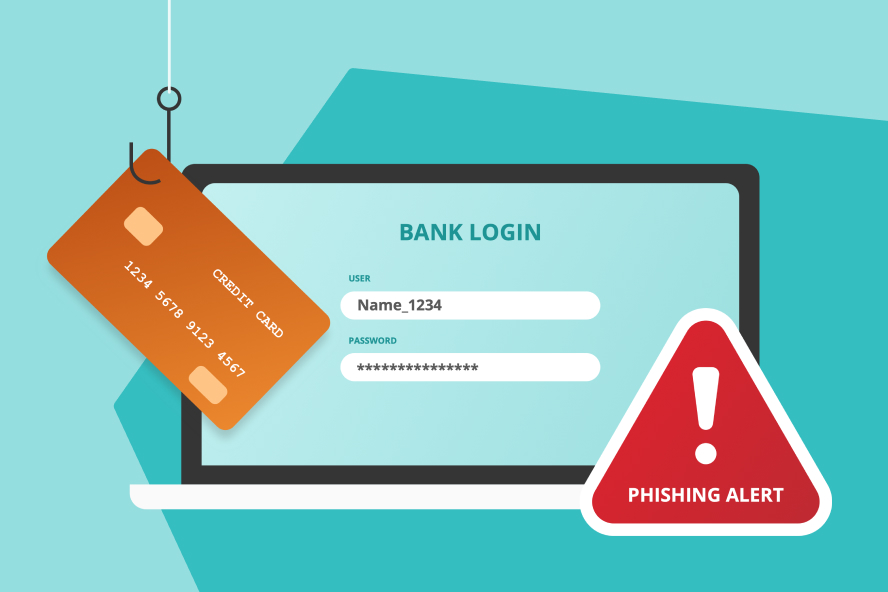


# Introduction:
This dataset captures various attributes related to login details, each row representing a specific login. The goal is to build a machine learning model for classification, where the target variable (`Fraud`) indicates whether a login is fraudulent or not. Understanding the patterns and relationships within these features can help predict the likelihood of fraud, contributing to fraud detection and prevention efforts.

### Column Dictionary:

1. **TransactionKey**: A unique identifier for each transaction.

2. **ConnectionRegion**: The geographical region or location associated with the transaction connection.

3. **V1CF, V2CF, V3CF, V4CF, V5CF**: Numerical variables representing certain features or characteristics associated with the transaction.

4. **TimeZone**: The time zone in which the transaction occurred.

5. **AreaCode**: A code indicating the specific area related to the transaction.

6. **ConnectionOrg**: The organization or entity associated with the connection.

7. **ConnectionType**: The type or nature of the connection, e.g., wireless, wired.

8. **ConnectionSpeed**: The speed or bandwidth of the connection.

9. **V6CF**: Another numerical variable representing a specific feature or characteristic.

10. **channel**: The communication or interaction channel used for the transaction.

11. **TransactionDateTime**: The date and time when the transaction took place.

12. **AddressUpdateDate, EmailUpdateDate**: Dates when the address and email associated with the transaction were last updated.

13. **webSessOS, webSessWebBrowser**: The operating system and web browser used in the web session associated with the transaction.

14. **LastLong, LastLat**: The longitude and latitude of the last known location associated with the transaction.

15. **CurrentLong, CurrentLat**: The current longitude and latitude of the transaction.

16. **IsOldDevice**: Binary indicator of whether the device used in the transaction is considered old.

17. **WebSessionRetail**: Indicates whether the web session is related to a retail transaction.

18. **MainEntityUse**: The primary use or purpose associated with the entity involved in the transaction.

19. **Fraud**: The target variable indicating whether the transaction is fraudulent (binary: 1 for fraud, 0 for non-fraud).

Understanding the characteristics of these columns and their relationships will be crucial for feature engineering and building an effective machine learning model for fraud detection.

# Importing necessary libraries for EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
mb = pd.read_csv('/content/drive/MyDrive/00. Data Science/MyBank.csv')
m = mb.copy()

# Getting to know the data.

In [ ]:
m.head()

TransactionKey            ConnectionRegion  V1CF  V2CF  V3CF  V4CF   V5CF  \
0           16758      south central@texas@us    99    98    10   803  19820   
1            8912       northeast@new york@us    99    94    61   602  16980   
2           92186  mid atlantic@new jersey@us    76    95    66   505  35620   
3           12924   south central@arkansas@us    99    23    50     0  35620   
4          125650  mid atlantic@new jersey@us    99    74    80   602  19100   

   TimeZone  AreaCode               ConnectionOrg  ...  webSessOS  \
0      -5.0     602.0  013 netvision fix ip users  ...   Mac OS X   
1      -4.0     512.0  013 netvision fix ip users  ...  Windows 7   
2      -6.0     407.0  013 netvision fix ip users  ...  Windows 7   
3      -5.0     202.0  013 netvision fix ip users  ...  Windows 7   
4      -8.0     313.0  013 netvision fix ip users  ...  Windows 7   

  webSessWebBrowser  LastLong  LastLat CurrentLong CurrentLat IsOldDevice  \
0            Chrome -108.5530      NaN      9.4400        NaN         0.0   
1              Edge -121.8382  27.9860   -112.0826    33.7985         0.0   
2     Mobile Safari  -74.0734  33.7985    -80.3120    32.8494         1.0   
3     Mobile Safari  -88.1029  27.9860    -84.3883    42.1530         1.0   
4            Chrome  -58.5244  34.9497   -111.3270    34.0476         1.0   

  WebSessionRetail MainEntityUse  Fraud  
0              0.0           NaN      0  
1              0.0         315.0      0  
2              NaN         333.0      0  
3              0.0         327.0      0  
4              0.0         394.0      0  

[5 rows x 27 columns]

In [ ]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionKey       138752 non-null  int64  
 1   ConnectionRegion     138752 non-null  object 
 2   V1CF                 138752 non-null  int64  
 3   V2CF                 138752 non-null  int64  
 4   V3CF                 138752 non-null  int64  
 5   V4CF                 138752 non-null  int64  
 6   V5CF                 138752 non-null  int64  
 7   TimeZone             138752 non-null  float64
 8   AreaCode             138740 non-null  float64
 9   ConnectionOrg        138752 non-null  object 
 10  ConnectionType       138752 non-null  object 
 11  ConnectionSpeed      138752 non-null  object 
 12  V6CF                 138752 non-null  object 
 13  channel              138752 non-null  object 
 14  TransactionDateTime  138752 non-null  object 
 15  AddressUpdateDate

In [ ]:
m.isna().sum()

TransactionKey             0
ConnectionRegion           0
V1CF                       0
V2CF                       0
V3CF                       0
V4CF                       0
V5CF                       0
TimeZone                   0
AreaCode                  12
ConnectionOrg              0
ConnectionType             0
ConnectionSpeed            0
V6CF                       0
channel                    0
TransactionDateTime        0
AddressUpdateDate          0
EmailUpdateDate            0
webSessOS                  0
webSessWebBrowser          0
LastLong               24389
LastLat                24231
CurrentLong                0
CurrentLat             24379
IsOldDevice             4070
WebSessionRetail        4038
MainEntityUse           4080
Fraud                      0
dtype: int64

# Visualizing & Feature Engineering
In addition to visualizing, checking each feature one by one and removing the redunduncies in those columns.

---

### Column[0]: TransactionKey

In [ ]:
m = m.loc[:, m.columns != 'TransactionKey']

Properties:
- No null values.
- Data type: Int64

The first column is unnecessary and won't contribute to the prediction.

---

### Column[1]: ConnectionRegion

In [ ]:
m[['Region', 'State', 'Country']] = m['ConnectionRegion'].str.split('@', expand=True)
m = m.drop('ConnectionRegion', axis=1)

Properties:
- No null values.
- Data type: object

The 2nd column ConnectionRegion has Region, State, Country together. Splitting them apart.


Even though the resulting 3 columns do not have null values, we will look for unknown values if any.

In [ ]:
cols_to_check = ['Region', 'State', 'Country']

for col in cols_to_check:
    unknown_count = (m[col] == 'unknown').sum()
    print(f"'unknown' values in {col}: {unknown_count}")


'unknown' values in Region: 4782
'unknown' values in State: 86
'unknown' values in Country: 0


Since the data is incoherent, we will just keep the Country column and delete the other two; Region and State.

In [ ]:
m = m.drop(['Region', 'State'], axis=1)

In [ ]:
print('No.of Countries:', m['Country'].nunique())

No.of Countries: 145


- Out of 145 Countries we are plotting top 15 Countries in terms of frequency.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'us'),
  Text(1, 0, 've'),
  Text(2, 0, 'gb'),
  Text(3, 0, 'mx'),
  Text(4, 0, 'de'),
  Text(5, 0, 'il'),
  Text(6, 0, 'cn'),
  Text(7, 0, 'ca'),
  Text(8, 0, 'hk'),
  Text(9, 0, 'in'),
  Text(10, 0, 'es'),
  Text(11, 0, 'fr'),
  Text(12, 0, 'tw'),
  Text(13, 0, 'kr'),
  Text(14, 0, 'ar')])

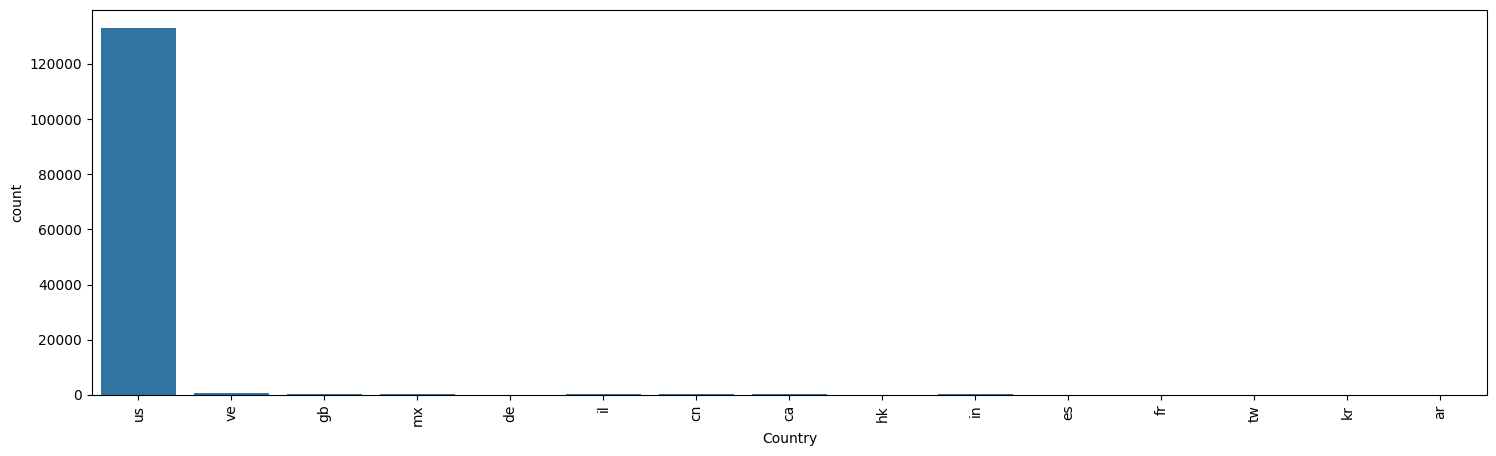

In [ ]:
top_states = m['Country'].value_counts().nlargest(15).index
m_top15 = m[m['Country'].isin(top_states)]

plt.figure(figsize=(18, 5))
sns.countplot(x='Country', data=m_top15)
plt.xticks(rotation=90)

- Top 2 countries frequency-wise are: us, ve.

<Axes: xlabel='Fraud', ylabel='Country'>

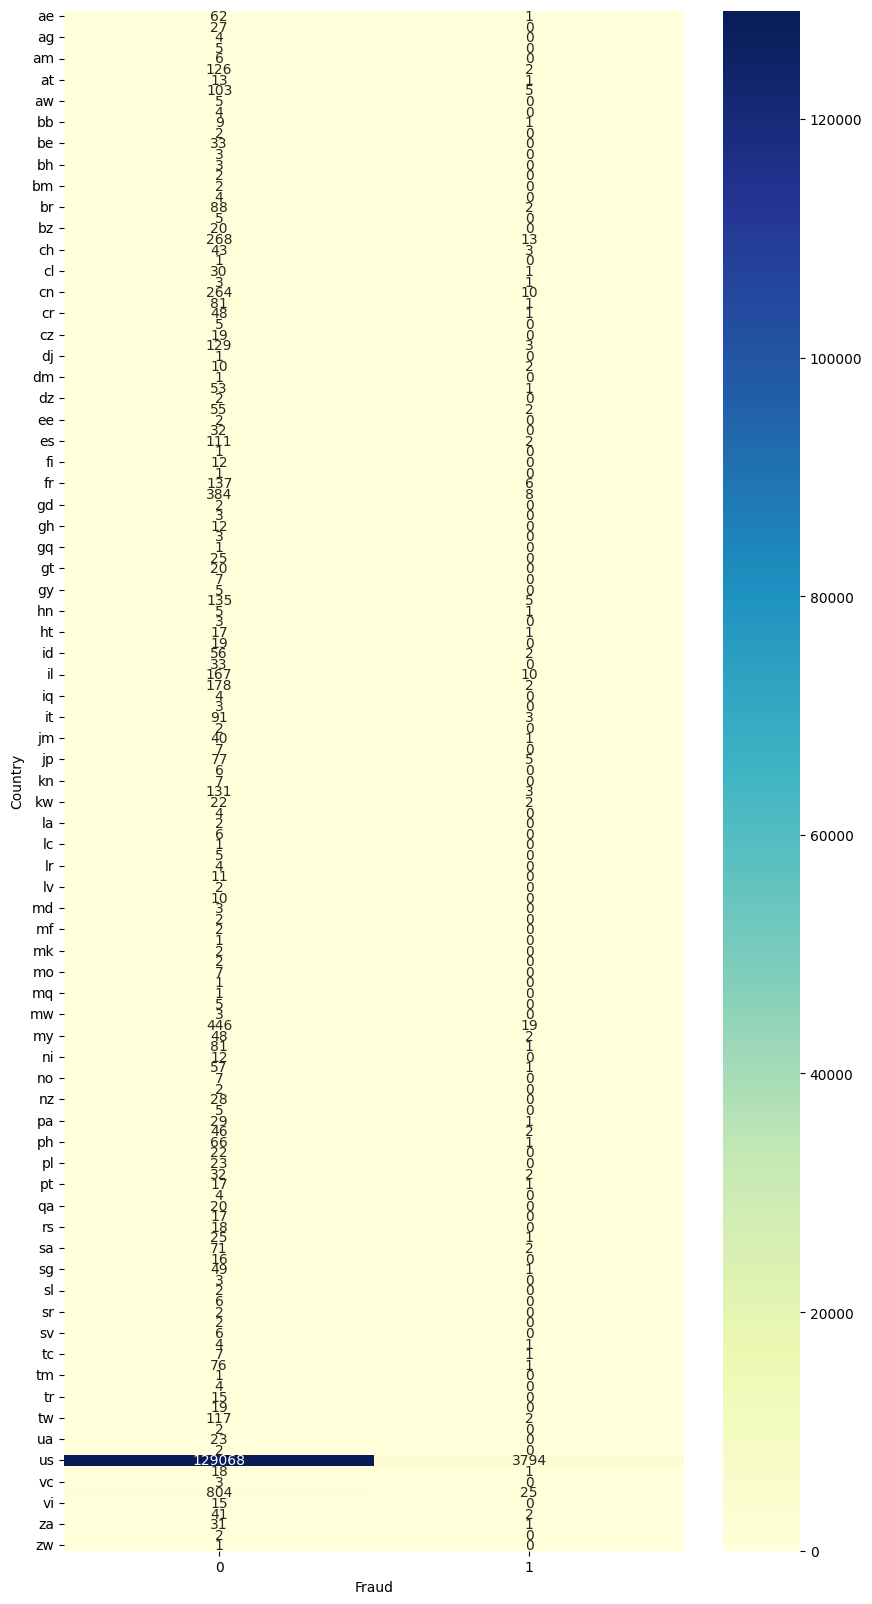

In [ ]:
crosstab_result = pd.crosstab(m['Country'], m['Fraud'])

# Plot the heatmap
plt.figure(figsize=(10, 20))  # Set the figure size
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap="YlGnBu")

- Here we can see the Frauds wrt each Country.
- Highest 0(No Fraud): us(129068)
- Highest 1(Fraud): us(3794)

But this doesn't mean that US has highest Fraud cases. This is because US has the highest frequency, so naturally it'll have highest no. of Frauds.

To mitigate this issue, we will make a Crosstab indicating the ratios of Frauds and No Frauds.

In [ ]:
crosstab_ratio = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
crosstab_ratio

Fraud           0         1
Country                    
ae       0.984127  0.015873
af       1.000000  0.000000
ag       1.000000  0.000000
al       1.000000  0.000000
am       1.000000  0.000000
...           ...       ...
vi       1.000000  0.000000
vn       0.953488  0.046512
za       0.968750  0.031250
zm       1.000000  0.000000
zw       1.000000  0.000000

[145 rows x 2 columns]

- We can infer from the above table that 'at' (Austria) has the highest ratio of Login Frauds.

---

But major chunk of the column consists of US, so it is right to group all other countries into one group and a separate category for the US.

In [ ]:
# Replace all country codes except 'US' with 'Others'
m['Country'] = m['Country'].apply(lambda x: 'us' if x == 'us' else 'Others')

Let's visualize the modified column.

([0, 1], [Text(0, 0, 'us'), Text(1, 0, 'Others')])

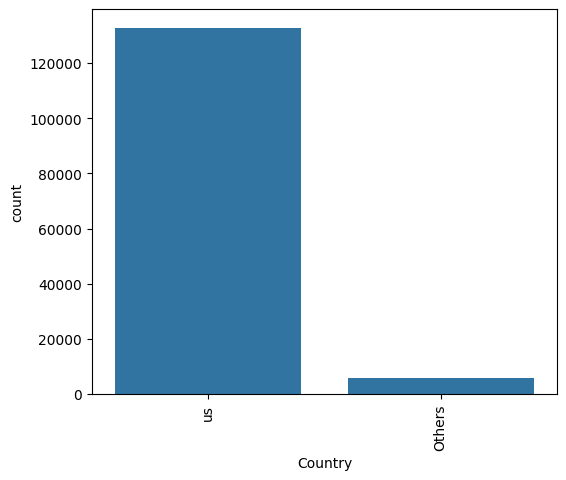

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Country', data=m)
plt.xticks(rotation=90)

<Axes: xlabel='Fraud', ylabel='Country'>

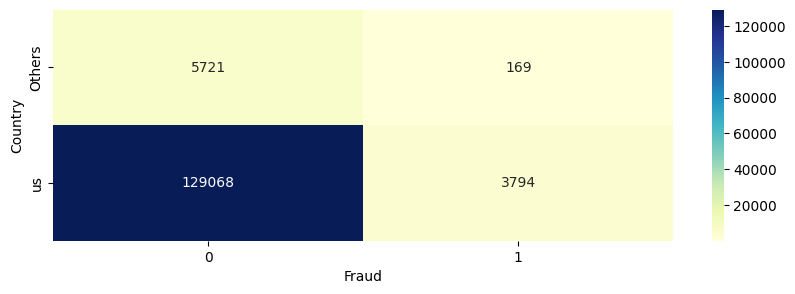

In [ ]:
crosstab_result = pd.crosstab(m['Country'], m['Fraud'])

# Plot the heatmap
plt.figure(figsize=(10, 3))  # Set the figure size
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap="YlGnBu")

In [ ]:
crosstab_ratio = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
crosstab_ratio

Fraud           0         1
Country                    
Others   0.971307  0.028693
us       0.971444  0.028556

We can see here that the ratios of the resulting categories is approximately similar.

### Column[2]: V1CF

<Axes: xlabel='V1CF', ylabel='Count'>

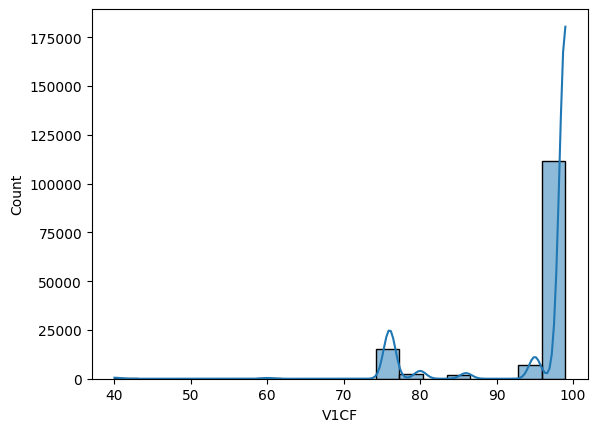

In [ ]:
sns.histplot(m['V1CF'], kde = True)


Properties:
- No null values.
- Data type: int64
- Left Skew

---


### Column[3]: V2CF

<Axes: xlabel='V2CF', ylabel='Count'>

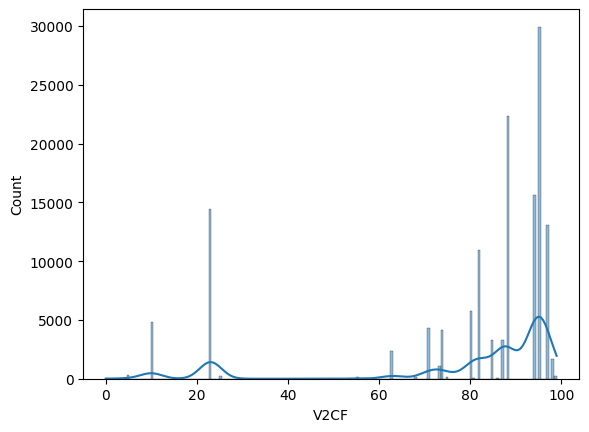

In [ ]:
sns.histplot(m['V2CF'], kde = True)

Properties:
- No null values.
- Data type: int64
- Left Skew
- High Variance

---


### Column[4]: V3CF

<Axes: xlabel='V3CF', ylabel='Count'>

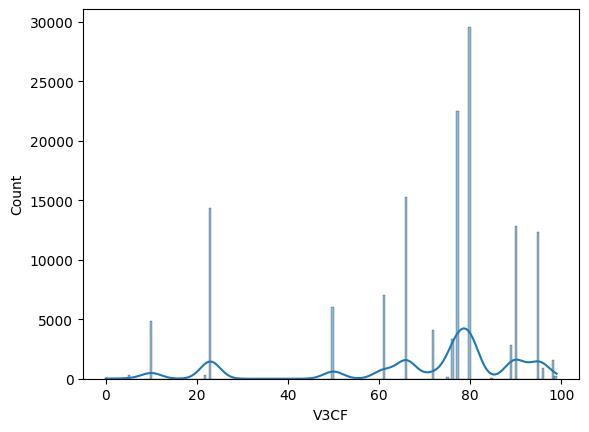

In [ ]:
sns.histplot(m['V3CF'], kde = True)

Properties:
- No null values.
- Data type: int64
- Left Skew
- High Variance

---


### Column[5]: V4CF

<Axes: xlabel='V4CF', ylabel='Count'>

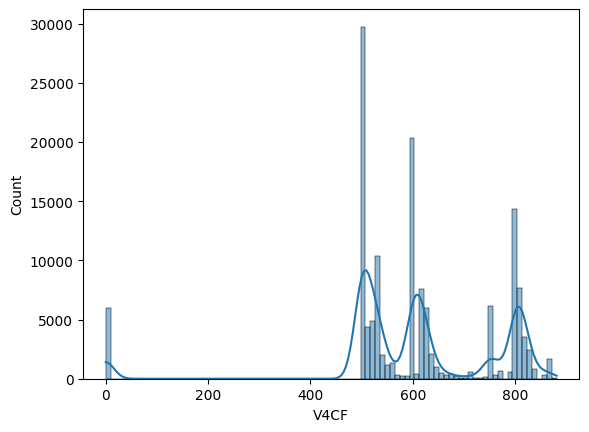

In [ ]:
sns.histplot(m['V4CF'], kde = True)

Properties:
- No null values.
- Data type: int64
- Left Skew
- Presence of Outliers.

---


### Column[6]: V5CF

<Axes: xlabel='V5CF', ylabel='Count'>

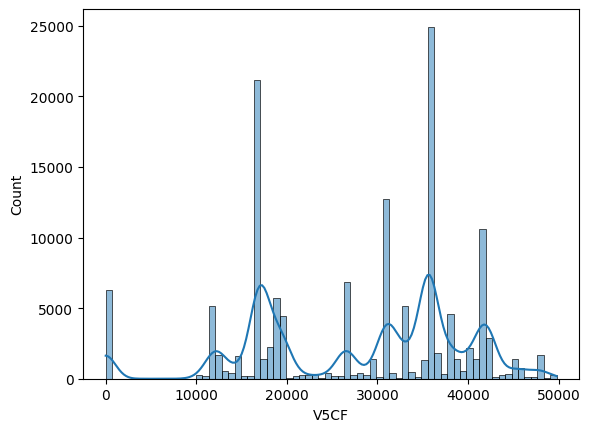

In [ ]:
sns.histplot(m['V5CF'], kde = True)

Properties:
- No null values.
- Data type: int64
- Left Skew

---


### Column[7]: TimeZone

<Axes: xlabel='TimeZone', ylabel='Count'>

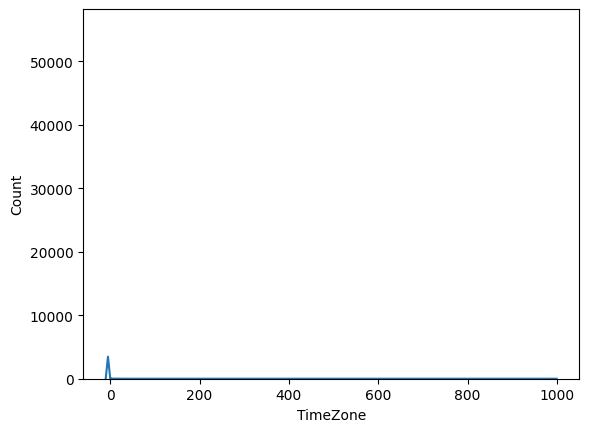

In [ ]:
sns.histplot(m['TimeZone'], kde = True)

In [ ]:
m['TimeZone'] = m['TimeZone'].apply(lambda x: np.nan if x == 999.0 else x)

In [ ]:
m['TimeZone'].describe()

count    138748.000000
mean         -5.839381
std           2.036436
min         -10.000000
25%          -7.000000
50%          -6.000000
75%          -5.000000
max          13.000000
Name: TimeZone, dtype: float64

Properties:
- No null values.
- Data type: float64
- Presence of Outliers: 999

999 cannot be a timezone because the maximum difference is at least 26 hours, as there are time zones for GMT-12 all the way to GMT+14. Hence 999 cannot be an offset.

To deal with data redundancy, we are replacing 999 with np.nan. Next we will fill in the missing value with KNN Imputer.

---


In [ ]:
def categorize_time_zone(time_zone):
    if time_zone >= -12 and time_zone <= -5:
        return 'Americas'
    elif time_zone >= -4 and time_zone <= 4:
        return 'Europe/Africa'
    elif time_zone >= 5 and time_zone <= 12:
        return 'Asia/Oceania'
    else:
        return 'Unknown'

# Apply the function to the 'TimeZone' column
m['TimeZone_Region'] = m['TimeZone'].apply(categorize_time_zone)

In [ ]:
# Replace 'unknown' values with the mode
m['TimeZone_Region'] = m['TimeZone_Region'].replace('unknown', m['TimeZone_Region'].mode()[0])

In [ ]:
from scipy.stats import chi2_contingency

# Assuming 'Var1' and 'Var2' are the column names for the categorical variables in your DataFrame
# Replace them with your actual column names
observed_table = pd.crosstab(m['TimeZone_Region'], m['Fraud'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(observed_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(pd.DataFrame(expected, index=observed_table.index, columns=observed_table.columns))

Chi-square statistic: 1.0247108284373043
P-value: 0.7952729603818294
Degrees of freedom: 3
Expected frequencies table:
Fraud                        0            1
TimeZone_Region                            
Americas         130232.954610  3829.045390
Asia/Oceania       1375.556561    40.443439
Europe/Africa      3161.060064    92.939936
Unknown              19.428765     0.571235


- **Chi-square statistic:** 1.02
- **P-value:** 0.795
- **Degrees of freedom:** 3

**Interpretation:**

1. **Chi-square statistic:** The calculated chi-square statistic is 1.02. This value represents the measure of the discrepancy between the observed frequencies and the frequencies expected under the null hypothesis.

2. **P-value:** The p-value associated with the chi-square statistic is 0.795. This value indicates the probability of observing a chi-square statistic as extreme as the one calculated, assuming no association between timezone regions and fraud.

3. **Degrees of freedom:** With 3 degrees of freedom, this test considers the constraints imposed on the data by the number of categories in the 'TimeZone_Region' column and the 'Fraud' column.

**Interpretation:**

- **Null Hypothesis (H0):** There is no significant association between timezone regions and fraud.
- **Alternative Hypothesis (H1):** There is a significant association between timezone regions and fraud.

**Conclusion:**
Since the p-value (0.795) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. Therefore, there is insufficient evidence to conclude a significant association between timezone regions and fraud based on the chi-square test.

In [ ]:
m = m.loc[:, m.columns != 'TimeZone']

### Column[8]: AreaCode

In [ ]:
m['AreaCode'].value_counts()

212.0    14842
312.0    10952
0.0       5584
323.0     5180
713.0     4704
         ...  
229.0        2
709.0        2
819.0        1
308.0        1
682.0        1
Name: AreaCode, Length: 243, dtype: int64

Properties:
- Presence of null values: 12
- Data type: float64

'0' is not an area code, so we will replace '0' with np.nan and fill in the missing values if we plan on keeping the column. <br> Since we have just kept the Country and deleted the Region and State, we will delete this column too.

---


In [ ]:
m = m.loc[:, m.columns != 'AreaCode']

### Column[9]: ConnectionOrg

In [ ]:
def get_first_word(text):
    words = text.split()[:1]
    return ' '.join(words)

# Create a new column with the grouped or renamed values
m['GroupedConnectionOrg'] = m['ConnectionOrg'].apply(get_first_word)

# Display the result
print(m['GroupedConnectionOrg'])

0           013
1           013
2           013
3           013
4           013
          ...  
138747    zynga
138748    zynga
138749    zynga
138750    zynga
138751    zynga
Name: GroupedConnectionOrg, Length: 138752, dtype: object


In [ ]:
m['ConnectionOrg'].value_counts()

time warner cable internet llc                              15676
at&t internet services                                      12227
comcast ip services  l.l.c.                                  7499
comcast cable communications  inc.                           6691
mci communications services  inc. d/b/a verizon business     6404
                                                            ...  
multinet broadband                                              1
munchkin inc                                                    1
murphy oil usa  inc.                                            1
mustang special utility district                                1
lewis university                                                1
Name: ConnectionOrg, Length: 7620, dtype: int64

In [ ]:
m['GroupedConnectionOrg'].value_counts()

comcast                     25070
at&t                        16168
time                        15694
mci                          6404
t-mobile                     6233
                            ...  
intelsat                        1
rback34a.irvnca.20060310        1
rback26a.irvnca                 1
rback23a.irvnca                 1
dana                            1
Name: GroupedConnectionOrg, Length: 5026, dtype: int64

- After selecting the 1st word the categories reduced from :<br>
7620   ---->  5026

Let's visulize it

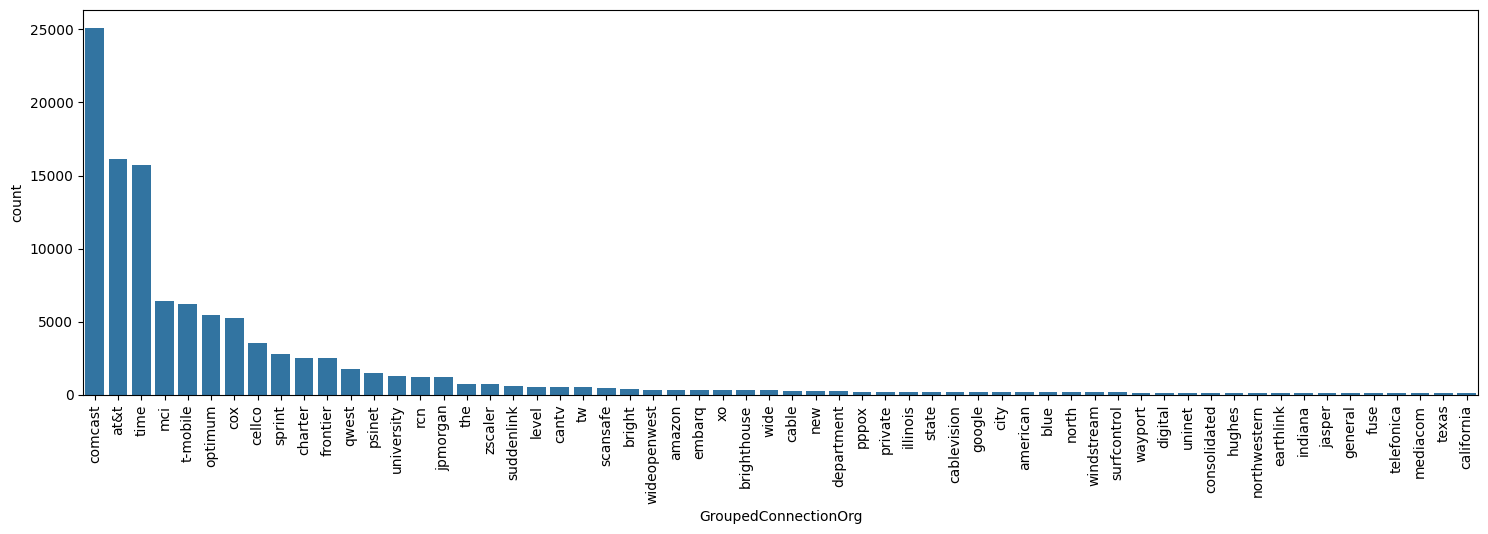

In [ ]:
top_states = m['GroupedConnectionOrg'].value_counts().nlargest(60).index
m_top60 = m[m['GroupedConnectionOrg'].isin(top_states)]

plt.figure(figsize=(18, 5))
sns.countplot(x='GroupedConnectionOrg', data=m_top60, order=top_states)
plt.xticks(rotation=90)
plt.show()

- Even after plotting top 60, dominant ones are only 8-10 categories.

In [ ]:
category_counts = m['GroupedConnectionOrg'].value_counts()

# Filter categories with frequency equal to 1
single_frequency_categories = category_counts[category_counts == 1]

# Count the number of categories with frequency equal to 1
num_single_frequency_categories = len(single_frequency_categories)

print("Number of categories with frequency = 1:", num_single_frequency_categories)


Number of categories with frequency = 1: 1602


In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce

# Initialize the CountEncoder transformer
count_enc = ce.CountEncoder(cols=['GroupedConnectionOrg'])

# Fit the transformer to your data and transform the 'GroupedConnectionOrg' column
m['GroupedConnectionOrg_Encoded'] = count_enc.fit_transform(m['GroupedConnectionOrg'])


In [ ]:
m['GroupedConnectionOrg_Encoded'].nunique()

154

In [ ]:
m['GroupedConnectionOrg_Encoded'].value_counts()

25070    25070
16168    16168
15694    15694
6404      6404
6233      6233
         ...  
59          59
58          58
57          57
53          53
51          51
Name: GroupedConnectionOrg_Encoded, Length: 154, dtype: int64

In [ ]:
print(m['GroupedConnectionOrg_Encoded'])

0         66
1         66
2         66
3         66
4         66
          ..
138747     5
138748     5
138749     5
138750     5
138751     5
Name: GroupedConnectionOrg_Encoded, Length: 138752, dtype: int64


<Axes: xlabel='Fraud', ylabel='GroupedConnectionOrg_Encoded'>

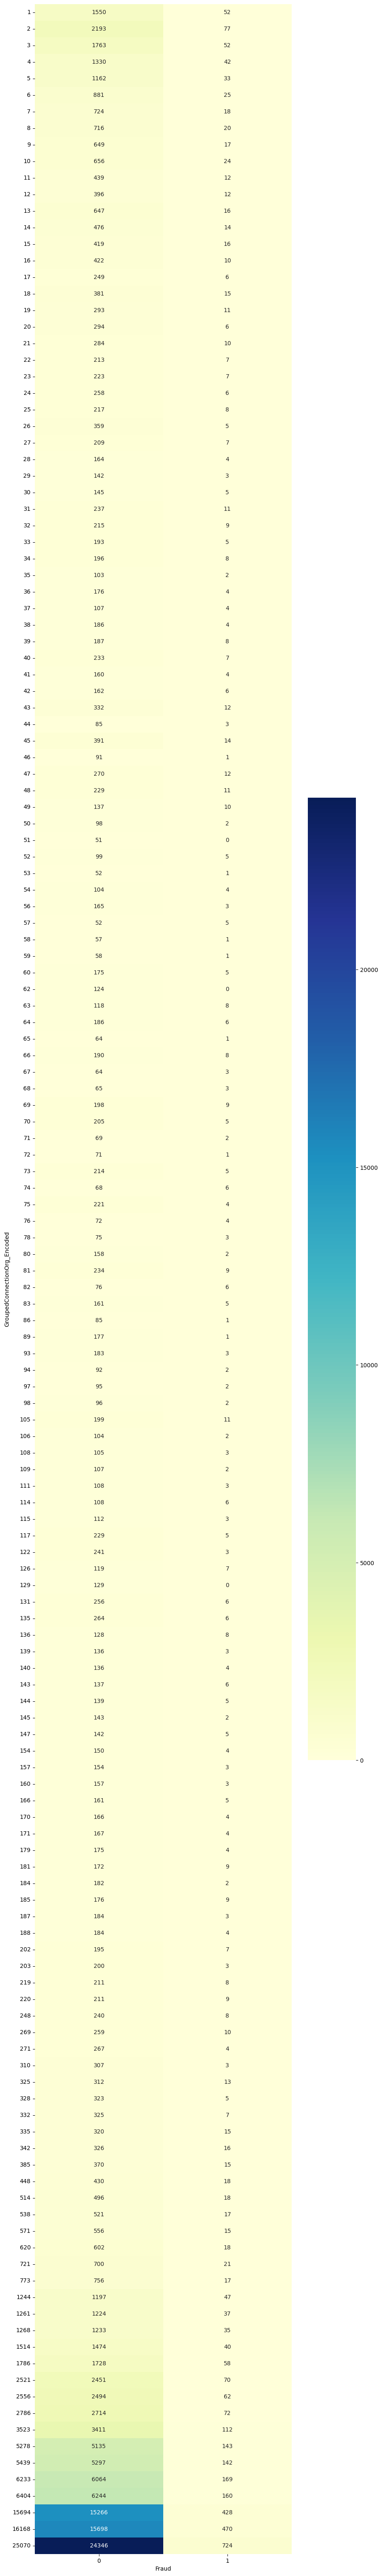

In [ ]:
crosstab_result = pd.crosstab(m['GroupedConnectionOrg_Encoded'], m['Fraud'])

# Plot the heatmap
plt.figure(figsize=(10, 80))  # Set the figure size
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap="YlGnBu")

In [ ]:
crosstab_ratio = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
crosstab_ratio

Fraud                                0         1
GroupedConnectionOrg_Encoded                    
1                             0.967541  0.032459
2                             0.966079  0.033921
3                             0.971350  0.028650
4                             0.969388  0.030612
5                             0.972385  0.027615
...                                ...       ...
6233                          0.972886  0.027114
6404                          0.975016  0.024984
15694                         0.972728  0.027272
16168                         0.970930  0.029070
25070                         0.971121  0.028879

[154 rows x 2 columns]

Dropping unnecessary columns.

In [ ]:
m = m.drop(['ConnectionOrg', 'GroupedConnectionOrg'], axis=1)

Properties:
- No null values.
- Data type: object

Re-categorized the data to minimize the categories.

---


### Column[10]: ConnectionType

<Axes: xlabel='count', ylabel='ConnectionType'>

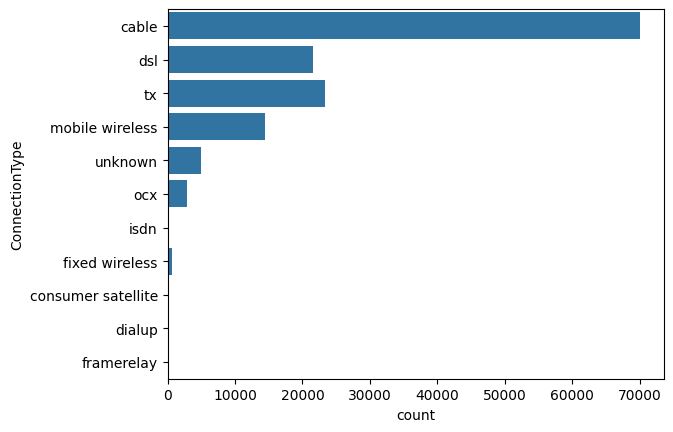

In [ ]:
sns.countplot(m['ConnectionType'])

In [ ]:
m['ConnectionType'].value_counts()

cable                 70047
tx                    23384
dsl                   21637
mobile wireless       14509
unknown                4947
ocx                    2885
fixed wireless          736
consumer satellite      287
dialup                  250
framerelay               44
isdn                     26
Name: ConnectionType, dtype: int64

Filling null values with mode.

In [ ]:
m['ConnectionType'] = m['ConnectionType'].replace(['unknown'], m['ConnectionType'].mode())

In [ ]:
# Define mapping of categories
category_mapping = {'cable': 'broadband',
                    'tx': 'broadband',
                    'dsl': 'broadband',
                    'mobile wireless': 'wireless',
                    'unknown': 'other',
                    'ocx': 'other',
                    'fixed wireless': 'wireless',
                    'consumer satellite': 'satellite',
                    'dialup': 'dialup',
                    'framerelay': 'other',
                    'isdn': 'other'}

# Create a new column with the grouped categories
m['GroupedConnectionType'] = m['ConnectionType'].map(category_mapping)

Further mapped the different objects into Broadband, Wireless, Satellite, Dialup and Others.

<Axes: xlabel='Fraud', ylabel='GroupedConnectionType'>

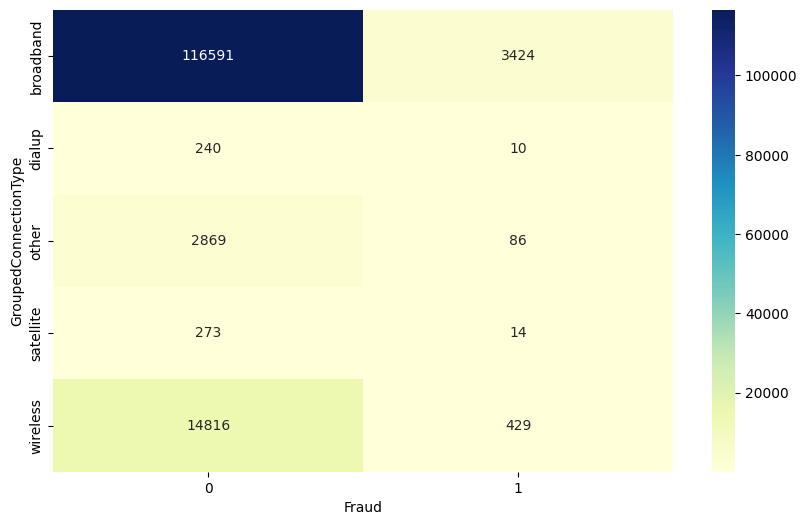

In [ ]:
crosstab_result = pd.crosstab(m['GroupedConnectionType'], m['Fraud'])

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap="YlGnBu")

In [ ]:
crosstab_ratio = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
crosstab_ratio

Fraud                         0         1
GroupedConnectionType                    
broadband              0.971470  0.028530
dialup                 0.960000  0.040000
other                  0.970897  0.029103
satellite              0.951220  0.048780
wireless               0.971860  0.028140

Properties:
- No null values. But presence of unknown values.
- Data type: object

Even if 'consumer satellite', 'dialup', 'framerelay' have negligible records, still the ratios speak otherwise. So, we will not drop them.

---


In [ ]:
m = m.loc[:, m.columns != 'ConnectionType']

###Column[11]: ConnectionSpeed

<Axes: xlabel='count', ylabel='ConnectionSpeed'>

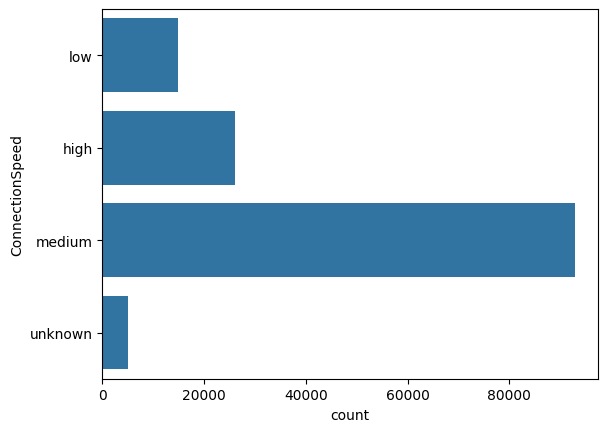

In [ ]:
sns.countplot(m['ConnectionSpeed'])

Replacing unknown values with mode.

In [ ]:
m['ConnectionSpeed'] = m['ConnectionSpeed'].replace(['unknown'], m['ConnectionSpeed'].mode())

<Axes: xlabel='Fraud', ylabel='ConnectionSpeed'>

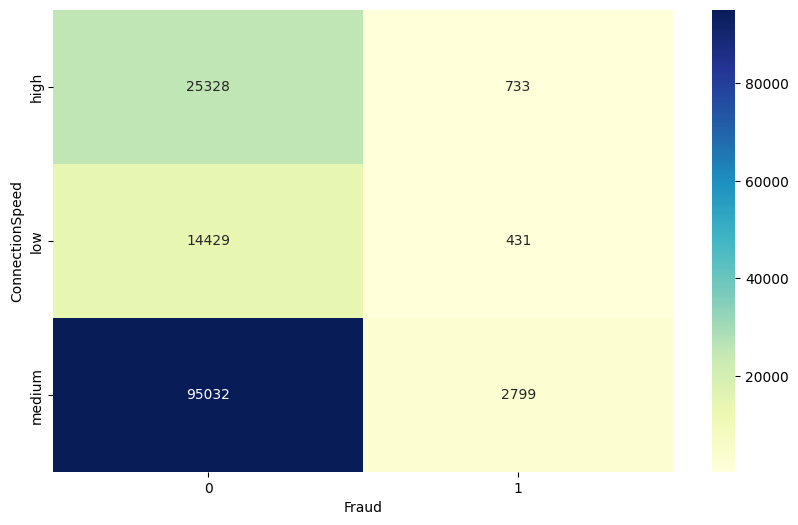

In [ ]:
crosstab_result = pd.crosstab(m['ConnectionSpeed'], m['Fraud'])

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap="YlGnBu")

In [ ]:
crosstab_ratio = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
crosstab_ratio

Fraud                   0         1
ConnectionSpeed                    
high             0.971874  0.028126
low              0.970996  0.029004
medium           0.971389  0.028611

Properties:
- No null values. But presence of unknown values.
- Data type: object

Replacing the unknown values with mode.

---


###Column[12]: V6CF

<Axes: xlabel='count', ylabel='V6CF'>

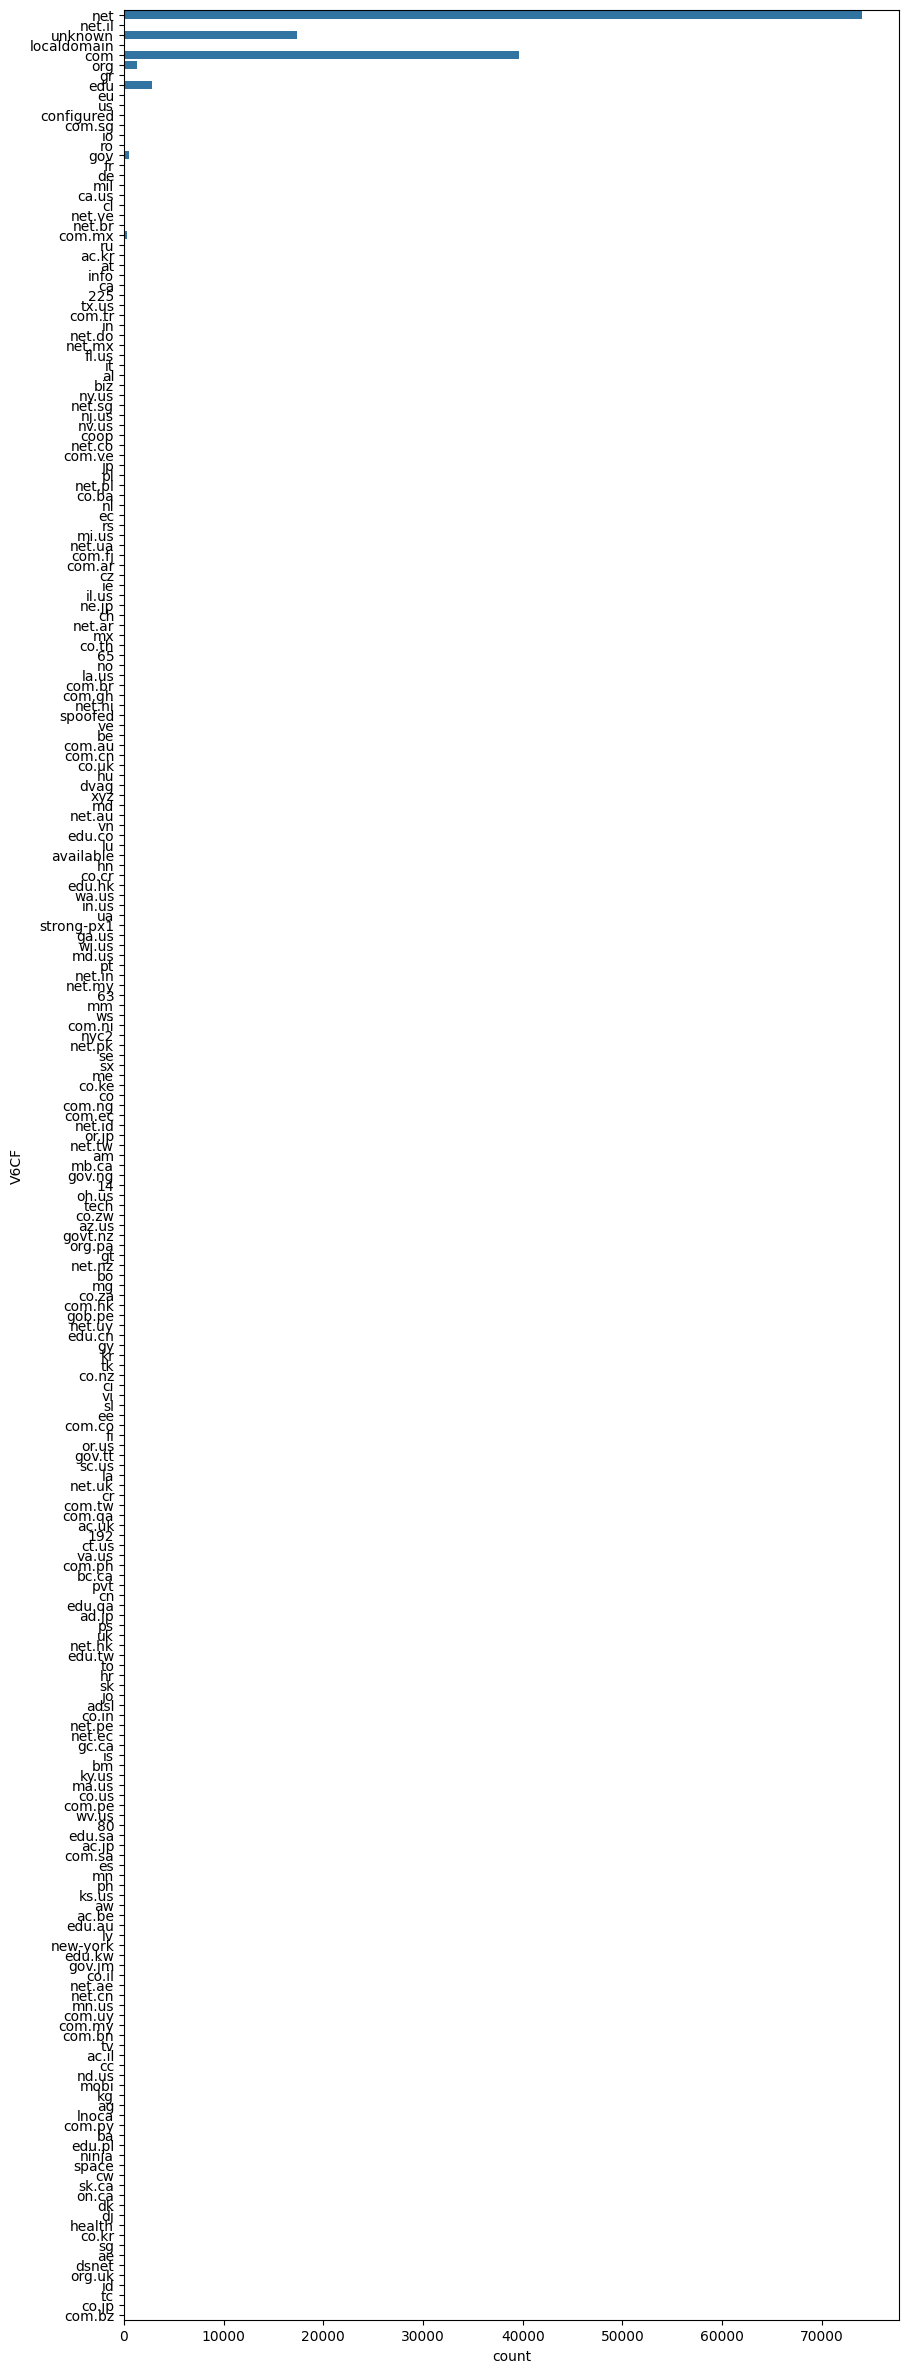

In [ ]:
plt.figure(figsize=(10, 30))
sns.countplot(m['V6CF'])

<Axes: xlabel='Fraud', ylabel='V6CF'>

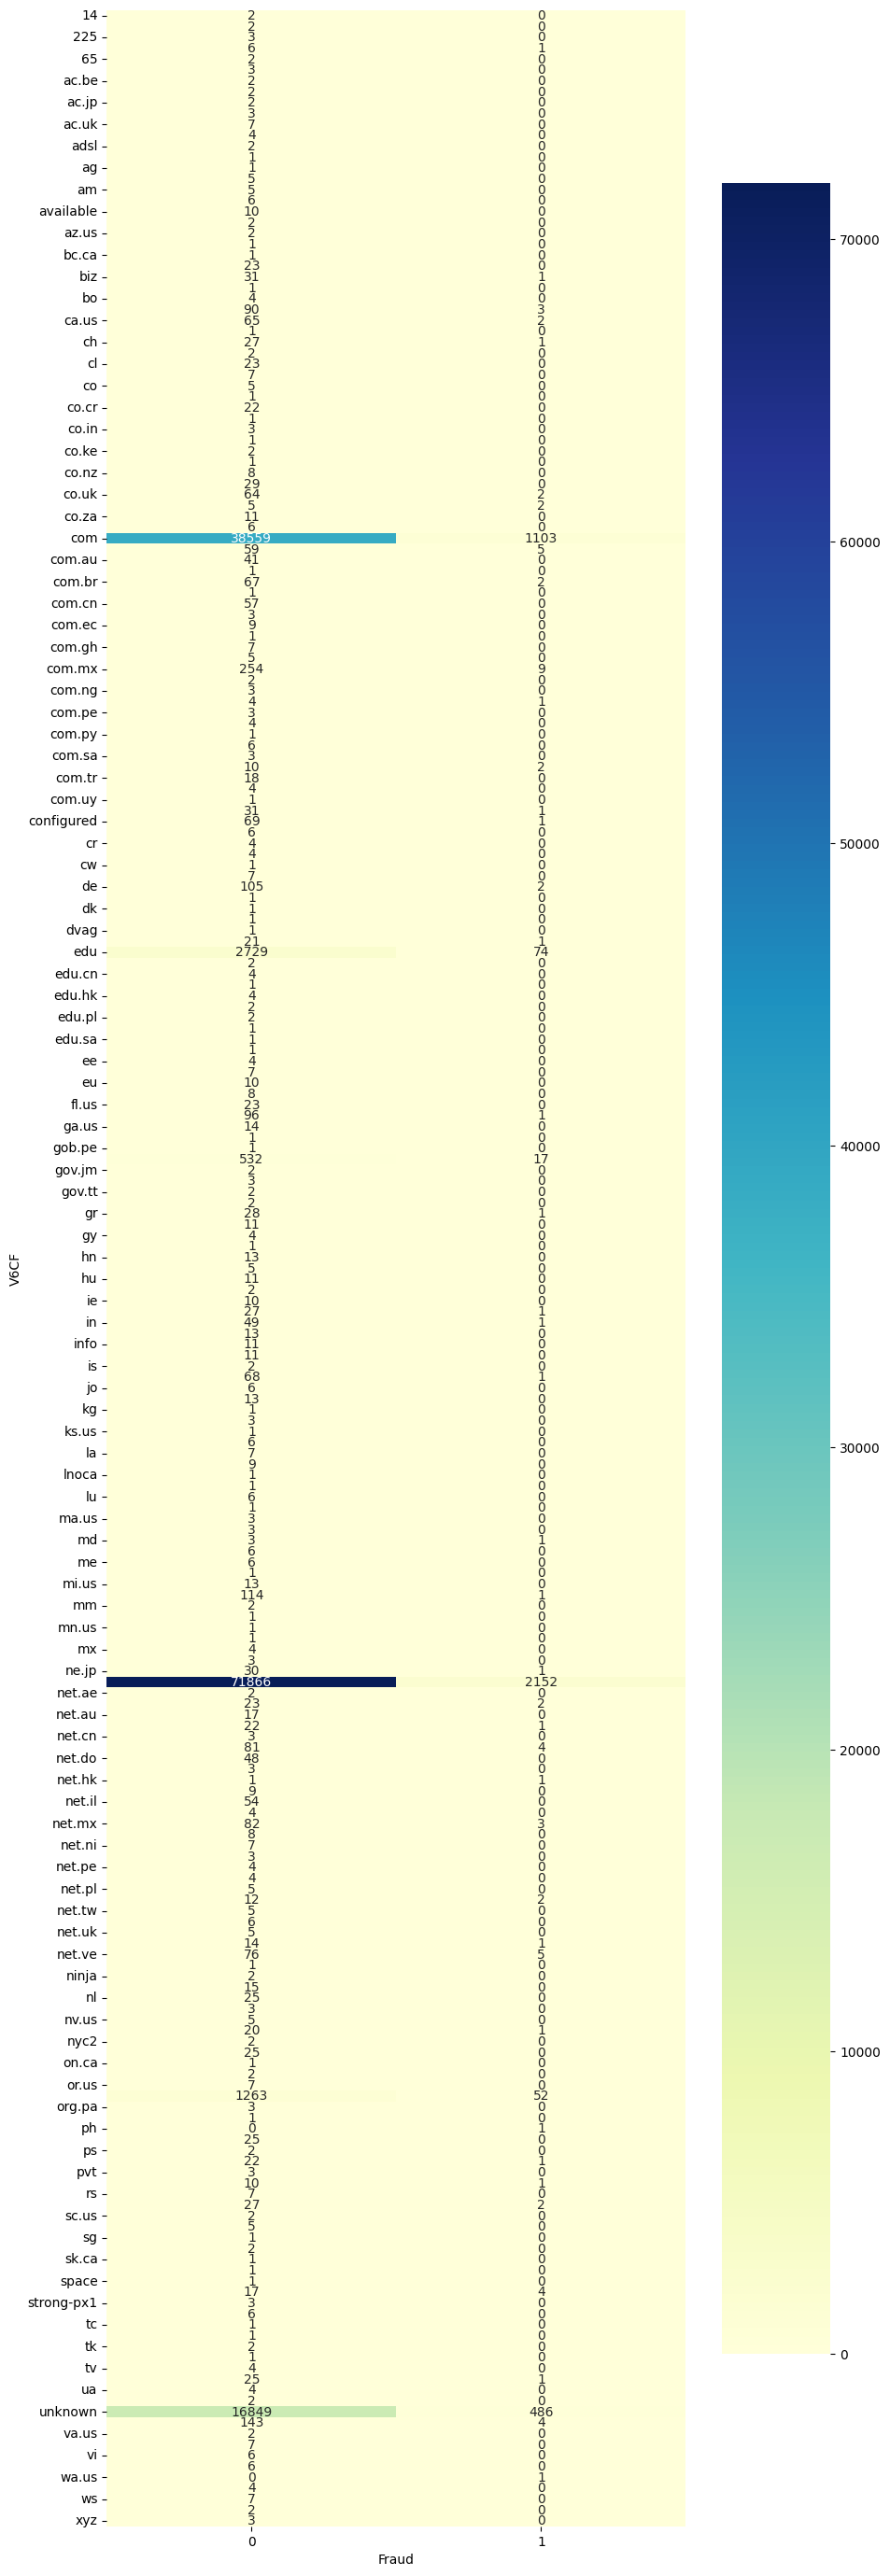

In [ ]:
crosstab_result = pd.crosstab(m['V6CF'], m['Fraud'])

# Plot the heatmap
plt.figure(figsize=(10, 35))  # Set the figure size
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap="YlGnBu")

In [ ]:
crosstab_ratio = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
crosstab_ratio

Fraud         0         1
V6CF                     
14     1.000000  0.000000
192    1.000000  0.000000
225    1.000000  0.000000
63     0.857143  0.142857
65     1.000000  0.000000
...         ...       ...
wa.us  0.000000  1.000000
wi.us  1.000000  0.000000
ws     1.000000  0.000000
wv.us  1.000000  0.000000
xyz    1.000000  0.000000

[231 rows x 2 columns]

In [ ]:
top_categories = m['V6CF'].value_counts().nlargest(5).index
# Map all other categories to 'other'
m['V6CF'] = m['V6CF'].apply(lambda x: x if x in top_categories else 'other')
# Display the modified DataFrame
print(m['V6CF'])

0             net
1           other
2             net
3             net
4             net
           ...   
138747      other
138748        net
138749        net
138750        com
138751    unknown
Name: V6CF, Length: 138752, dtype: object


<Axes: xlabel='Fraud', ylabel='V6CF'>

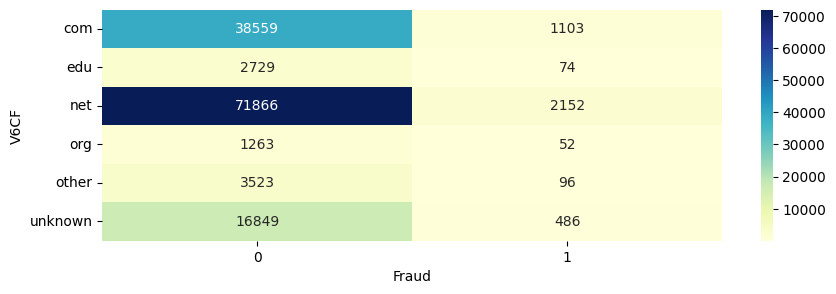

In [ ]:
crosstab_result = pd.crosstab(m['V6CF'], m['Fraud'])

# Plot the heatmap
plt.figure(figsize=(10, 3))  # Set the figure size
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap="YlGnBu")

In [ ]:
crosstab_ratio = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
crosstab_ratio

Fraud           0         1
V6CF                       
com      0.972190  0.027810
edu      0.973600  0.026400
net      0.970926  0.029074
org      0.960456  0.039544
other    0.973473  0.026527
unknown  0.971964  0.028036

Properties:
- No null values.
- Data type: object

Presence of unknown values.<br>
org has the highest ratio.

---


###Column[13]: channel

<Axes: xlabel='count', ylabel='channel'>

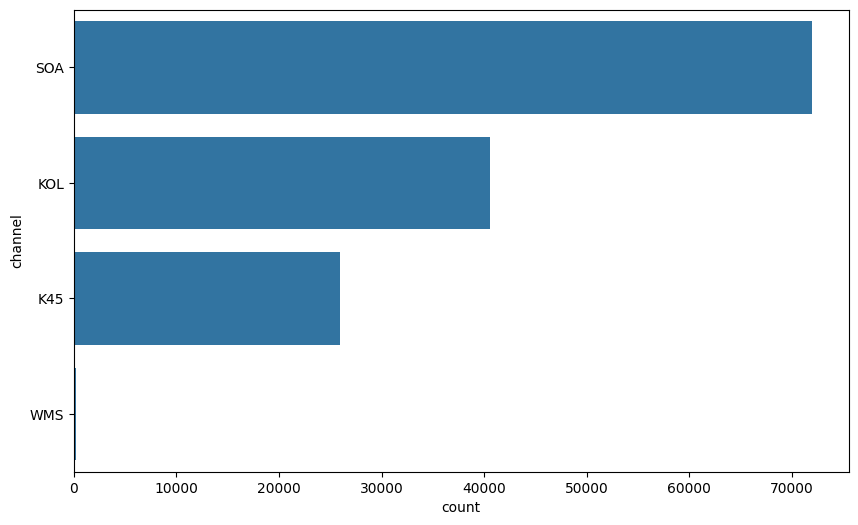

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(m['channel'])

<Axes: xlabel='Fraud', ylabel='channel'>

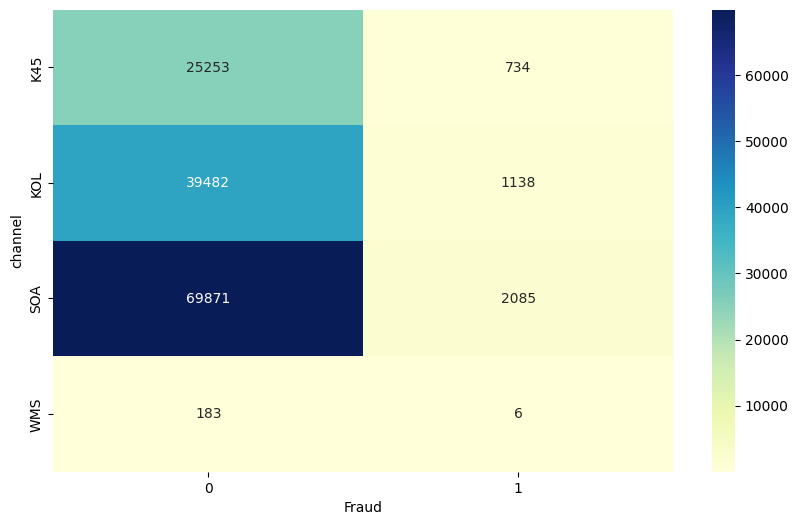

In [ ]:
crosstab_result = pd.crosstab(m['channel'], m['Fraud'])

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap="YlGnBu")

In [ ]:
crosstab_ratio = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
crosstab_ratio

Fraud           0         1
channel                    
K45      0.971755  0.028245
KOL      0.971984  0.028016
SOA      0.971024  0.028976
WMS      0.968254  0.031746

Properties:
- No null values.
- Data type: object

All the categories have pretty much the same ratio: 97:3

---


###Column[14]: TransactionDateTime

In [ ]:
# Assuming df is your DataFrame and TransactionDateTime is the column
m['TransactionDateTime'] = pd.to_datetime(m['TransactionDateTime'], format='%d/%m/%Y %H:%M:%S:%f')

# Extracting Date and Time into separate columns
m['TransactionDate'] = m['TransactionDateTime'].dt.date
m['TransactionTime'] = m['TransactionDateTime'].dt.time

Properties:
- No null values.
- Data type: object

Separating Date and Time.

---


###Column[15]: AddressUpdateDate

In [ ]:
# Assuming df is your DataFrame and TransactionDateTime is the column
m['AddressUpdateDate'] = pd.to_datetime(m['AddressUpdateDate'], format='%d/%m/%Y %H:%M:%S:%f')

# Extracting Date and Time into separate columns
m['AddressUpdateDate1'] = m['AddressUpdateDate'].dt.date
m['AddressUpdateTime'] = m['AddressUpdateDate'].dt.time

Properties:
- No null values.
- Data type: object

Separating Date and Time.

---


###Column[16]: EmailUpdateDate

In [ ]:
m['EmailUpdateDate'] = m['EmailUpdateDate'].apply(lambda x: np.nan if x == '0' else x)

In [ ]:
m['EmailUpdateDate'] = pd.to_datetime(m['EmailUpdateDate'], format='%d/%m/%Y %H:%M:%S:%f')

# Extracting Date and Time into separate columns
m['EmailUpdateDate1'] = m['EmailUpdateDate'].dt.date
m['EmailUpdateTime'] = m['EmailUpdateDate'].dt.time

Properties:
- No null values.
- Data type: object

Separating Date and Time.

---


- Now finding the distance between the days TransactionDate -AddressUpdateDate; and TransactionDate - EmailUpdateDate

In [ ]:
from re import M
m['AddressUpdateDate1'] = pd.to_datetime(m['AddressUpdateDate1'])
m['EmailUpdateDate1'] = pd.to_datetime(m['EmailUpdateDate1'])
m['TransactionDate'] = pd.to_datetime(m['TransactionDate'])

m['TADateDiff'] = m['TransactionDate'] - m['AddressUpdateDate1']
m['TEDateDiff'] = m['TransactionDate'] - m['EmailUpdateDate1']

m['TADateDiff'] = m['TADateDiff'].dt.days.astype(str)
m['TADateDiff'] = m['TADateDiff'].str.replace('days', '').str.strip()

m['TEDateDiff'] = m['TEDateDiff'].dt.days.astype(str)
m['TEDateDiff'] = m['TEDateDiff'].str.replace('days', '').str.strip()

m['TADateDiff'] = m['TADateDiff'].astype(int)
m['TEDateDiff'] = m['TEDateDiff'].astype(float)


<Axes: xlabel='TADateDiff', ylabel='Count'>

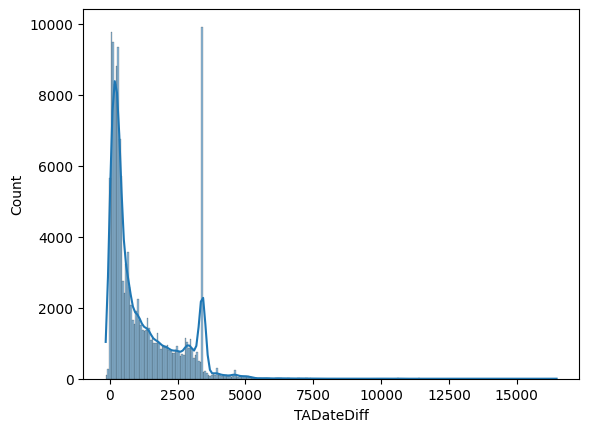

In [ ]:
sns.histplot(m['TADateDiff'], kde= True)

<Axes: xlabel='TEDateDiff', ylabel='Count'>

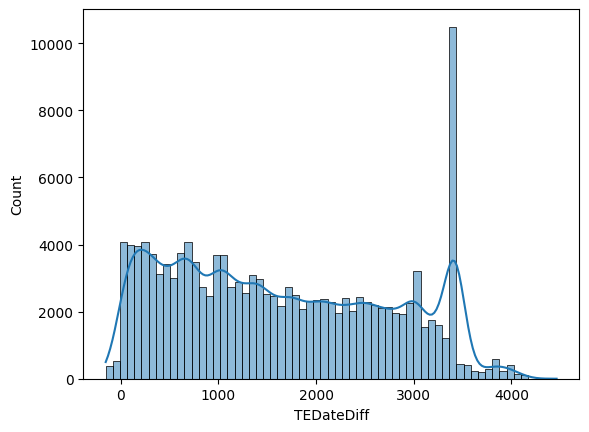

In [ ]:
sns.histplot(m['TEDateDiff'], kde=True)

In [ ]:
m['TADateDiff'].describe()

count    138752.000000
mean       1130.556850
std        1226.999183
min        -153.000000
25%         218.000000
50%         575.000000
75%        1792.000000
max       16468.000000
Name: TADateDiff, dtype: float64

In [ ]:
m['TEDateDiff'].describe()

count    138726.000000
mean       1637.933927
std        1105.320023
min        -152.000000
25%         663.000000
50%        1483.000000
75%        2582.000000
max        4462.000000
Name: TEDateDiff, dtype: float64

In [ ]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   V1CF                          138752 non-null  int64         
 1   V2CF                          138752 non-null  int64         
 2   V3CF                          138752 non-null  int64         
 3   V4CF                          138752 non-null  int64         
 4   V5CF                          138752 non-null  int64         
 5   ConnectionSpeed               138752 non-null  object        
 6   V6CF                          138752 non-null  object        
 7   channel                       138752 non-null  object        
 8   TransactionDateTime           138752 non-null  datetime64[ns]
 9   AddressUpdateDate             138752 non-null  datetime64[ns]
 10  EmailUpdateDate               138726 non-null  datetime64[ns]
 11  webSessOS    

In [ ]:
# Convert columns to string
m['TransactionTime'] = m['TransactionTime'].astype(str)
m['AddressUpdateTime'] = m['AddressUpdateTime'].astype(str)
m['EmailUpdateTime'] = m['EmailUpdateTime'].astype(str)

# Extract first two digits from the time columns
m['TransactionHour'] = m['TransactionTime'].str[:2]
m['AddressUpdateHour'] = m['AddressUpdateTime'].str[:2]
m['EmailUpdateHour'] = m['EmailUpdateTime'].str[:2]


In [ ]:

m['TransactionHour'] = pd.to_numeric(m['TransactionHour'], errors='coerce')
m['AddressUpdateHour'] = pd.to_numeric(m['AddressUpdateHour'], errors='coerce')
m['EmailUpdateHour'] = pd.to_numeric(m['EmailUpdateHour'], errors='coerce')


In [ ]:
m['TransactionHour'].value_counts()

11    10157
12    10109
13     9577
10     9285
14     8850
15     8616
16     7949
17     7725
9      7648
18     7085
19     6770
21     6549
20     6464
22     5932
8      5183
23     4914
0      3730
7      2959
1      2576
2      1788
6      1593
5      1188
3      1185
4       920
Name: TransactionHour, dtype: int64

In [ ]:
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Categorize time periods
m['TransactionHour'] = pd.cut(m['TransactionHour'], bins=bins, labels=labels, include_lowest=True)
m['AddressUpdateHour'] = pd.cut(m['AddressUpdateHour'], bins=bins, labels=labels, include_lowest=True)
m['EmailUpdateHour'] = pd.cut(m['EmailUpdateHour'], bins=bins, labels=labels, include_lowest=True)

- Segregating time into quadrants such as Morning, Afternoon, Evening, Night.

In [ ]:
m = m.drop(['TransactionDateTime', 'AddressUpdateDate', 'EmailUpdateDate', 'TransactionDate', 'TransactionTime', 'AddressUpdateDate1','AddressUpdateTime','EmailUpdateDate1', 'EmailUpdateTime'], axis=1)

---

###Column[17]: webSessOS

Properties:
- No null values
- Data type: object

---


<Axes: xlabel='count', ylabel='webSessOS'>

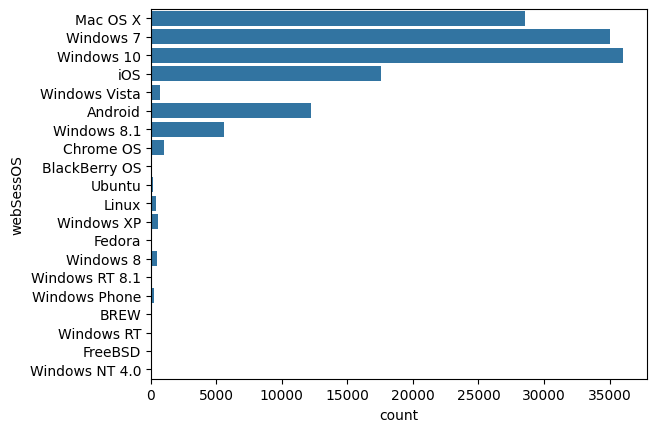

In [ ]:
sns.countplot(m['webSessOS'])

Mapping Operating Systems into Windows, Mac, Linux, iOS and Other

In [ ]:
webSessOS_mapping = {
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Mac OS X': 'Mac',
    'iOS': 'iOS',
    'Android': 'Android',
    'Windows 8.1': 'Windows',
    'Chrome OS': 'Other',
    'Windows Vista': 'Windows',
    'Windows XP': 'Windows',
    'Windows 8': 'Windows',
    'Linux': 'Linux',
    'Windows Phone': 'Other',
    'Ubuntu': 'Linux',
    'Windows RT 8.1': 'Windows',
    'BlackBerry OS': 'Other',
    'Fedora': 'Linux',
    'Windows RT': 'Windows',
    'Windows NT 4.0': 'Windows',
    'FreeBSD': 'Other',
    'BREW': 'Other'
}

# Create a new column 'OS_Category' based on the mapping
m['Grouped_webSessOS'] = m['webSessOS'].map(webSessOS_mapping)

In [ ]:
m['Grouped_webSessOS'].value_counts()

Windows    78486
Mac        28541
iOS        17582
Android    12190
Other       1351
Linux        602
Name: Grouped_webSessOS, dtype: int64

<Axes: xlabel='count', ylabel='Grouped_webSessOS'>

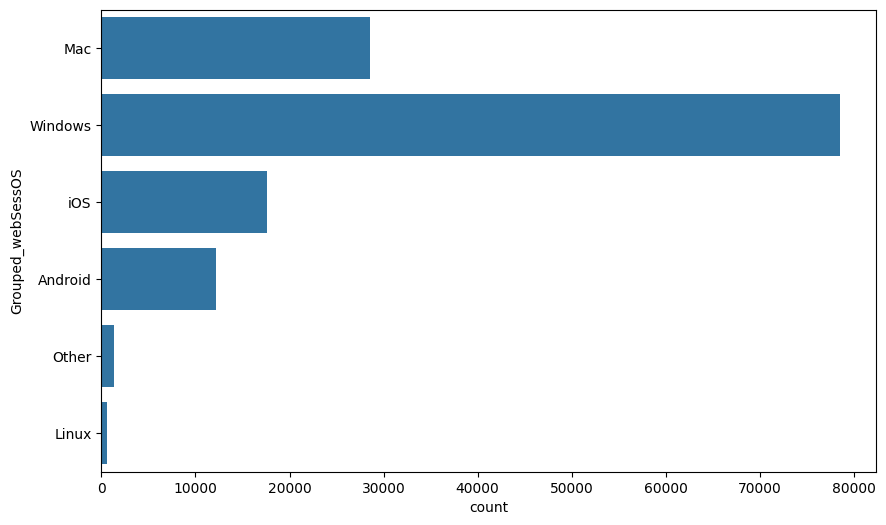

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(m['Grouped_webSessOS'])

<Axes: xlabel='Fraud', ylabel='Grouped_webSessOS'>

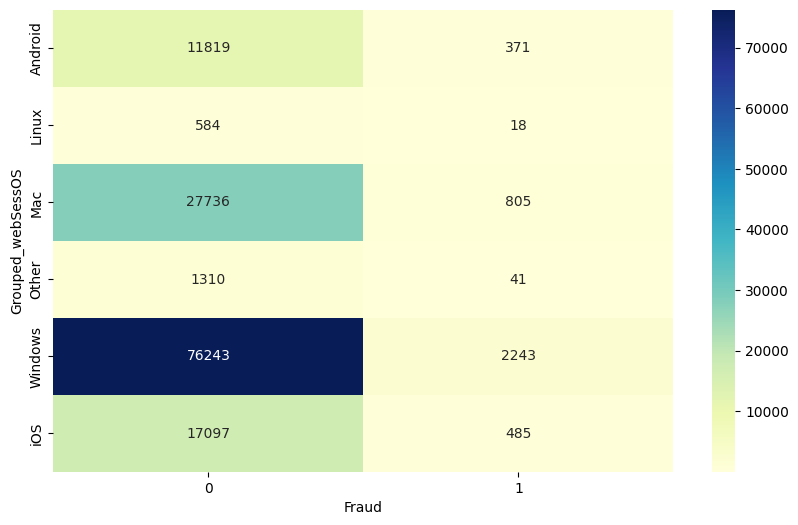

In [ ]:
crosstab_result = pd.crosstab(m['Grouped_webSessOS'], m['Fraud'])

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap="YlGnBu")

Windows has the highest no of Login Frauds.

In [ ]:
crosstab_ratio = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
crosstab_ratio

Fraud                     0         1
Grouped_webSessOS                    
Android            0.969565  0.030435
Linux              0.970100  0.029900
Mac                0.971795  0.028205
Other              0.969652  0.030348
Windows            0.971422  0.028578
iOS                0.972415  0.027585

But if we check the ratio, then Android has the highest ratio for Login Frauds.

In [ ]:
m['webSessOS'] = m.drop(columns=['webSessOS'], inplace=True)

###Column[18]: webSessWebBrowser

<Axes: xlabel='count', ylabel='webSessWebBrowser'>

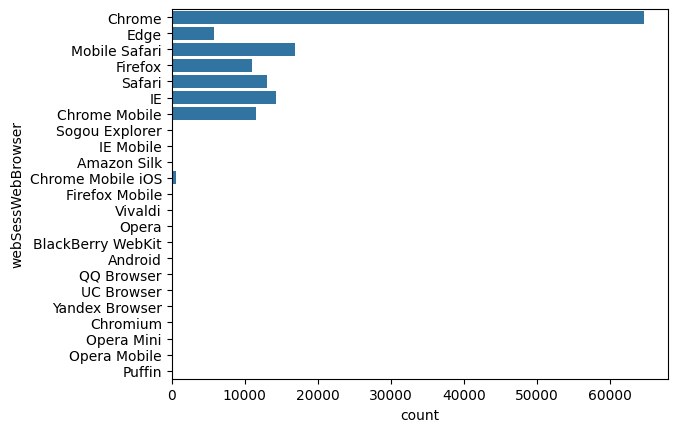

In [ ]:
sns.countplot(m['webSessWebBrowser'])

In [ ]:
m['webSessWebBrowser'].value_counts()

Chrome               64624
Mobile Safari        16886
IE                   14237
Safari               13080
Chrome Mobile        11517
Firefox              10944
Edge                  5813
Chrome Mobile iOS      594
Opera                  252
Android                232
Amazon Silk            188
IE Mobile              153
BlackBerry WebKit       69
Firefox Mobile          42
Sogou Explorer          33
Chromium                30
Vivaldi                 26
Yandex Browser          17
UC Browser               5
QQ Browser               4
Opera Mini               4
Opera Mobile             1
Puffin                   1
Name: webSessWebBrowser, dtype: int64

Mapping Web Browser into Chrome, Safari, IE, Firefox, Android, Edge, Opera and Other

In [ ]:
webSessWebBrowser_mapping = {
    'Chrome': 'Chrome',
    'Mobile Safari': 'Safari',
    'IE': 'IE',
    'Safari': 'Safari',
    'Chrome Mobile': 'Chrome',
    'Firefox': 'Firefox',
    'Edge': 'Edge',
    'Chrome Mobile iOS': 'Chrome',
    'Opera': 'Opera',
    'Android': 'Android',
    'Amazon Silk': 'Other',
    'IE Mobile': 'IE',
    'BlackBerry WebKit': 'Other',
    'Firefox Mobile': 'Firefox',
    'Chromium': 'Chrome',
    'Sogou Explorer': 'Other',
    'Vivaldi': 'Other',
    'Yandex Browser': 'Other',
    'UC Browser': 'Other',
    'QQ Browser': 'Other',
    'Opera Mini': 'Opera',
    'Opera Mobile': 'Opera',
    'Puffin': 'Other'
}

# Create a new column 'Browser_Category' based on the mapping
m['webSessWebBrowser_Category'] = m['webSessWebBrowser'].map(webSessWebBrowser_mapping)


<Axes: xlabel='Fraud', ylabel='webSessWebBrowser_Category'>

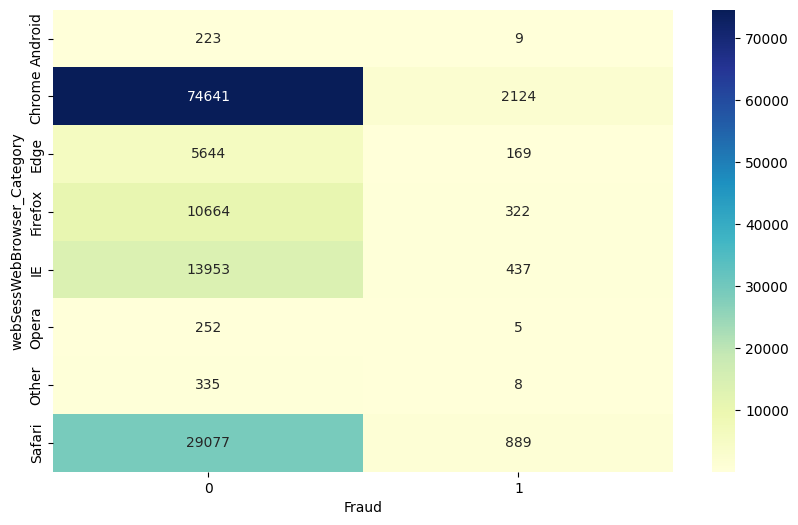

In [ ]:
crosstab_result = pd.crosstab(m['webSessWebBrowser_Category'], m['Fraud'])

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(crosstab_result, annot=True, fmt="d", cmap="YlGnBu")

Chrome has the highest no. of login frauds.

In [ ]:
crosstab_ratio = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
crosstab_ratio

Fraud                              0         1
webSessWebBrowser_Category                    
Android                     0.961207  0.038793
Chrome                      0.972331  0.027669
Edge                        0.970927  0.029073
Firefox                     0.970690  0.029310
IE                          0.969632  0.030368
Opera                       0.980545  0.019455
Other                       0.976676  0.023324
Safari                      0.970333  0.029667

But ratio-wise, Android has the highest login frauds.

Properties:
- No null values
- Data type: object

---


In [ ]:
m['webSessWebBrowser'] = m.drop(columns=['webSessWebBrowser'], inplace=True)

###Column[19]: LastLong

<Axes: xlabel='LastLong', ylabel='Count'>

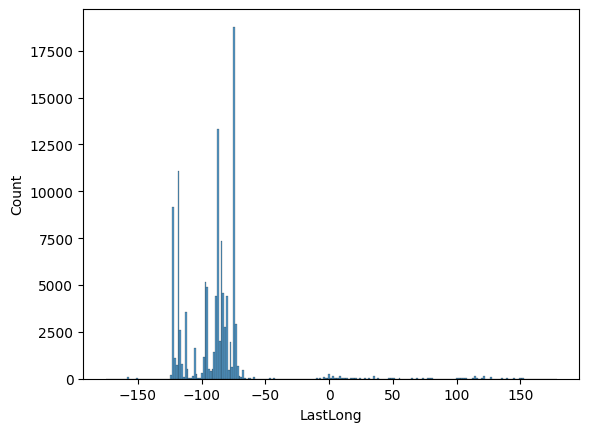

In [ ]:
sns.histplot(m['LastLong'])

In [ ]:
m = m.loc[:, m.columns != 'LastLong']

Properties:
- Presence of null values: 24389
- Data type: float

---


###Column[20]: LastLat

<Axes: xlabel='LastLat', ylabel='Count'>

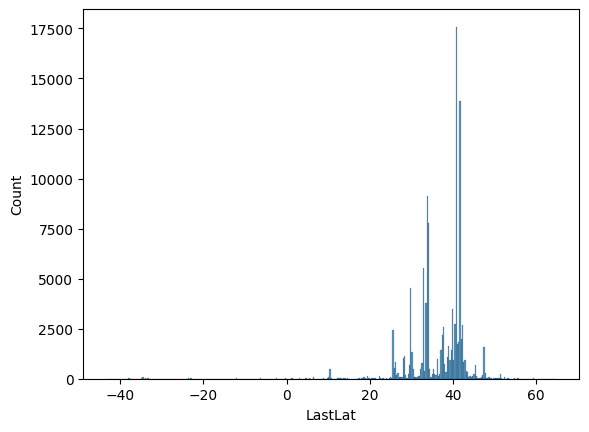

In [ ]:
sns.histplot(m['LastLat'])

In [ ]:
m = m.loc[:, m.columns != 'LastLat']

Properties:
- Presence of null values: 24231
- Data type: float

---


###Column[21]: CurrentLong

<Axes: xlabel='CurrentLong', ylabel='Count'>

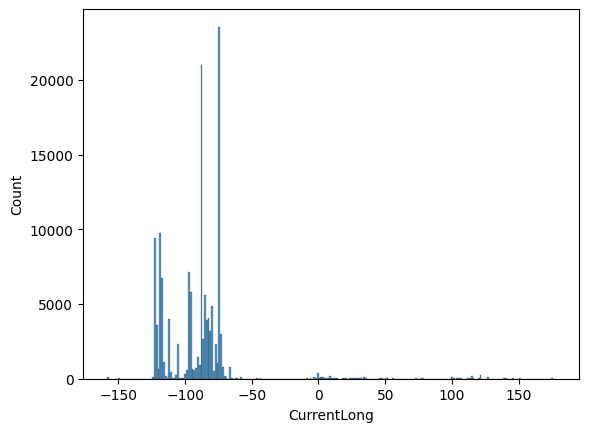

In [ ]:
sns.histplot(m['CurrentLong'])

In [ ]:
m = m.loc[:, m.columns != 'CurrentLong']

Properties:
- No null values
- Data type: int

---


###Column[22]: CurrentLat

<Axes: xlabel='CurrentLat', ylabel='Count'>

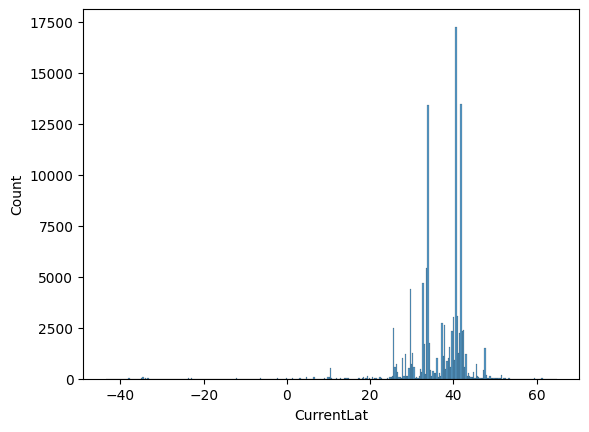

In [ ]:
sns.histplot(m['CurrentLat'])

In [ ]:
m = m.loc[:, m.columns != 'CurrentLat']

Properties:
- Presence of null values: 24379
- Data type: float

---


### Column[23]: IsOldDevice

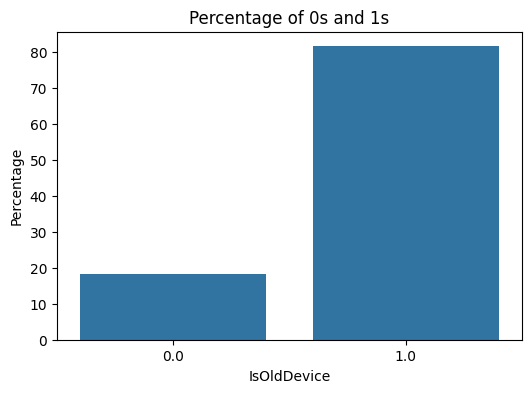

In [ ]:
IsOldDevice_percentage = m['IsOldDevice'].value_counts(normalize=True) * 100

# Plot the percentage of 0s and 1s
plt.figure(figsize=(6, 4))
sns.barplot(x=IsOldDevice_percentage.index, y=IsOldDevice_percentage.values)
plt.xlabel('IsOldDevice')
plt.ylabel('Percentage')
plt.title('Percentage of 0s and 1s')
plt.show()


In [ ]:
# Calculate median of the column
median_value = m['IsOldDevice'].median()

# Use lambda function with apply to replace NaN values with median
m['IsOldDevice'] = m['IsOldDevice'].apply(lambda x: median_value if pd.isna(x) else x)


Properties:
- Presence of null values: 4070
- Data type: int

1:0 :: 4:1

---


### Column[24]: webSessionRetail

In [ ]:
m['WebSessionRetail'].value_counts()

0.0    134714
Name: WebSessionRetail, dtype: int64

In [ ]:
m = m.drop(['WebSessionRetail'], axis=1)

Properties:
- Presence of null values: 4038
- Data type: int

Dropping this column because there are mostly null values and 0s only.

---


### Column[25]: MainEntityUse

<Axes: xlabel='MainEntityUse', ylabel='Count'>

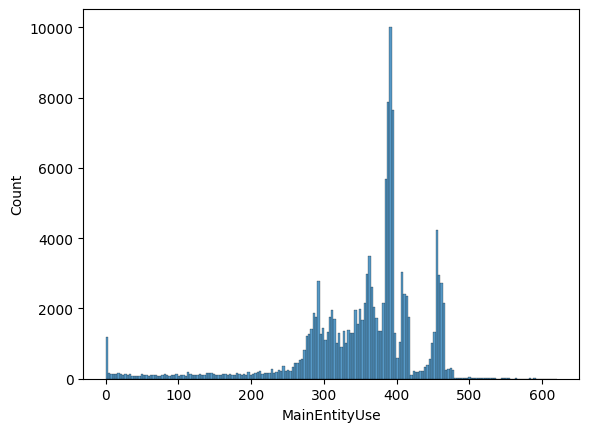

In [ ]:
sns.histplot(m['MainEntityUse'])

In [ ]:
# Calculate median of the column
median_value = m['MainEntityUse'].median()

# Use lambda function with apply to replace NaN values with median
m['MainEntityUse'] = m['MainEntityUse'].apply(lambda x: median_value if pd.isna(x) else x)


In [ ]:
'''m['log_MainEntityUse'] = np.log1p(m['MainEntityUse'])'''

"m['log_MainEntityUse'] = np.log1p(m['MainEntityUse'])"

<Axes: xlabel='MainEntityUse', ylabel='Count'>

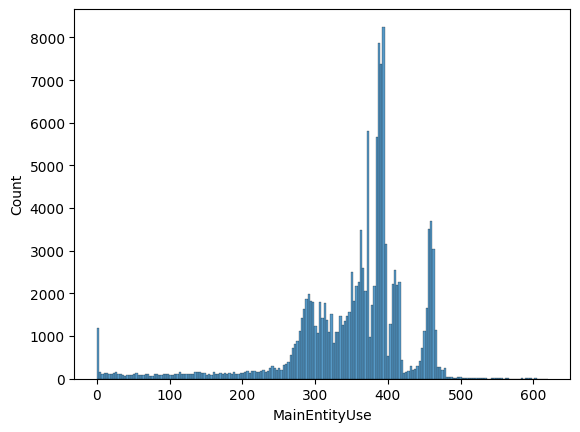

In [ ]:
sns.histplot(m['MainEntityUse'])

Properties:
- Presence of null values: 4080
- Data type: int

Filled na values with median.

---


### Column[26]: Fraud

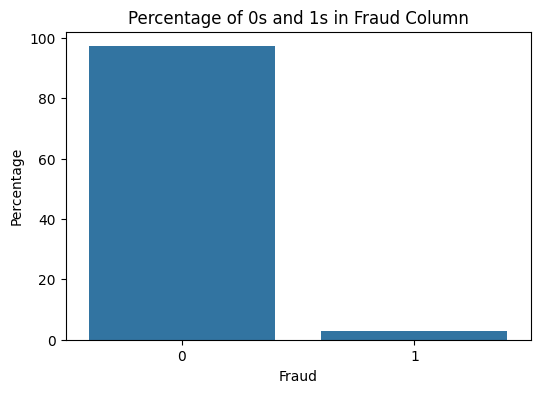

In [ ]:
Fraud_percentage = m['Fraud'].value_counts(normalize=True) * 100

# Plot the percentage of 0s and 1s
plt.figure(figsize=(6, 4))
sns.barplot(x=Fraud_percentage.index, y=Fraud_percentage.values)
plt.xlabel('Fraud')
plt.ylabel('Percentage')
plt.title('Percentage of 0s and 1s in Fraud Column')
plt.show()


Properties:
- No null values
- Data type: int

1:0  ::  97:3

---


### Additional Columns: TEDateDiff and EmailUpdateHour

In [ ]:
# Calculate median of the column
median_value = m['TEDateDiff'].median()

# Use lambda function with apply to replace NaN values with median
m['TEDateDiff'] = m['TEDateDiff'].apply(lambda x: median_value if pd.isna(x) else x)

In [ ]:
# Calculate median of the column
mode_value = m['EmailUpdateHour'].mode()

# Use lambda function with apply to replace NaN values with median
m['EmailUpdateHour'] = m['EmailUpdateHour'].apply(lambda x: mode_value if pd.isna(x) else x)

# Selecting features for the model

In [ ]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   V1CF                          138752 non-null  int64   
 1   V2CF                          138752 non-null  int64   
 2   V3CF                          138752 non-null  int64   
 3   V4CF                          138752 non-null  int64   
 4   V5CF                          138752 non-null  int64   
 5   ConnectionSpeed               138752 non-null  object  
 6   V6CF                          138752 non-null  object  
 7   channel                       138752 non-null  object  
 8   IsOldDevice                   138752 non-null  float64 
 9   MainEntityUse                 138752 non-null  float64 
 10  Fraud                         138752 non-null  int64   
 11  Country                       138752 non-null  object  
 12  TimeZone_Region               

In [ ]:
m[['TransactionHour', 'AddressUpdateHour', 'EmailUpdateHour']] = m[['TransactionHour', 'AddressUpdateHour', 'EmailUpdateHour']].astype(object)

In [ ]:
m.select_dtypes(include='object').nunique()

ConnectionSpeed               3
V6CF                          6
channel                       4
Country                       2
TimeZone_Region               4
GroupedConnectionType         5
TransactionHour               4
AddressUpdateHour             4
EmailUpdateHour               4
Grouped_webSessOS             6
webSessOS                     0
webSessWebBrowser_Category    8
webSessWebBrowser             0
dtype: int64

In [ ]:
m1 = m.copy()

# Dummies

In [ ]:
m1 = pd.get_dummies(m1, columns=m1.select_dtypes(include=['object']).columns, drop_first=True)

In [ ]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 50 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   V1CF                                138752 non-null  int64  
 1   V2CF                                138752 non-null  int64  
 2   V3CF                                138752 non-null  int64  
 3   V4CF                                138752 non-null  int64  
 4   V5CF                                138752 non-null  int64  
 5   IsOldDevice                         138752 non-null  float64
 6   MainEntityUse                       138752 non-null  float64
 7   Fraud                               138752 non-null  int64  
 8   GroupedConnectionOrg_Encoded        138752 non-null  int64  
 9   TADateDiff                          138752 non-null  int64  
 10  TEDateDiff                          138752 non-null  float64
 11  ConnectionSpeed_low       

# Model Building

Defining the x variables and Y variable/Target Variable.

In [ ]:
x = m1.drop(['Fraud'], axis=1)

y = m1['Fraud']

# LOGISTIC REGRESSION

## Preparing functions to measure the metrics

In [ ]:
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_actual, y_predict, labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual: ground truth
    '''
    cm = confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index=["Login Fraud", "No Login Fraud"],
                         columns=["Login Fraud", "No Login Fraud"])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f" {v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]

    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


### USING SK LEARN

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)

In [ ]:
y_train = pd.DataFrame(y_train, columns=['Fraud'])

In [ ]:
y_test = pd.DataFrame(y_test, columns=['Fraud'])

Fitting the Linear Model.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

Predicting onthe train set with default cutoff to be 0.5

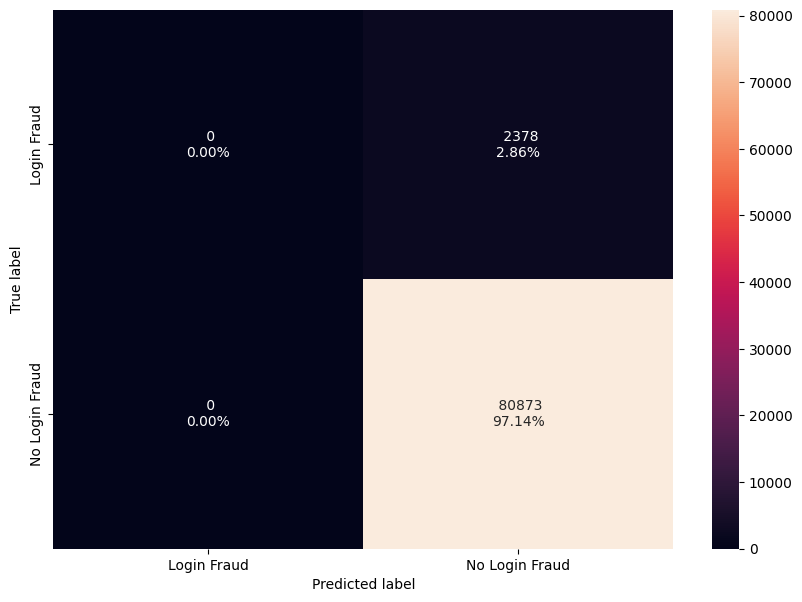

In [ ]:

pred_train = logreg.predict(x_train)
make_confusion_matrix(y_train, pred_train)


In [ ]:
pred_train = pd.DataFrame(pred_train, columns=['Predicted'])

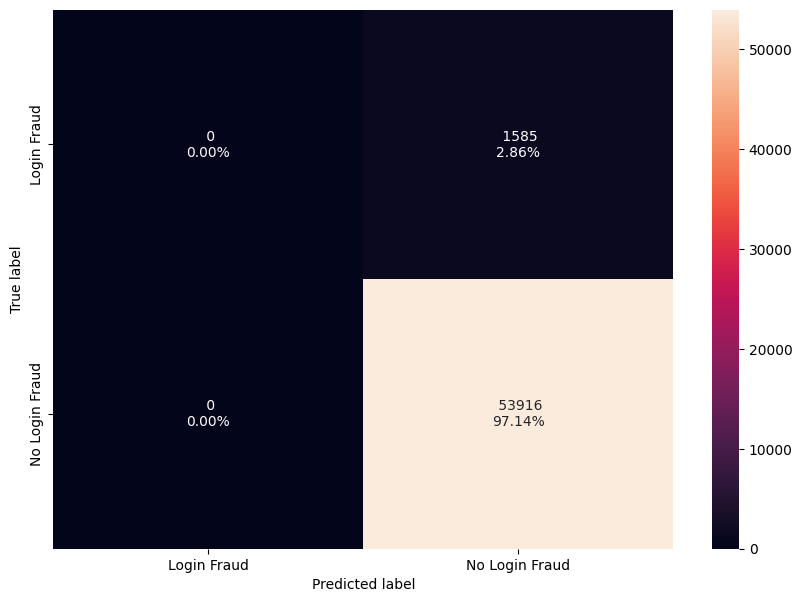

In [ ]:
pred_test = logreg.predict(x_test)
make_confusion_matrix(y_test, pred_test)

In [ ]:
pred_test = pd.DataFrame(pred_test, columns=['Predicted'])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [ ]:
print('Accuracy on train data:', accuracy_score(y_train, pred_train) )
print('Accuracy on test data:', accuracy_score(y_test, pred_test))
print("\n")
print("Recall on train data:", recall_score(y_train, pred_train))
print("Recall on test data:", recall_score(y_test, pred_test))
print("\n")
print("Precision on train data:", precision_score(y_train, pred_train))
print("Precision on test data:", precision_score(y_test, pred_test))
print("\n")
print("f1 score on train data:", f1_score(y_train, pred_train))
print("f1 score on test data:", f1_score(y_test, pred_test))

Accuracy on train data: 0.9714357785492066
Accuracy on test data: 0.9714419560007928


Recall on train data: 0.0
Recall on test data: 0.0


Precision on train data: 0.0
Precision on test data: 0.0


f1 score on train data: 0.0
f1 score on test data: 0.0


## Plot ROC-AUC curve and see the results

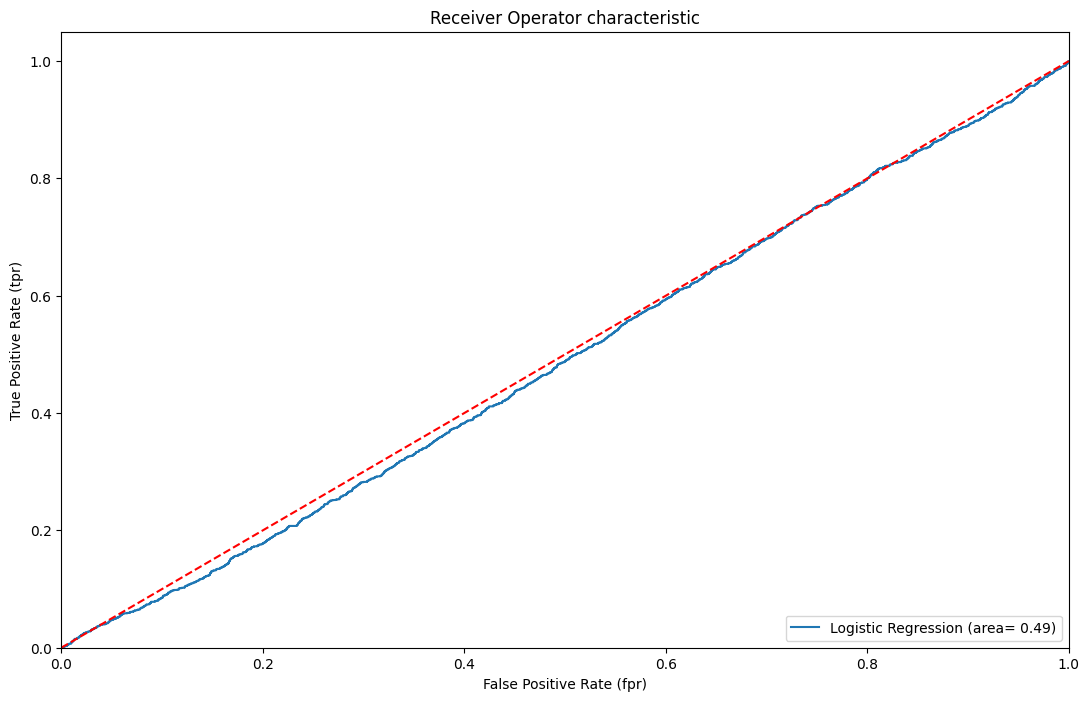

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds= roc_curve(y_test, logreg.predict_proba(x_test) [:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Optimal Cutoff

In [ ]:
train_pred_prob = logreg.predict_proba(x_train)[:,1]
train_pred_prob

array([0.0452875 , 0.01748517, 0.02030503, ..., 0.02789468, 0.0219234 ,
       0.04029634])

In [ ]:
train_pred_prob = pd.DataFrame(train_pred_prob, columns=['Predicted'])

In [ ]:
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

cutoff_data = pd.DataFrame(columns=column_names)
Cutoff_Prob = np.arange(0, 1.01, 0.01)

for cutoff in Cutoff_Prob:
    y_train["pred_y"] = (train_pred_prob > cutoff).astype("int64")
    TP = np.logical_and((y_train.pred_y == 1), (y_train.Fraud == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.Fraud == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.Fraud == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.Fraud == 0)).sum()
    P = TP + FN
    N = TN + FP

    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    cutoff_data = cutoff_data.append(temp_data, ignore_index=True)

# Dropping the pred_y column from y_train data
y_train.drop("pred_y", axis=1, inplace=True)

We have got the basic cutoff data. Let us now get all the features needed to decide the cutoff.

In [ ]:
cutoff_data['Sn']= cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] = cutoff_data["TN"]/cutoff_data["N"]
cutoff_data['Dist'] = ((1-cutoff_data["Sn"])**2 + (1-cutoff_data["Sp"])**2)** 0.5
cutoff_data['KS'] = ((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] = cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] = cutoff_data["TP"]/(cutoff_data["TP"] + cutoff_data["FP"])
cutoff_data['tpr'] = cutoff_data["Re"]
cutoff_data['fpr'] =  1 - cutoff_data["Sp"]
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] + cutoff_data["Re"])

In [ ]:
cutoff_data.head()

Cutoff_Prob      TP      FN       TN       FP       P        N        Sn  \
0         0.00  1448.0     0.0      0.0  48630.0  1448.0  48630.0  1.000000   
1         0.01  1448.0     0.0      1.0  48629.0  1448.0  48630.0  1.000000   
2         0.02  1167.0   281.0   9032.0  39598.0  1448.0  48630.0  0.805939   
3         0.03   512.0   936.0  31153.0  17477.0  1448.0  48630.0  0.353591   
4         0.04   221.0  1227.0  41153.0   7477.0  1448.0  48630.0  0.152624   

         Sp      Dist        KS        Re        Pr       tpr       fpr  \
0  0.000000  1.000000  0.000000  1.000000  0.028915  1.000000  1.000000   
1  0.000021  0.999979  0.000021  1.000000  0.028915  1.000000  0.999979   
2  0.185729  0.837076  0.008332  0.805939  0.028627  0.805939  0.814271   
3  0.640613  0.739597  0.005796  0.353591  0.028462  0.353591  0.359387   
4  0.846247  0.861212  0.001129  0.152624  0.028709  0.152624  0.153753   

         f1  
0  0.056205  
1  0.056206  
2  0.055291  
3  0.052683  
4  0.048327

Let us now check for the results for accuracy using different cutoff methods.<br> Let us pick up max distance first

In [ ]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data ["Dist"]), "Cutoff_Prob"]
ks_cutoff =  cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]

In [ ]:
print ("The dist cutoff determined is:", dist_cutoff)
print ("The KS cutoff determined is:", ks_cutoff)
print ("The f1 cutoff determined is:", f1_cutoff)

The dist cutoff determined is: 0.03
The KS cutoff determined is: 0.05
The f1 cutoff determined is: 0.01


In [ ]:
cutoffs = [dist_cutoff, ks_cutoff, f1_cutoff]

for cutoff in cutoffs:
  y_pred_train = (logreg.predict_proba(x_train)[:,1]> cutoff).astype(int)
  y_pred_test = (logreg.predict_proba(x_test)[:,1]> cutoff).astype(int)

  print("Using the cutoff value as:", cutoff)
  print('Accuracy on train data:', accuracy_score(y_train, y_pred_train))
  print("Accuracy on test data:", accuracy_score(y_test, y_pred_test))
  print("Recall on train data:", recall_score(y_train, y_pred_train))
  print("Recall on test data:", recall_score(y_test, y_pred_test))
  print("Precision on train data:", precision_score(y_train, y_pred_train))
  print("Precision on test data:", precision_score(y_test, y_pred_test))
  print("f1 score on train data:", f1_score(y_train, y_pred_train))
  print("f1 score on test data:", f1_score(y_test, y_pred_test))
  print("\n")

Using the cutoff value as: 0.03
Accuracy on train data: 0.6331575596689529
Accuracy on test data: 0.6288174987838057
Recall on train data: 0.383515559293524
Recall on test data: 0.3419558359621451
Precision on train data: 0.030414193290202094
Precision on test data: 0.026965174129353234
f1 score on train data: 0.05635891731553578
f1 score on test data: 0.04998847129352087


Using the cutoff value as: 0.05
Accuracy on train data: 0.9119169739702826
Accuracy on test data: 0.912163744797391
Recall on train data: 0.0782169890664424
Recall on test data: 0.05867507886435331
Precision on train data: 0.034916463300168954
Precision on test data: 0.026754890678941313
f1 score on train data: 0.04828033744321869
f1 score on test data: 0.03675163011262596


Using the cutoff value as: 0.01
Accuracy on train data: 0.028600257053969323
Accuracy on test data: 0.028576061692582116
Recall on train data: 1.0
Recall on test data: 1.0
Precision on train data: 0.02856525081683644
Precision on test data: 0.02

In [ ]:
default = 0.5

In [ ]:
cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]
results = []

for cutoff in cutoffs:
    y_pred_train = (logreg.predict_proba(x_train)[:, 1] > cutoff).astype(int)
    y_pred_test = (logreg.predict_proba(x_test)[:, 1] > cutoff).astype(int)

    result_dict = {
        "Cutoff": cutoff,
        'Accuracy_train': accuracy_score(y_train, y_pred_train),
        'Accuracy_test': accuracy_score(y_test, y_pred_test),
        'Recall_train': recall_score(y_train, y_pred_train),
        'Recall_test': recall_score(y_test, y_pred_test),
        'Precision_train': precision_score(y_train, y_pred_train),
        'Precision_test': precision_score(y_test, y_pred_test),
        'F1_train': f1_score(y_train, y_pred_train),
        'F1_test': f1_score(y_test, y_pred_test),
    }

    results.append(result_dict)

# Convert the list of dictionaries to a DataFrame
results0 = pd.DataFrame(results)

# Display the DataFrame
print(results0)

   Cutoff  Accuracy_train  Accuracy_test  Recall_train  Recall_test  \
0    0.50        0.971436       0.971442      0.000000     0.000000   
1    0.03        0.633158       0.628817      0.383516     0.341956   
2    0.05        0.911917       0.912164      0.078217     0.058675   
3    0.01        0.028600       0.028576      1.000000     1.000000   

   Precision_train  Precision_test  F1_train   F1_test  
0         0.000000        0.000000  0.000000  0.000000  
1         0.030414        0.026965  0.056359  0.049988  
2         0.034916        0.026755  0.048280  0.036752  
3         0.028565        0.028559  0.055544  0.055531  


In [ ]:
#Taking all the numeric columns
import statsmodels.api as sm
from statsmodels.api import add_constant
num_features = x.copy()
num_features = add_constant(num_features)

## Using statsmodel library to build the model



### Multicollinearity

Let us first check for the multicollinearity in the features
<br>To carryout this we will be using the Variance Inflation Factor.<br>
The higher the VIF value, larger the multicollinearity.


**What is Multi collinearity?**<br>
When variable A changes and at the same time variable B changes by 'n' times, then we say that there is presence of multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_series = pd.Series([variance_inflation_factor(num_features.values, i) for i in range(num_features.shape[1])], index=num_features.columns)

# Print the VIF values
print('Series before feature selection:\n\n{}\n'.format(vif_series))

Series before feature selection:

const                                 843.237463
V1CF                                    1.000467
V2CF                                    1.000276
V3CF                                    1.000348
V4CF                                    1.000323
V5CF                                    1.000256
IsOldDevice                             1.000292
MainEntityUse                           1.000328
GroupedConnectionOrg_Encoded            1.000216
TADateDiff                              1.061463
TEDateDiff                              1.177700
ConnectionSpeed_low                     1.402401
ConnectionSpeed_medium                  1.402498
V6CF_edu                                1.049457
V6CF_net                                1.337523
V6CF_org                                1.023717
V6CF_other                              1.063037
V6CF_unknown                            1.257953
channel_KOL                             1.813207
channel_SOA                        

'webSessWebBrowser_Category_Chrome' has the highest VIF Value. So we will drop it. Yes we can see other variables with high VIFs too but highest first and make sure to delete one by one.

In [ ]:
# Drop the feature with the highest VIF
x_train1 = x_train.drop('webSessWebBrowser_Category_Chrome', axis=1)

# Calculate VIF for each feature after dropping 'Age'
vif_series1 = pd.Series([variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])], index=x_train1.columns)

# Print the VIF values after feature selection
print('VIF Series after feature selection: \n\n{}\n'.format(vif_series1))

VIF Series after feature selection: 

V1CF                                  61.718825
V2CF                                  10.091301
V3CF                                   9.571613
V4CF                                  12.379835
V5CF                                   6.628779
IsOldDevice                            5.492110
MainEntityUse                         15.848502
GroupedConnectionOrg_Encoded           2.022875
TADateDiff                             1.960934
TEDateDiff                             3.764843
ConnectionSpeed_low                    1.562528
ConnectionSpeed_medium                 4.673870
V6CF_edu                               1.069011
V6CF_net                               2.829654
V6CF_org                               1.032092
V6CF_other                             1.090598
V6CF_unknown                           1.427792
channel_KOL                            2.510190
channel_SOA                            3.701916
channel_WMS                            1.007978
Co

Dropping 'V1CF'

In [ ]:
# Drop the feature with the highest VIF
x_train2 = x_train1.drop('V1CF', axis=1)

# Calculate VIF for each feature after dropping 'Age'
vif_series2 = pd.Series([variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])], index=x_train2.columns)

# Print the VIF values after feature selection
print('VIF Series after feature selection: \n\n{}\n'.format(vif_series2))

VIF Series after feature selection: 

V2CF                                   9.608334
V3CF                                   9.130762
V4CF                                  11.621207
V5CF                                   6.422696
IsOldDevice                            5.367432
MainEntityUse                         14.538117
GroupedConnectionOrg_Encoded           2.012711
TADateDiff                             1.956480
TEDateDiff                             3.725958
ConnectionSpeed_low                    1.545697
ConnectionSpeed_medium                 4.575014
V6CF_edu                               1.067323
V6CF_net                               2.800828
V6CF_org                               1.031669
V6CF_other                             1.089325
V6CF_unknown                           1.421390
channel_KOL                            2.466172
channel_SOA                            3.626864
channel_WMS                            1.007489
Country_us                            18.763880
Ti

Dropping 'Country_us'

In [ ]:
# Drop the feature with the highest VIF
x_train3 = x_train2.drop('Country_us', axis=1)

# Calculate VIF for each feature after dropping 'Age'
vif_series3 = pd.Series([variance_inflation_factor(x_train3.values, i) for i in range(x_train3.shape[1])], index=x_train3.columns)

# Print the VIF values after feature selection
print('VIF Series after feature selection: \n\n{}\n'.format(vif_series3))

VIF Series after feature selection: 

V2CF                                   9.394030
V3CF                                   8.918702
V4CF                                  11.255558
V5CF                                   6.337088
IsOldDevice                            5.303596
MainEntityUse                         13.902854
GroupedConnectionOrg_Encoded           2.008799
TADateDiff                             1.954242
TEDateDiff                             3.704864
ConnectionSpeed_low                    1.539370
ConnectionSpeed_medium                 4.529287
V6CF_edu                               1.066680
V6CF_net                               2.787105
V6CF_org                               1.031515
V6CF_other                             1.088480
V6CF_unknown                           1.418293
channel_KOL                            2.449798
channel_SOA                            3.595367
channel_WMS                            1.007404
TimeZone_Region_Asia/Oceania           1.010472
Ti

Dropping 'MainEntityUse'

In [ ]:
# Drop the feature with the highest VIF
x_train4 = x_train3.drop('MainEntityUse', axis=1)

# Calculate VIF for each feature after dropping 'Age'
vif_series4 = pd.Series([variance_inflation_factor(x_train4.values, i) for i in range(x_train4.shape[1])], index=x_train4.columns)

# Print the VIF values after feature selection
print('VIF Series after feature selection: \n\n{}\n'.format(vif_series4))

VIF Series after feature selection: 

V2CF                                   9.143200
V3CF                                   8.710794
V4CF                                  10.835126
V5CF                                   6.229870
IsOldDevice                            5.245279
GroupedConnectionOrg_Encoded           2.003760
TADateDiff                             1.952419
TEDateDiff                             3.687540
ConnectionSpeed_low                    1.532404
ConnectionSpeed_medium                 4.479683
V6CF_edu                               1.065927
V6CF_net                               2.772709
V6CF_org                               1.031224
V6CF_other                             1.087201
V6CF_unknown                           1.415012
channel_KOL                            2.431807
channel_SOA                            3.563327
channel_WMS                            1.007310
TimeZone_Region_Asia/Oceania           1.010463
TimeZone_Region_Europe/Africa          1.024328
Ti

Dropping 'V4CF'

In [ ]:
# Drop the feature with the highest VIF
x_train5 = x_train4.drop('V4CF', axis=1)

# Calculate VIF for each feature after dropping 'Age'
vif_series5 = pd.Series([variance_inflation_factor(x_train5.values, i) for i in range(x_train5.shape[1])], index=x_train5.columns)

# Print the VIF values after feature selection
print('VIF Series after feature selection: \n\n{}\n'.format(vif_series5))

VIF Series after feature selection: 

V2CF                                  8.872954
V3CF                                  8.461444
V5CF                                  6.119237
IsOldDevice                           5.178914
GroupedConnectionOrg_Encoded          1.997820
TADateDiff                            1.949055
TEDateDiff                            3.666369
ConnectionSpeed_low                   1.524657
ConnectionSpeed_medium                4.426654
V6CF_edu                              1.065420
V6CF_net                              2.753162
V6CF_org                              1.030909
V6CF_other                            1.086250
V6CF_unknown                          1.410825
channel_KOL                           2.411971
channel_SOA                           3.526843
channel_WMS                           1.007157
TimeZone_Region_Asia/Oceania          1.010462
TimeZone_Region_Europe/Africa         1.024314
TimeZone_Region_Unknown               1.000477
GroupedConnectionType_

Dropping 'V2CF'

In [ ]:
# Drop the feature with the highest VIF
x_train6 = x_train5.drop('V2CF', axis=1)

# Calculate VIF for each feature after dropping 'Age'
vif_series6 = pd.Series([variance_inflation_factor(x_train6.values, i) for i in range(x_train6.shape[1])], index=x_train6.columns)

# Print the VIF values after feature selection
print('VIF Series after feature selection: \n\n{}\n'.format(vif_series6))

VIF Series after feature selection: 

V3CF                                  8.192347
V5CF                                  6.008374
IsOldDevice                           5.092787
GroupedConnectionOrg_Encoded          1.990953
TADateDiff                            1.945471
TEDateDiff                            3.643564
ConnectionSpeed_low                   1.515267
ConnectionSpeed_medium                4.364559
V6CF_edu                              1.064823
V6CF_net                              2.734687
V6CF_org                              1.030773
V6CF_other                            1.084945
V6CF_unknown                          1.405801
channel_KOL                           2.387713
channel_SOA                           3.481682
channel_WMS                           1.007061
TimeZone_Region_Asia/Oceania          1.010450
TimeZone_Region_Europe/Africa         1.024143
TimeZone_Region_Unknown               1.000449
GroupedConnectionType_dialup          1.002846
GroupedConnectionType_

Dropping 'V3CF'

In [ ]:
# Drop the feature with the highest VIF
x_train7 = x_train6.drop('V3CF', axis=1)

# Calculate VIF for each feature after dropping 'Age'
vif_series7 = pd.Series([variance_inflation_factor(x_train7.values, i) for i in range(x_train7.shape[1])], index=x_train7.columns)

# Print the VIF values after feature selection
print('VIF Series after feature selection: \n\n{}\n'.format(vif_series7))

VIF Series after feature selection: 

V5CF                                  5.855455
IsOldDevice                           4.994033
GroupedConnectionOrg_Encoded          1.982282
TADateDiff                            1.941456
TEDateDiff                            3.611421
ConnectionSpeed_low                   1.501080
ConnectionSpeed_medium                4.275006
V6CF_edu                              1.064008
V6CF_net                              2.709829
V6CF_org                              1.030166
V6CF_other                            1.083890
V6CF_unknown                          1.400257
channel_KOL                           2.351696
channel_SOA                           3.419495
channel_WMS                           1.007050
TimeZone_Region_Asia/Oceania          1.010317
TimeZone_Region_Europe/Africa         1.024108
TimeZone_Region_Unknown               1.000449
GroupedConnectionType_dialup          1.002824
GroupedConnectionType_other           1.025011
GroupedConnectionType_

Dropping 'V5CF'

In [ ]:
# Drop the feature with the highest VIF
x_train8 = x_train7.drop('V5CF', axis=1)

# Calculate VIF for each feature after dropping 'Age'
vif_series8 = pd.Series([variance_inflation_factor(x_train8.values, i) for i in range(x_train8.shape[1])], index=x_train8.columns)

# Print the VIF values after feature selection
print('VIF Series after feature selection: \n\n{}\n'.format(vif_series8))

VIF Series after feature selection: 

IsOldDevice                           4.899234
GroupedConnectionOrg_Encoded          1.973396
TADateDiff                            1.936522
TEDateDiff                            3.582531
ConnectionSpeed_low                   1.488972
ConnectionSpeed_medium                4.201422
V6CF_edu                              1.063059
V6CF_net                              2.686728
V6CF_org                              1.029612
V6CF_other                            1.082735
V6CF_unknown                          1.394744
channel_KOL                           2.319284
channel_SOA                           3.361468
channel_WMS                           1.006798
TimeZone_Region_Asia/Oceania          1.010295
TimeZone_Region_Europe/Africa         1.024028
TimeZone_Region_Unknown               1.000448
GroupedConnectionType_dialup          1.002818
GroupedConnectionType_other           1.024879
GroupedConnectionType_satellite       1.002686
GroupedConnectionType_

### Significance Test

Removing insignificant variables. We can decide whether there is any significant relationship between the dependent variable y and the independent variables in the logistic regression equation.

**H0: Variable is insignificant(p-value > 0.05)**<br>
**H1: Variable is significant(p-value < 0.05)**

In [ ]:
lrm = sm.Logit(y_train, x_train8)
lres = lrm.fit()
print(lres.summary())

         Current function value: 0.135381
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83210
Method:                           MLE   Df Model:                           40
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04368
Time:                        16:03:12   Log-Likelihood:                -11271.
converged:                      False   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5566      0.042    -13.243      0.000      -0.639      -0.474
GroupedConnectionOrg_Encoded       -1.248e-05   2.13e-06   

Removing 'GroupedConnectionType_dialup' with the highest alpha.

In [ ]:
x_train9 = x_train8.drop('GroupedConnectionType_dialup', axis=1)

lrm1 = sm.Logit(y_train, x_train9)
lres1 = lrm1.fit()
print(lres1.summary())

         Current function value: 0.135381
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83211
Method:                           MLE   Df Model:                           39
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04368
Time:                        16:32:01   Log-Likelihood:                -11271.
converged:                      False   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5567      0.042    -13.243      0.000      -0.639      -0.474
GroupedConnectionOrg_Encoded       -1.248e-05   2.13e-06   

Removing 'TimeZone_Region_Unknown' with the highest alpha.

In [ ]:
x_train10 = x_train9.drop('TimeZone_Region_Unknown', axis=1)

lrm2 = sm.Logit(y_train, x_train10)
lres2 = lrm2.fit()
print(lres2.summary())

Optimization terminated successfully.
         Current function value: 0.135384
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83212
Method:                           MLE   Df Model:                           38
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04370
Time:                        16:33:30   Log-Likelihood:                -11271.
converged:                       True   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5567      0.042    

Removing 'webSessWebBrowser_Category_Other' with the highest alpha.

In [ ]:
x_train11 = x_train10.drop('webSessWebBrowser_Category_Other', axis=1)

lrm3 = sm.Logit(y_train, x_train11)
lres3 = lrm3.fit()
print(lres3.summary())

Optimization terminated successfully.
         Current function value: 0.135386
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83213
Method:                           MLE   Df Model:                           37
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04372
Time:                        16:34:29   Log-Likelihood:                -11271.
converged:                       True   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5565      0.042    

Removing 'webSessWebBrowser_Category_Opera' with the highest alpha.

In [ ]:
x_train12 = x_train11.drop('webSessWebBrowser_Category_Opera', axis=1)

lrm4 = sm.Logit(y_train, x_train12)
lres4 = lrm4.fit()
print(lres4.summary())

Optimization terminated successfully.
         Current function value: 0.135389
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83214
Method:                           MLE   Df Model:                           36
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04374
Time:                        16:35:50   Log-Likelihood:                -11271.
converged:                       True   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5568      0.042    

Removing 'TimeZone_Region_Asia/Oceania' with the highest alpha.

In [ ]:
x_train13 = x_train12.drop('TimeZone_Region_Asia/Oceania', axis=1)

lrm5 = sm.Logit(y_train, x_train13)
lres5 = lrm5.fit()
print(lres5.summary())

Optimization terminated successfully.
         Current function value: 0.135391
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83215
Method:                           MLE   Df Model:                           35
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04376
Time:                        16:37:21   Log-Likelihood:                -11271.
converged:                       True   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5569      0.042    

Removing 'V6CF_org' with the highest alpha.

In [ ]:
x_train14 = x_train13.drop('V6CF_org', axis=1)

lrm6 = sm.Logit(y_train, x_train14)
lres6 = lrm6.fit()
print(lres6.summary())

Optimization terminated successfully.
         Current function value: 0.135394
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83216
Method:                           MLE   Df Model:                           34
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04378
Time:                        16:39:36   Log-Likelihood:                -11272.
converged:                       True   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5561      0.042    

Removing 'TimeZone_Region_Europe/Africa' with the highest alpha.

In [ ]:
x_train15 = x_train14.drop('TimeZone_Region_Europe/Africa', axis=1)

lrm6 = sm.Logit(y_train, x_train15)
lres6 = lrm6.fit()
print(lres6.summary())

Optimization terminated successfully.
         Current function value: 0.135397
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83217
Method:                           MLE   Df Model:                           33
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04380
Time:                        16:40:26   Log-Likelihood:                -11272.
converged:                       True   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5565      0.042    

Removing 'channel_WMS' with the highest alpha.

In [ ]:
x_train16 = x_train15.drop('channel_WMS', axis=1)

lrm7 = sm.Logit(y_train, x_train16)
lres7 = lrm7.fit()
print(lres7.summary())

Optimization terminated successfully.
         Current function value: 0.135402
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83218
Method:                           MLE   Df Model:                           32
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04384
Time:                        16:41:24   Log-Likelihood:                -11272.
converged:                       True   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5569      0.042    

Removing 'GroupedConnectionType_satellite' with the highest alpha.

In [ ]:
x_train17 = x_train16.drop('GroupedConnectionType_satellite', axis=1)

lrm8 = sm.Logit(y_train, x_train17)
lres8 = lrm8.fit()
print(lres8.summary())

Optimization terminated successfully.
         Current function value: 0.135411
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83219
Method:                           MLE   Df Model:                           31
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04391
Time:                        16:42:24   Log-Likelihood:                -11273.
converged:                       True   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5569      0.042    

Removing 'webSessWebBrowser_Category_IE' with the highest alpha.

In [ ]:
x_train18 = x_train17.drop('webSessWebBrowser_Category_IE', axis=1)

lrm10 = sm.Logit(y_train, x_train18)
lres10 = lrm10.fit()
print(lres10.summary())

Optimization terminated successfully.
         Current function value: 0.135422
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83220
Method:                           MLE   Df Model:                           30
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04400
Time:                        16:43:21   Log-Likelihood:                -11274.
converged:                       True   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5592      0.042    

Removing 'GroupedConnectionType_other' with the highest alpha.

In [ ]:
x_train19 = x_train18.drop('GroupedConnectionType_other', axis=1)

lrm11 = sm.Logit(y_train, x_train19)
lres11 = lrm11.fit()
print(lres11.summary())

Optimization terminated successfully.
         Current function value: 0.135445
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83221
Method:                           MLE   Df Model:                           29
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04417
Time:                        16:45:01   Log-Likelihood:                -11276.
converged:                       True   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5606      0.042    

Removing 'EmailUpdateHour_Night' with the highest alpha.

In [ ]:
x_train20 = x_train19.drop('EmailUpdateHour_Night', axis=1)

lrm12 = sm.Logit(y_train, x_train20)
lres12 = lrm12.fit()
print(lres12.summary())

Optimization terminated successfully.
         Current function value: 0.135467
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                83251
Model:                          Logit   Df Residuals:                    83222
Method:                           MLE   Df Model:                           28
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                -0.04434
Time:                        16:45:37   Log-Likelihood:                -11278.
converged:                       True   LL-Null:                       -10799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
IsOldDevice                           -0.5612      0.042    

Finally we can see that all the respective p-values are under the value of alpha. Hence, we don't need any more reduction in the variables.

## Now we can move towards prediction part



Prediciting on the test data

In [ ]:
x_train20.columns

Index(['IsOldDevice', 'GroupedConnectionOrg_Encoded', 'TADateDiff',
       'TEDateDiff', 'ConnectionSpeed_low', 'ConnectionSpeed_medium',
       'V6CF_edu', 'V6CF_net', 'V6CF_other', 'V6CF_unknown', 'channel_KOL',
       'channel_SOA', 'GroupedConnectionType_wireless',
       'TransactionHour_Evening', 'TransactionHour_Morning',
       'TransactionHour_Night', 'AddressUpdateHour_Evening',
       'AddressUpdateHour_Morning', 'AddressUpdateHour_Night',
       'EmailUpdateHour_Evening', 'EmailUpdateHour_Morning',
       'Grouped_webSessOS_Linux', 'Grouped_webSessOS_Mac',
       'Grouped_webSessOS_Other', 'Grouped_webSessOS_Windows',
       'Grouped_webSessOS_iOS', 'webSessWebBrowser_Category_Edge',
       'webSessWebBrowser_Category_Firefox',
       'webSessWebBrowser_Category_Safari'],
      dtype='object')

In [ ]:
x_test_final = x_test[x_train20.columns]

In [ ]:
y_pred = lres12.predict(x_test_final)

## Checking the performance on test using sklearn again with the updated variables.


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train20, y_train)

LogisticRegression()

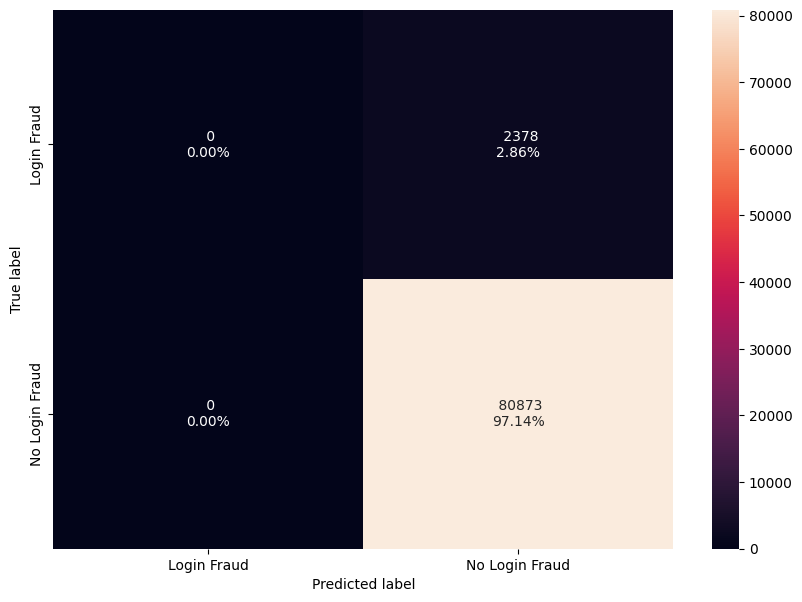

In [ ]:

pred_train1 = lr.predict(x_train20)
make_confusion_matrix(y_train, pred_train1)


In [ ]:
pred_train1 = pd.DataFrame(pred_train1, columns=['Predicted'])

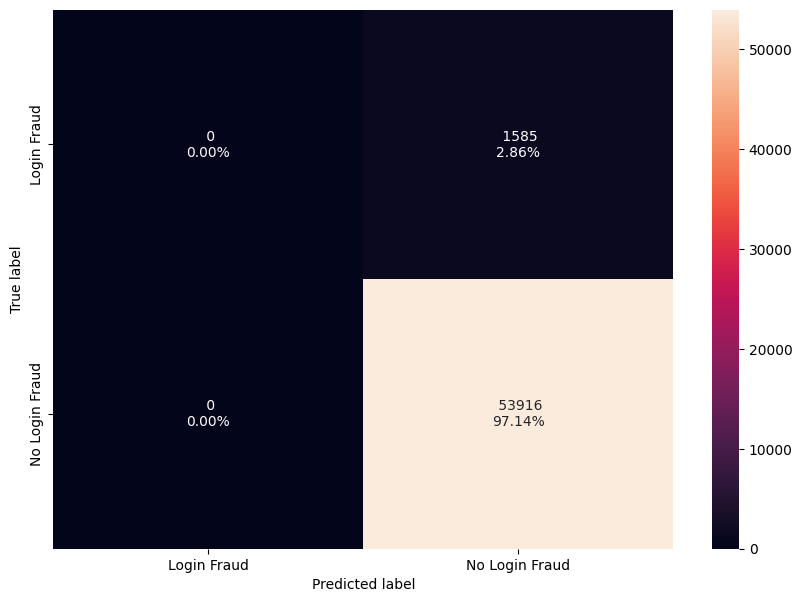

In [ ]:
pred_test1 = lr.predict(x_test_final)
make_confusion_matrix(y_test, pred_test1)

In [ ]:
pred_test1 = pd.DataFrame(pred_test1, columns=['Predicted'])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [ ]:
print('Accuracy on train data:', accuracy_score(y_train, pred_train1) )
print('Accuracy on test data:', accuracy_score(y_test, pred_test1))
print("\n")
print("Recall on train data:", recall_score(y_train, pred_train1))
print("Recall on test data:", recall_score(y_test, pred_test1))
print("\n")
print("Precision on train data:", precision_score(y_train, pred_train1))
print("Precision on test data:", precision_score(y_test, pred_test1))
print("\n")
print("f1 score on train data:", f1_score(y_train, pred_train1))
print("f1 score on test data:", f1_score(y_test, pred_test1))

Accuracy on train data: 0.9714357785492066
Accuracy on test data: 0.9714419560007928


Recall on train data: 0.0
Recall on test data: 0.0


Precision on train data: 0.0
Precision on test data: 0.0


f1 score on train data: 0.0
f1 score on test data: 0.0


## Plot ROC-AUC curve and see the results

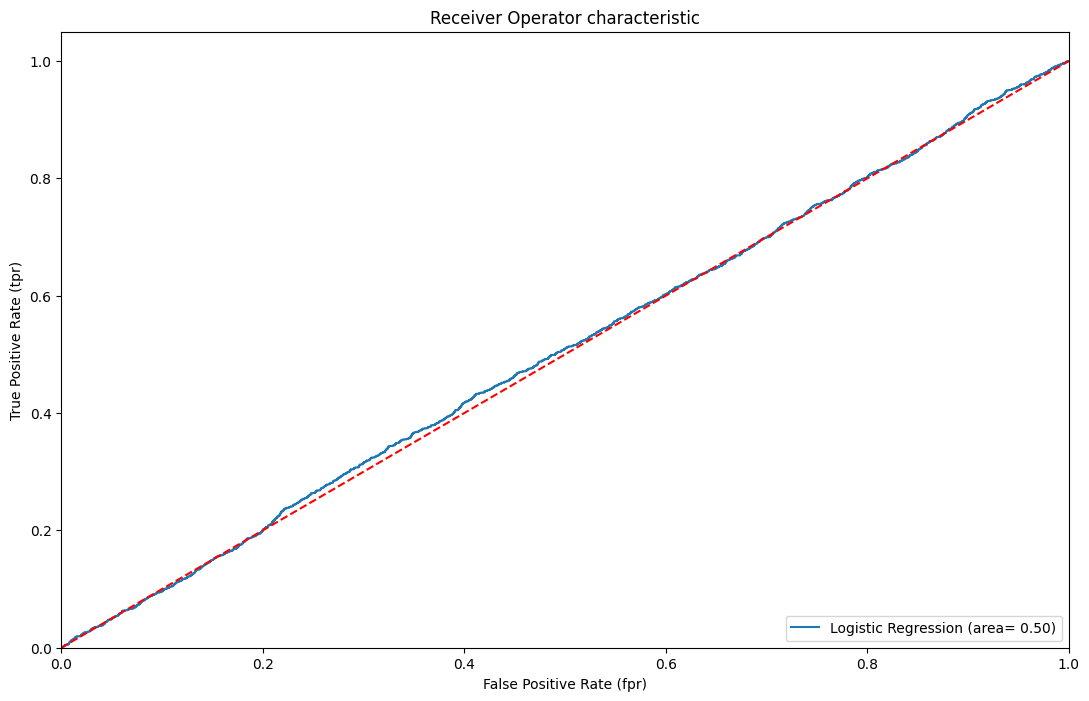

In [ ]:
logit_roc_auc = roc_auc_score(y_test, lr.predict_proba(x_test_final)[:,1])
fpr, tpr, thresholds= roc_curve(y_test, lr.predict_proba(x_test_final) [:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Optimal Cutoff

In [ ]:
test_pred_prob = lr.predict_proba(x_test_final)[:,1]
test_pred_prob

array([0.0928075 , 0.01719838, 0.00981677, ..., 0.01701743, 0.03633269,
       0.01849818])

In [ ]:
test_pred_prob= pd.DataFrame(test_pred_prob, columns=['Pred_Fraud'])

In [ ]:
test_pred_prob.shape

(3501, 1)

In [ ]:
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

cutoff_data = pd.DataFrame(columns=column_names)
Cutoff_Prob = np.arange(0, 1.01, 0.01)

for cutoff in Cutoff_Prob:
    y_test["pred_y"] = (test_pred_prob > cutoff).astype("int64")
    TP = np.logical_and((y_test.pred_y == 1), (y_test.Fraud == 1)).sum()
    FN = np.logical_and((y_test.pred_y == 0), (y_test.Fraud == 1)).sum()
    TN = np.logical_and((y_test.pred_y == 0), (y_test.Fraud == 0)).sum()
    FP = np.logical_and((y_test.pred_y == 1), (y_test.Fraud == 0)).sum()
    P = TP + FN
    N = TN + FP

    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    cutoff_data = cutoff_data.append(temp_data, ignore_index=True)

# Dropping the pred_y column from y_train data
y_test.drop("pred_y", axis=1, inplace=True)

We have got the basic cutoff data. Let us now get all the features needed to decide the cutoff.

In [ ]:
cutoff_data['Sn']= cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] = cutoff_data["TN"]/cutoff_data["N"]
cutoff_data['Dist'] = ((1-cutoff_data["Sn"])**2 + (1-cutoff_data["Sp"])**2)** 0.5
cutoff_data['KS'] = ((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] = cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] = cutoff_data["TP"]/(cutoff_data["TP"] + cutoff_data["FP"])
cutoff_data['tpr'] = cutoff_data["Re"]
cutoff_data['fpr'] =  1 - cutoff_data["Sp"]
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] + cutoff_data["Re"])

In [ ]:
cutoff_data.head()

Cutoff_Prob     TP     FN       TN       FP      P        N        Sn  \
0         0.00  665.0    0.0      0.0  21459.0  665.0  21459.0  1.000000   
1         0.01  641.0   24.0    628.0  20831.0  665.0  21459.0  0.963910   
2         0.02  460.0  205.0   6593.0  14866.0  665.0  21459.0  0.691729   
3         0.03  268.0  397.0  12523.0   8936.0  665.0  21459.0  0.403008   
4         0.04  144.0  521.0  16274.0   5185.0  665.0  21459.0  0.216541   

         Sp      Dist        KS        Re        Pr       tpr       fpr  \
0  0.000000  1.000000  0.000000  1.000000  0.030058  1.000000  1.000000   
1  0.029265  0.971406  0.006825  0.963910  0.029853  0.963910  0.970735   
2  0.307237  0.758255  0.001034  0.691729  0.030014  0.691729  0.692763   
3  0.583578  0.727879  0.013414  0.403008  0.029118  0.403008  0.416422   
4  0.758376  0.819872  0.025082  0.216541  0.027022  0.216541  0.241624   

         f1  
0  0.058361  
1  0.057912  
2  0.057532  
3  0.054311  
4  0.048048

Let us now check for the results for accuracy using different cutoff methods.<br> Let us pick up max distance first

In [ ]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data ["Dist"]), "Cutoff_Prob"]
ks_cutoff =  cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]

In [ ]:
print ("The dist cutoff determined is:", dist_cutoff)
print ("The KS cutoff determined is:", ks_cutoff)
print ("The f1 cutoff determined is:", f1_cutoff)

The dist cutoff determined is: 0.03
The KS cutoff determined is: 0.04
The f1 cutoff determined is: 0.0


In [ ]:
default = 0.5

In [ ]:
cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]

for cutoff in cutoffs:
  y_pred_train = (lr.predict_proba(x_train20)[:,1]> cutoff).astype(int)
  y_pred_test = (lr.predict_proba(x_test_final)[:,1]> cutoff).astype(int)

  print("Using the cutoff value as:", cutoff)
  print('Accuracy on train data:', accuracy_score(y_train, y_pred_train))
  print("Accuracy on test data:", accuracy_score(y_test, y_pred_test))
  print("Recall on train data:", recall_score(y_train, y_pred_train))
  print("Recall on test data:", recall_score(y_test, y_pred_test))
  print("Precision on train data:", precision_score(y_train, y_pred_train))
  print("Precision on test data:", precision_score(y_test, y_pred_test))
  print("f1 score on train data:", f1_score(y_train, y_pred_train))
  print("f1 score on test data:", f1_score(y_test, y_pred_test))
  print("\n")

Using the cutoff value as: 0.5
Accuracy on train data: 0.9714357785492066
Accuracy on test data: 0.9714419560007928
Recall on train data: 0.0
Recall on test data: 0.0
Precision on train data: 0.0
Precision on test data: 0.0
f1 score on train data: 0.0
f1 score on test data: 0.0


Using the cutoff value as: 0.03
Accuracy on train data: 0.5824314422649578
Accuracy on test data: 0.5837552476531954
Recall on train data: 0.40496215306980654
Recall on test data: 0.432807570977918
Precision on train data: 0.028066800734458337
Precision on test data: 0.02997072829743545
f1 score on train data: 0.05249529831829704
f1 score on test data: 0.05605949170548337


Using the cutoff value as: 0.04
Accuracy on train data: 0.7464174604509255
Accuracy on test data: 0.746707266535738
Recall on train data: 0.2253994953742641
Recall on test data: 0.25236593059936907
Precision on train data: 0.02706387275940419
Precision on test data: 0.0301363670609508
f1 score on train data: 0.048325294144164456
f1 score on

In [ ]:

cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]
results = []

for cutoff in cutoffs:
    y_pred_train = (lr.predict_proba(x_train20)[:, 1] > cutoff).astype(int)
    y_pred_test = (lr.predict_proba(x_test_final)[:, 1] > cutoff).astype(int)

    result_dict = {
        "Cutoff": cutoff,
        'Accuracy_train': accuracy_score(y_train, y_pred_train),
        'Accuracy_test': accuracy_score(y_test, y_pred_test),
        'Recall_train': recall_score(y_train, y_pred_train),
        'Recall_test': recall_score(y_test, y_pred_test),
        'Precision_train': precision_score(y_train, y_pred_train),
        'Precision_test': precision_score(y_test, y_pred_test),
        'F1_train': f1_score(y_train, y_pred_train),
        'F1_test': f1_score(y_test, y_pred_test),
        }

    results.append(result_dict)

# Convert the list of dictionaries to a DataFrame
results1 = pd.DataFrame(results)

# Display the DataFrame
results1

Cutoff  Accuracy_train  Accuracy_test  Recall_train  Recall_test  \
0    0.50        0.971436       0.971442      0.000000     0.000000   
1    0.03        0.582431       0.583755      0.404962     0.432808   
2    0.04        0.746417       0.746707      0.225399     0.252366   
3    0.00        0.028564       0.028558      1.000000     1.000000   

   Precision_train  Precision_test  F1_train   F1_test  
0         0.000000        0.000000  0.000000  0.000000  
1         0.028067        0.029971  0.052495  0.056059  
2         0.027064        0.030136  0.048325  0.053843  
3         0.028564        0.028558  0.055542  0.055530

In [ ]:
result_df = pd.concat([results0, results1], axis=0, ignore_index=True)

In [ ]:
result_df

Cutoff  Accuracy_train  Accuracy_test  Recall_train  Recall_test  \
0    0.50        0.971436       0.971442      0.000000     0.000000   
1    0.03        0.633158       0.628817      0.383516     0.341956   
2    0.05        0.911917       0.912164      0.078217     0.058675   
3    0.01        0.028600       0.028576      1.000000     1.000000   
4    0.50        0.971436       0.971442      0.000000     0.000000   
5    0.03        0.582431       0.583755      0.404962     0.432808   
6    0.04        0.746417       0.746707      0.225399     0.252366   
7    0.00        0.028564       0.028558      1.000000     1.000000   

   Precision_train  Precision_test  F1_train   F1_test  
0         0.000000        0.000000  0.000000  0.000000  
1         0.030414        0.026965  0.056359  0.049988  
2         0.034916        0.026755  0.048280  0.036752  
3         0.028565        0.028559  0.055544  0.055531  
4         0.000000        0.000000  0.000000  0.000000  
5         0.028067        0.029971  0.052495  0.056059  
6         0.027064        0.030136  0.048325  0.053843  
7         0.028564        0.028558  0.055542  0.055530

Approaches used:

The first model was that of logistic regression using sklearn and statsmodel.

# DECISION TREE

### Defining the x variables and Y variable/Target Variable.

In [ ]:
x = m1.drop(['Fraud'], axis=1)

y = m1['Fraud']

Splitting the data into test and train for each x an y.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42, stratify=y)

### Pre-requisite functions to make work  easier.

In [ ]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    Creates a confusion matrix to visualize the performance of a classification model.

    Args:
        model: The trained classifier model.
        y_actual: The ground truth labels.
        labels: The list of labels to use in the confusion matrix (optional).

    Returns:
        A pandas DataFrame representing the confusion matrix.
    """

    y_predict = model.predict(x_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])

    df_cm = pd.DataFrame(cm, index=["Actual - No", "Actual - Yes"], columns=["Predicted No", "Predicted Yes"])

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')






In [ ]:
from sklearn import metrics

def get_score(model):
    '''
    model: classifier to predict values of X
    '''

    # Predict on training set and test set
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    # Calculate recall scores
    recall_train = metrics.recall_score(y_train, pred_train)
    recall_test = metrics.recall_score(y_test, pred_test)

    # Calculate precision scores
    precision_train = metrics.precision_score(y_train, pred_train)
    precision_test = metrics.precision_score(y_test, pred_test)

    # Calculate accuracy scores
    accuracy_train = metrics.accuracy_score(y_train, pred_train)
    accuracy_test = metrics.accuracy_score(y_test, pred_test)

    # Calculate F1 scores
    f1_train = metrics.f1_score(y_train, pred_train)
    f1_test = metrics.f1_score(y_test, pred_test)

    # Print scores
    print("Accuracy on training set: ", accuracy_train)
    print("Accuracy on test set: ", accuracy_test)

    print("Recall on training set: ", recall_train)
    print("Recall on test set: ", recall_test)

    print("Precision on training set: ", precision_train)
    print("Precision on test set: ", precision_test)

    print("F1 score on training set: ", f1_train)
    print("F1 score on test set: ", f1_test)


### USING SK LEARN

Fitting the Model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
model=DecisionTreeClassifier(criterion='gini',class_weight={0:0.028,1:0.972},random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.028, 1: 0.972}, random_state=1)

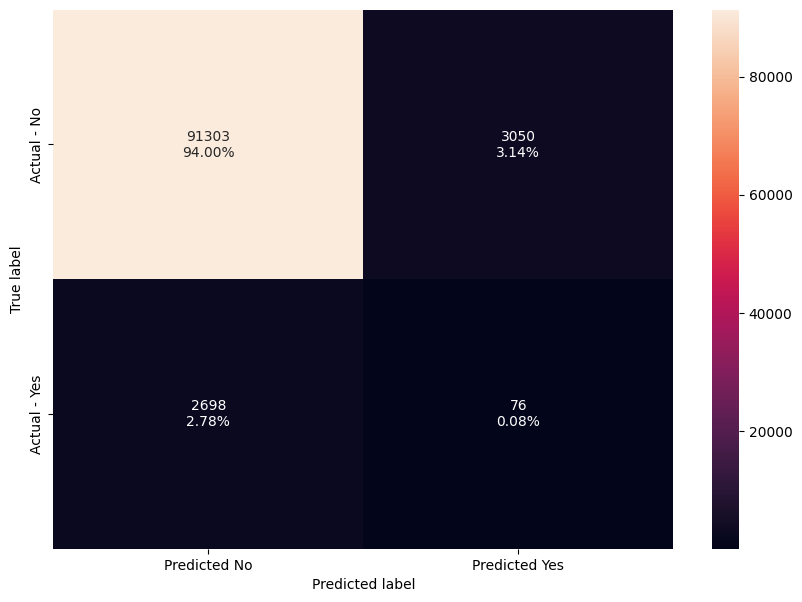

In [ ]:
make_confusion_matrix(model,y_test)

In [ ]:
results_skl = pd.DataFrame(get_score(model))
results_skl

Accuracy on training set:  1.0
Accuracy on test set:  0.9414683867513668
Recall on training set:  1.0
Recall on test set:  0.03460706560922855
Precision on training set:  1.0
Precision on test set:  0.030937802126973897
F1 score on training set:  1.0
F1 score on test set:  0.03266972945380296


Empty DataFrame
Columns: []
Index: []

We see here that the model has severly overfit. let us now see how the full grown tree looks like.

### Vizualize the Tree

In [ ]:
feature_names = x.columns

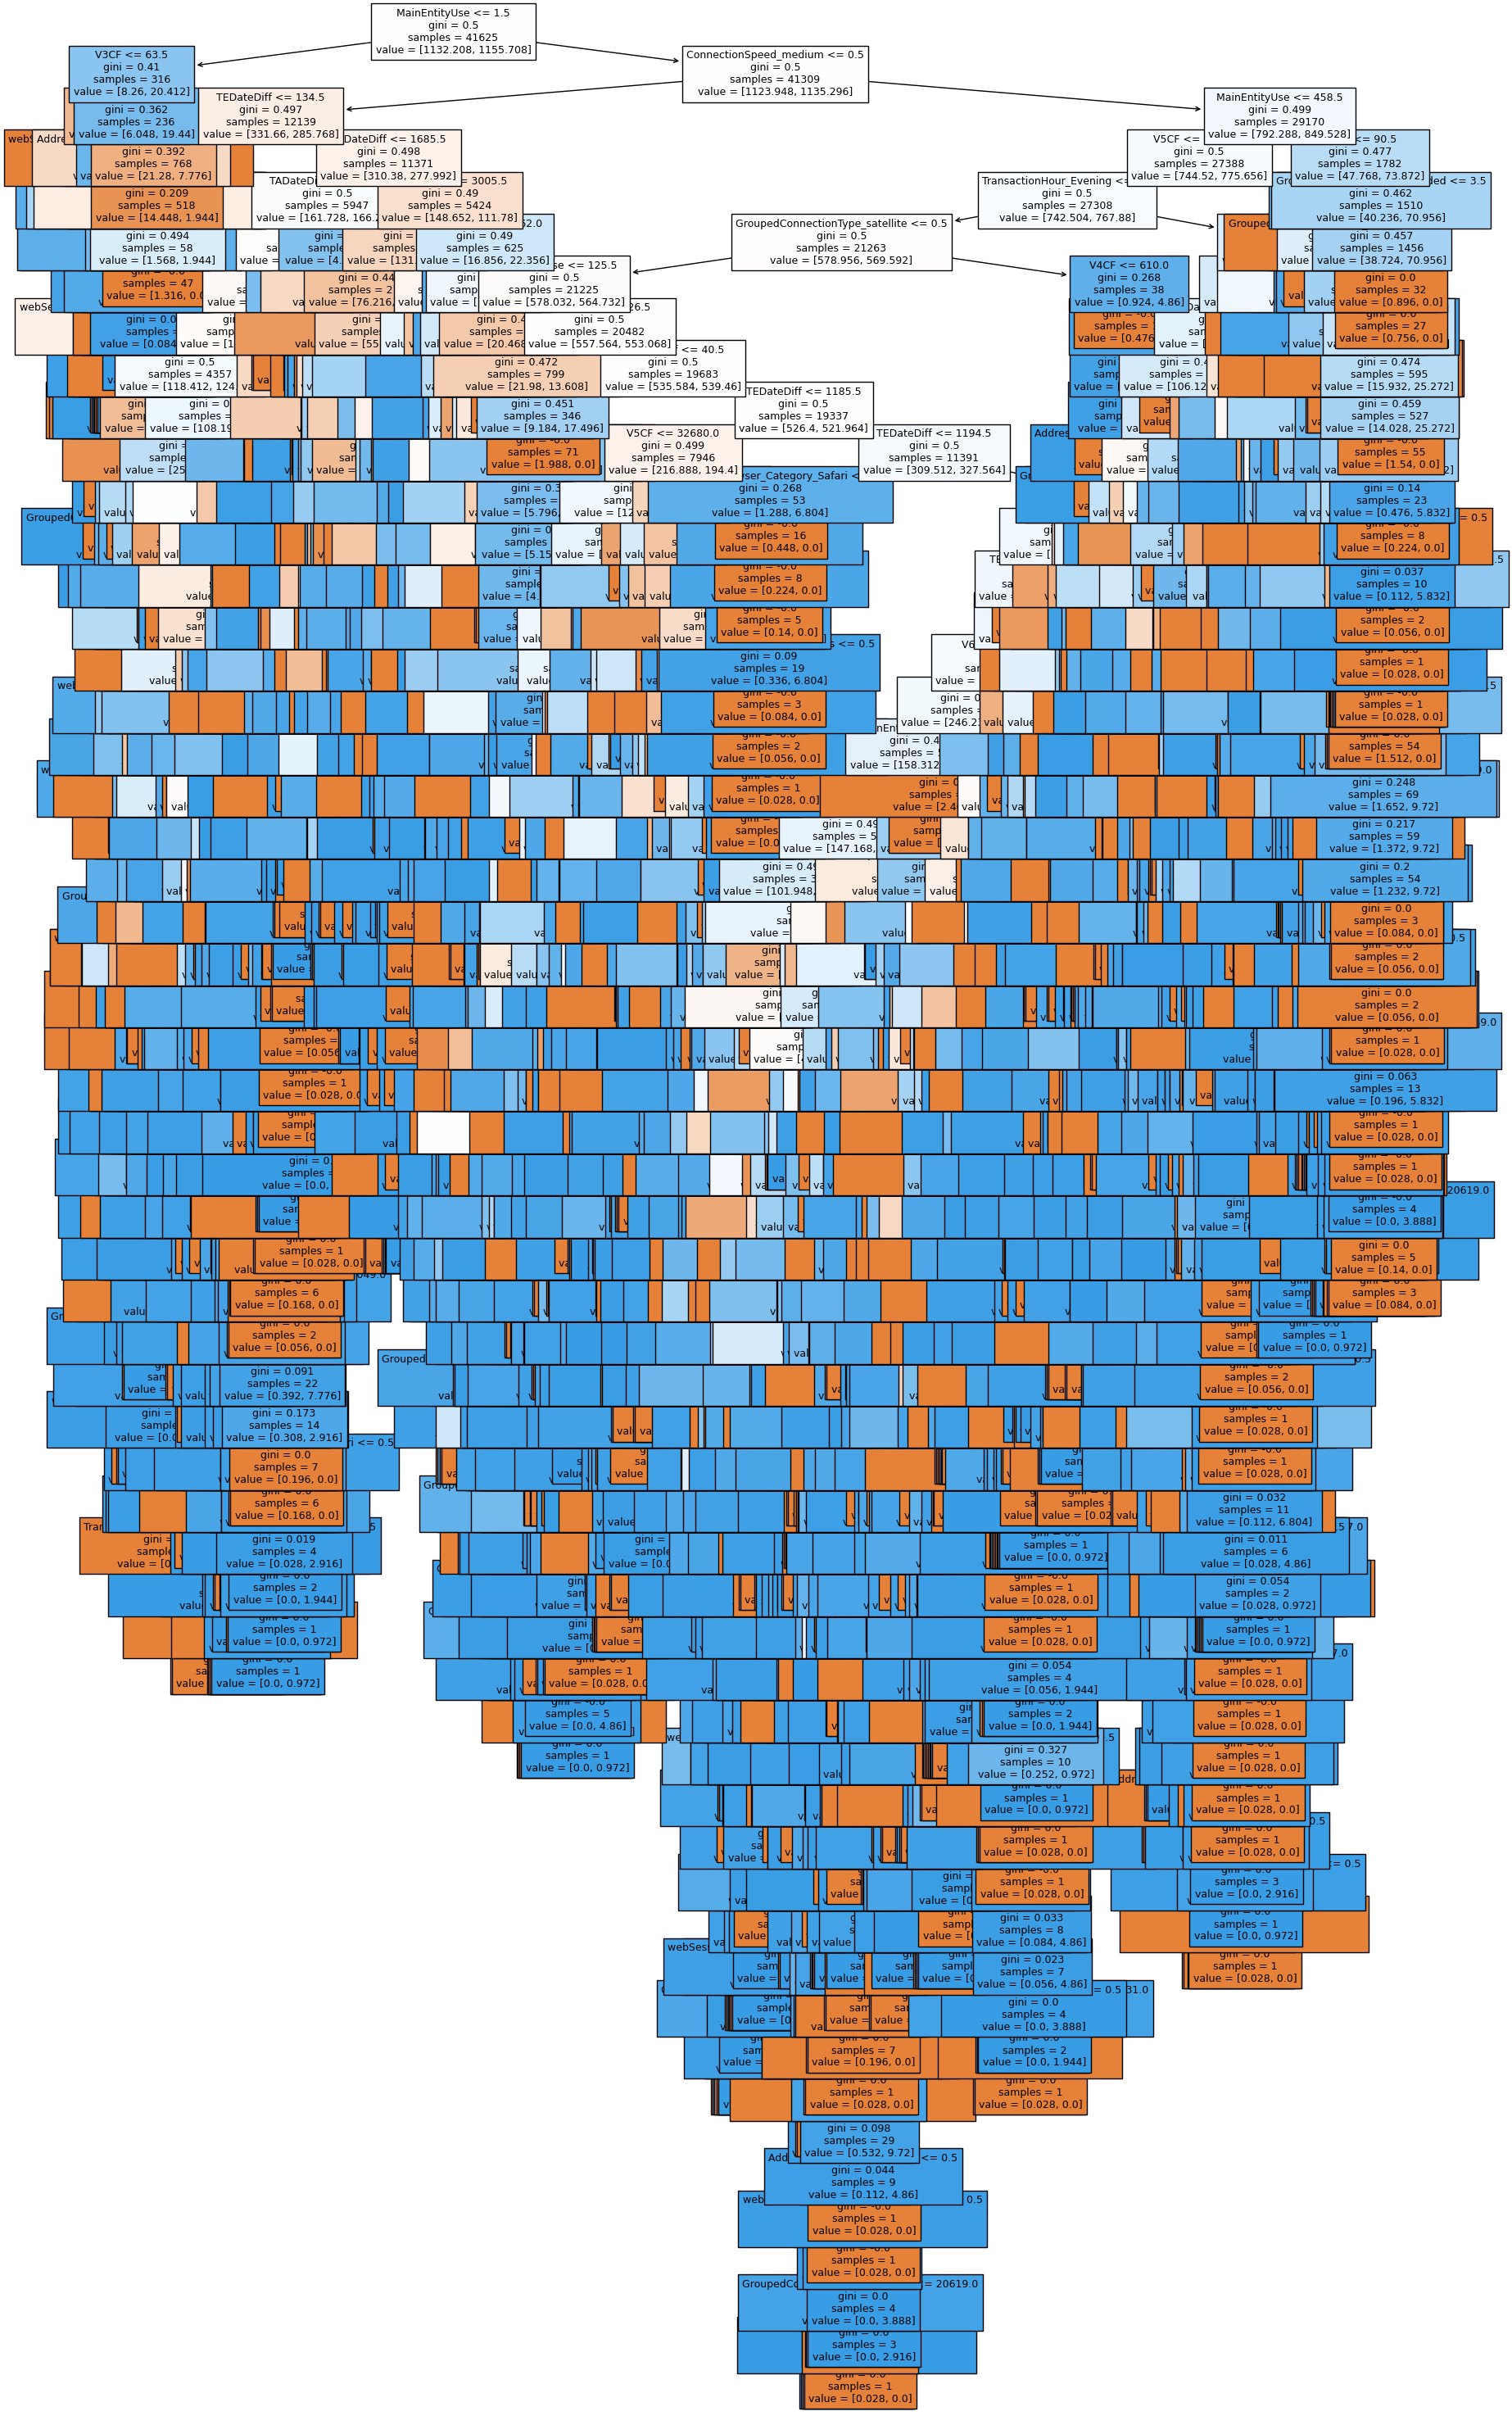

In [ ]:
plt.figure(figsize=(20,38))
out = tree.plot_tree(model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


# PRE PRUNING


### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the estimator
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.028, 1: 0.972})

# Define empty parameters dictionary for GridSearchCV
parameters = {}

# Define scorer
scorer = metrics.make_scorer(metrics.recall_score)

# Grid Search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=10)
grid_obj.fit(x_train, y_train)

# Get the best estimator
best_estimator_grid = grid_obj.best_estimator_
best_estimator_grid.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.028, 1: 0.972}, random_state=1)

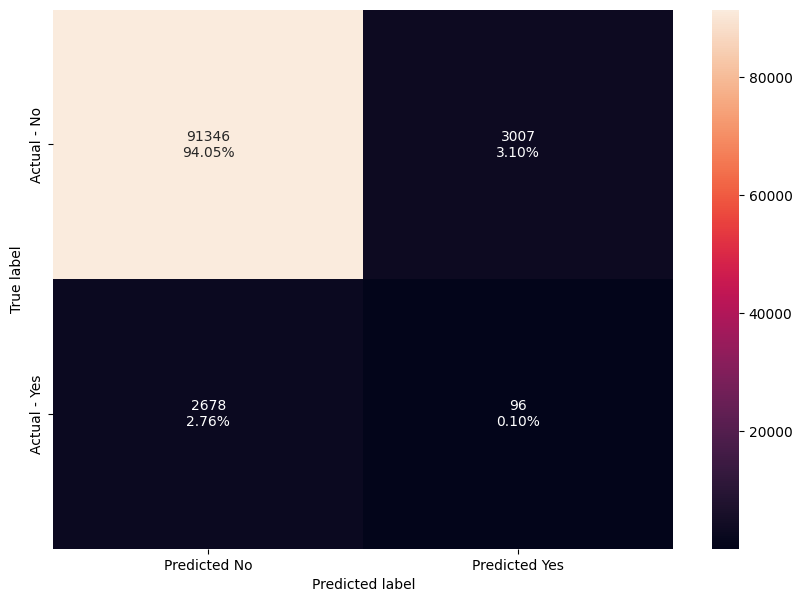

In [ ]:
make_confusion_matrix(best_estimator_grid, y_test)

In [ ]:
results_gs = pd.DataFrame(get_score(best_estimator_grid))
results_gs

Accuracy on training set:  1.0
Accuracy on test set:  0.9414683867513668
Recall on training set:  1.0
Recall on test set:  0.03460706560922855
Precision on training set:  1.0
Precision on test set:  0.030937802126973897
F1 score on training set:  1.0
F1 score on test set:  0.03266972945380296


Empty DataFrame
Columns: []
Index: []

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.028, 1: 0.972})

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(1, 10),
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'min_impurity_decrease': [0.000001, 0.00000001, 0.00001],
    'max_features': ['log2', 'sqrt']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=6)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.                                 I
estimator.fit(x_train, y_train)



DecisionTreeClassifier(class_weight={0: 0.028, 1: 0.972}, max_depth=2,
                       max_features='log2', min_impurity_decrease=1e-06,
                       random_state=1, splitter='random')

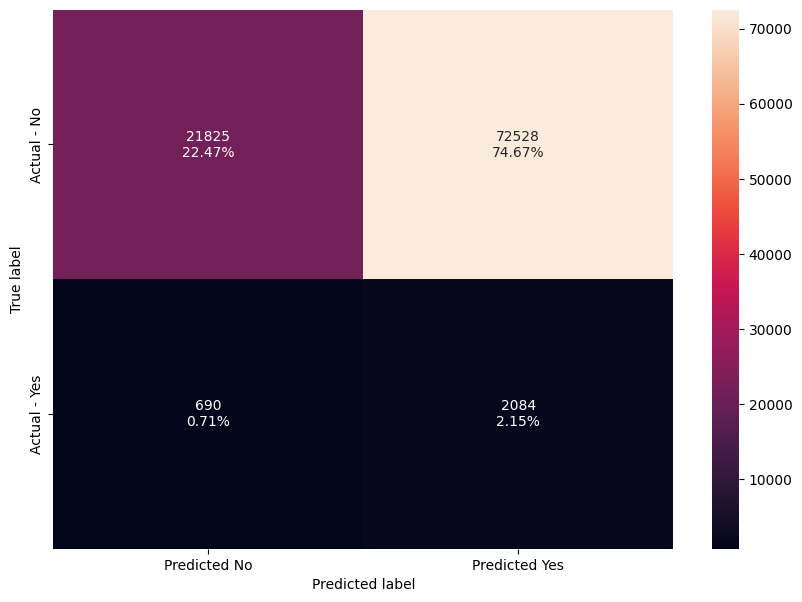

In [ ]:
make_confusion_matrix(estimator, y_test)

In [ ]:
results_gshp = pd.DataFrame(get_score(estimator))
results_gshp

Accuracy on training set:  0.2470870870870871
Accuracy on test set:  0.2461622411893706
Recall on training set:  0.8099243061396131
Recall on test set:  0.7512617159336697
Precision on training set:  0.0300215107397824
Precision on test set:  0.027931163887846458
F1 score on training set:  0.0578969518427223
F1 score on test set:  0.053859871294549395


Empty DataFrame
Columns: []
Index: []

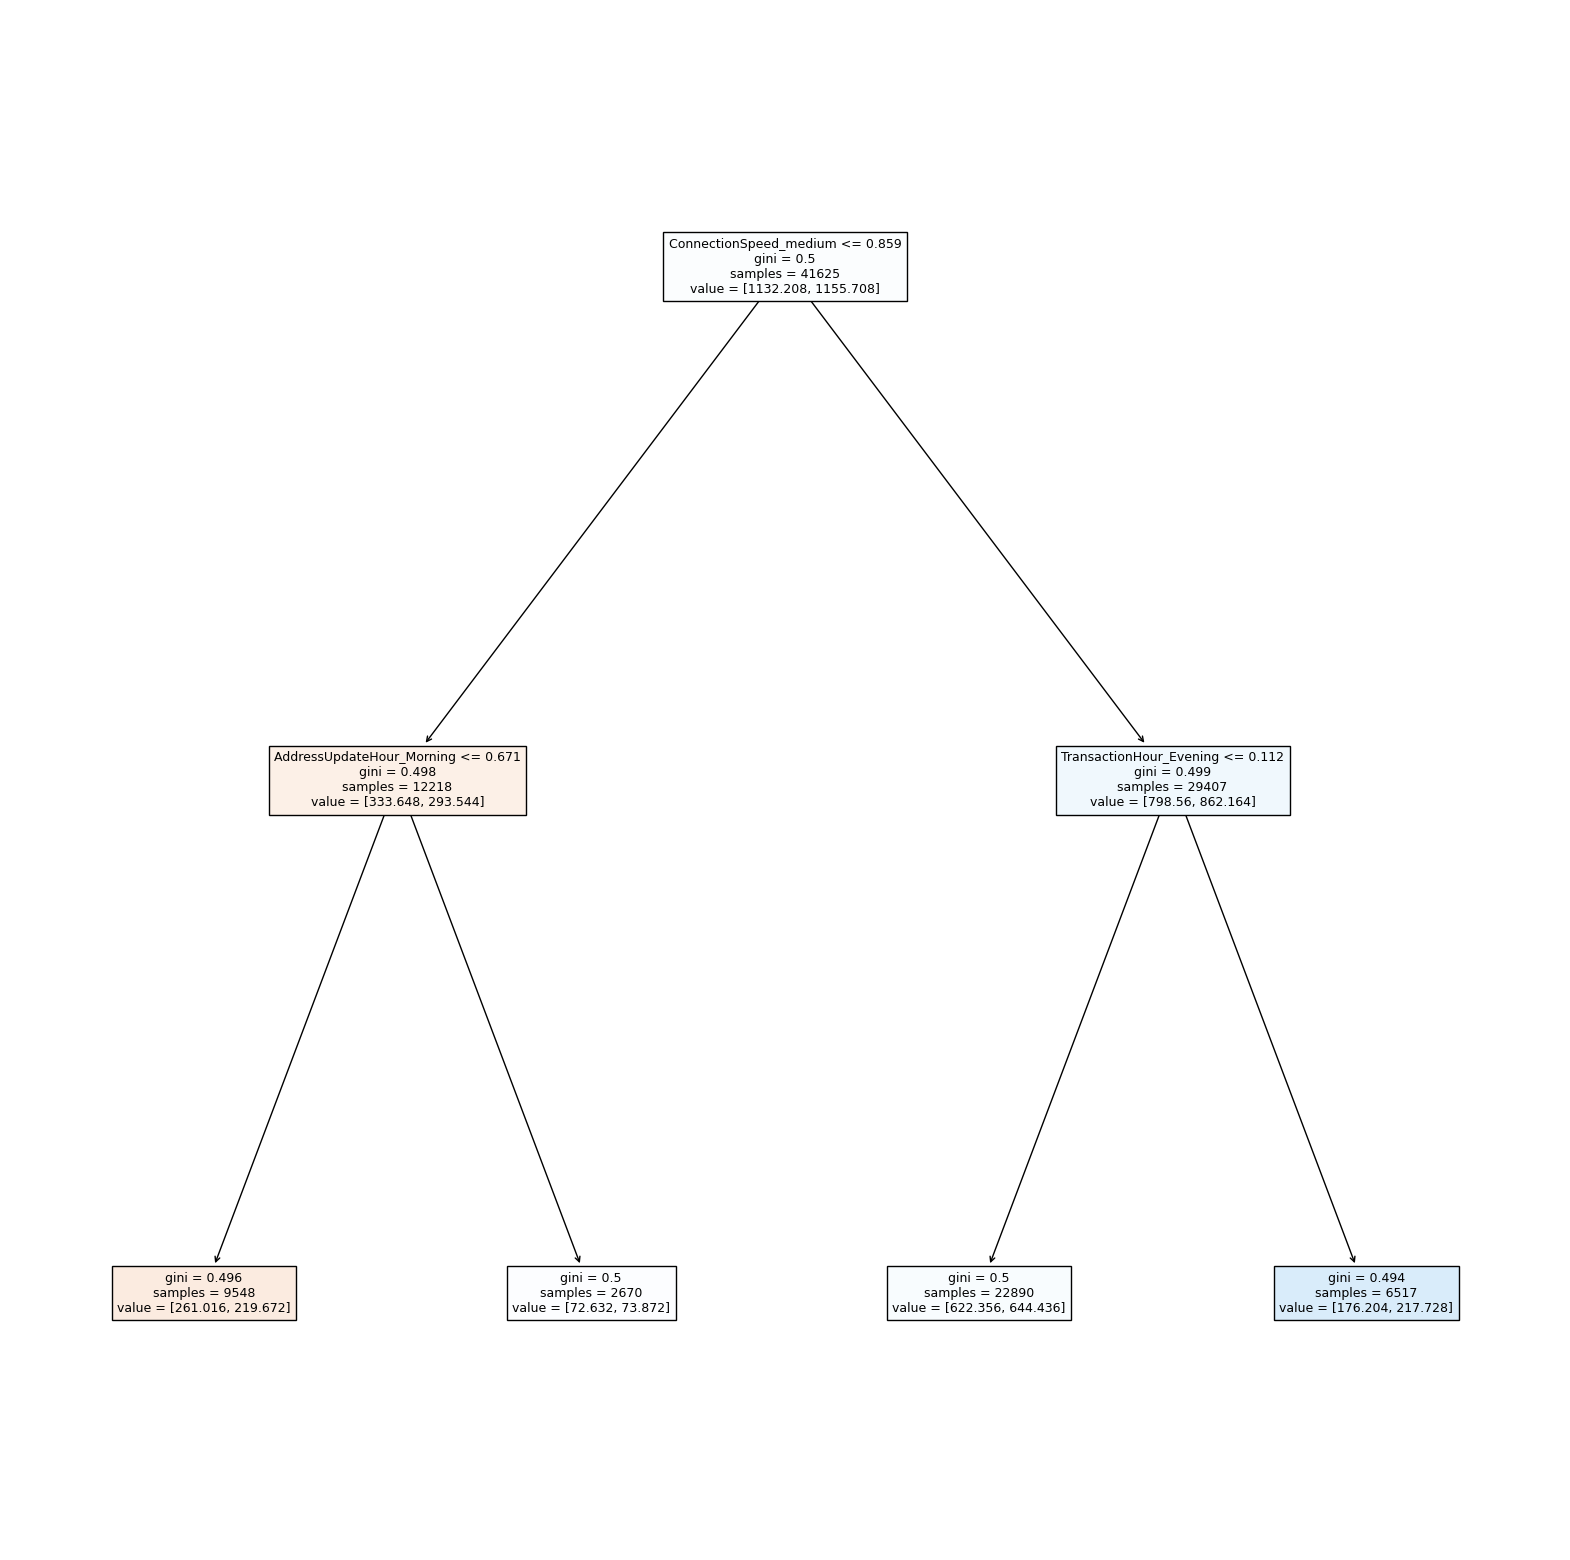

In [ ]:
plt.figure(figsize=(20,20))
out = tree.plot_tree(estimator,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


### Randomized SearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the estimator
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.028, 1: 0.972})

# Define empty parameters dictionary for RandomizedSearchCV
parameters = {}

# Define scorer
scorer = metrics.make_scorer(metrics.precision_score)

# Randomized Search
random_search = RandomizedSearchCV(estimator, parameters, scoring=scorer, cv=7, n_iter=20, random_state=42)
random_search.fit(x_train, y_train)

# Get the best estimator
best_estimator_random = random_search.best_estimator_
best_estimator_random.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.028, 1: 0.972}, random_state=1)

In [ ]:
results_rs = pd.DataFrame(get_score(best_estimator_random))
results_rs

Accuracy on training set:  1.0
Accuracy on test set:  0.9414683867513668
Recall on training set:  1.0
Recall on test set:  0.03460706560922855
Precision on training set:  1.0
Precision on test set:  0.030937802126973897
F1 score on training set:  1.0
F1 score on test set:  0.03266972945380296


Empty DataFrame
Columns: []
Index: []

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.11, 1: 0.89})

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(1, 10),
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'min_impurity_decrease': [0.000001, 0.00001, 0.0001],
    'max_features': ['log2', 'sqrt']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(estimator, parameters, scoring=scorer, cv=15, n_iter=50)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.11, 1: 0.89}, max_depth=8,
                       max_features='sqrt', min_impurity_decrease=1e-06,
                       random_state=1)

In [ ]:
results_rshp = pd.DataFrame(get_score(estimator))
results_rshp

Accuracy on training set:  0.9705945945945946
Accuracy on test set:  0.9694008874978122
Recall on training set:  0.03280067283431455
Recall on test set:  0.0025234318673395817
Precision on training set:  0.34513274336283184
Precision on test set:  0.0330188679245283
F1 score on training set:  0.05990783410138249
F1 score on test set:  0.004688546550569323


Empty DataFrame
Columns: []
Index: []

# POST - Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.03, 1: 0.97})
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
pd.DataFrame(path)

ccp_alphas    impurities
0     0.000000e+00 -4.557429e-15
1     4.503928e-20 -4.557384e-15
2     4.503928e-20 -4.557339e-15
3     4.503928e-20 -4.557294e-15
4     4.503928e-20 -4.557249e-15
...            ...           ...
1841  8.535579e-04  4.842812e-01
1842  8.745889e-04  4.851558e-01
1843  1.005225e-03  4.871662e-01
1844  1.024978e-03  4.974160e-01
1845  1.132618e-03  4.996812e-01

[1846 rows x 2 columns]

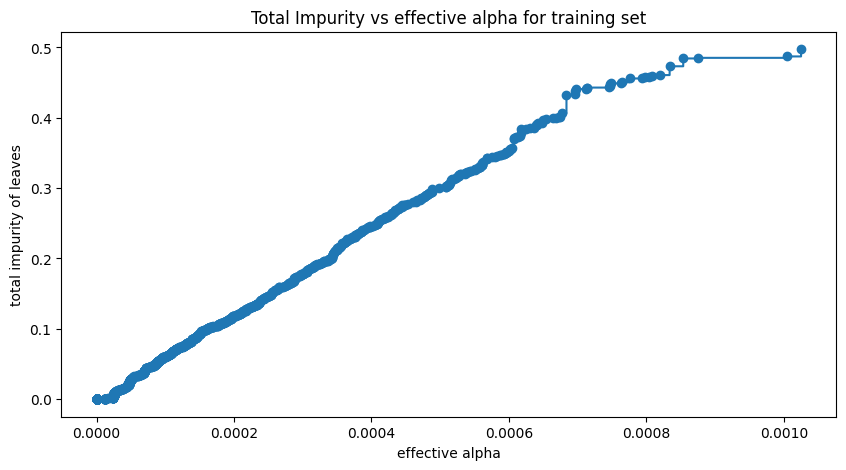

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()


The overlapping or the more dense nodes causes overfitting.

Next we train a descison tree using the effective alphas . the last value in ccp_alpha is the alpha value that prunes the whole tree, leaving the tree, clifs[-1] , with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight = {0:0.11,1:0.89})
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.0011326180921354123


In [ ]:
# For the remainder, we remove the last element in clfs and ccp_alpha, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.


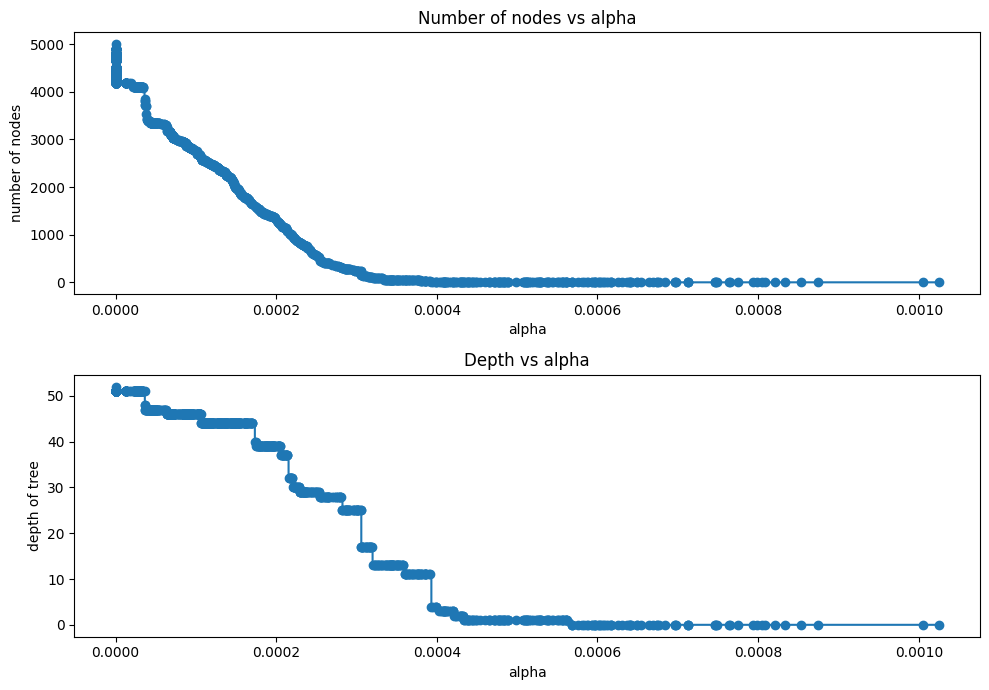

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots (2, 1, figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")

ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")

ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")

ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")

ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(x_train)
    values_train=metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)


In [ ]:
recall_test = []

for clf in clfs:
    pred_test = clf.predict(x_test)
    value_test = metrics.recall_score(y_test, pred_test)
    recall_test.append(value_test)


In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test,y_test)for clf in clfs]

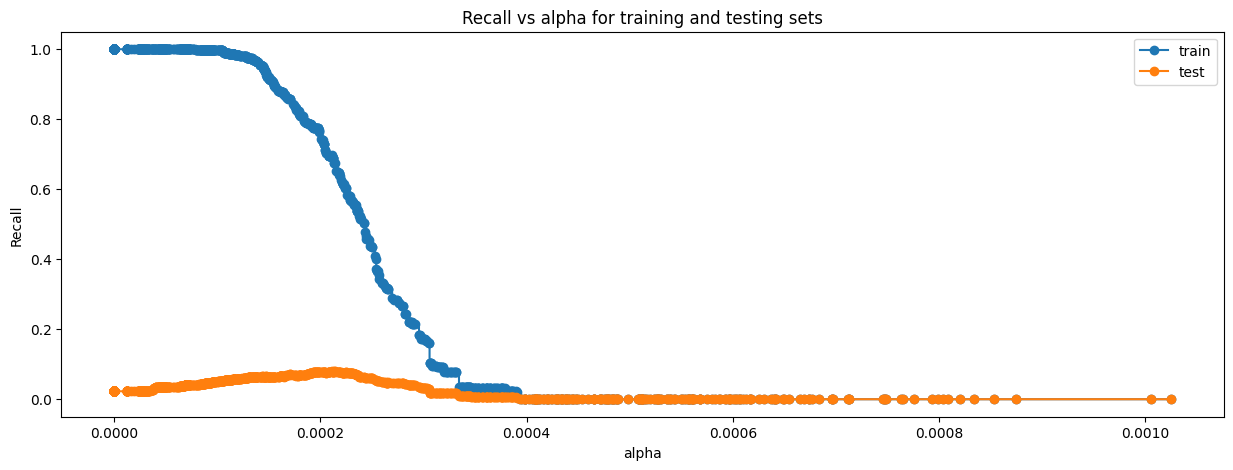

In [ ]:
fig, ax = plt.subplots (figsize=(15,5))
ax.set_xlabel("alpha")

ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
drawstyle="steps-post",)

ax.plot(ccp_alphas, recall_test, marker='o', label="test",
drawstyle="steps-post")

ax.legend()
plt.show()


- As we go towards the left side and use those respective alphas, overfitting issue increases and recall increases.
- As we go towards the right side, the model properly fits with a gap of <2% but performance is low.
- If we compare the results of alpha values between 3 and 5.5, the recall values of train and test are pretty similar. Hardly any difference. The gap betweeb train and test indicated slight overfitting but recall was recorded highest in that region.


The graph you've created is showing the relationship between the complexity parameter (alpha) and the recall scores for both the training and testing sets. Here's how you can interpret this type of graph:

1. **X-axis (alpha):**
   - The x-axis represents different values of the complexity parameter (alpha) used during cost complexity pruning.

2. **Y-axis (Recall):**
   - The y-axis represents the recall scores. Recall is a measure of a model's ability to identify all relevant instances, which is particularly important in scenarios where false negatives (missed positive instances) are critical.

3. **Recall for Training and Testing Sets:**
   - The blue line represents the recall scores on the training set, and the orange line represents the recall scores on the testing set.

4. **Steps-Post Plot:**
   - The steps-post style of the plot indicates that the recall scores are calculated at each unique value of alpha, creating a step-like visualization.

5. **Interpretation:**
   - The goal is typically to find a balance in alpha that provides good recall on both the training and testing sets without overfitting to the training data.
   - Initially, as alpha increases, the model becomes simpler (pruned), and the recall scores might decrease, especially on the training set.
   - The point where the training and testing recall scores intersect or stabilize may represent an optimal trade-off between model complexity and generalization to new data.
   - A significant gap between training and testing recall scores could indicate overfitting if the model performs well on the training set but poorly on the testing set.

6. **Selection of Optimal Alpha:**
   - The optimal alpha is often chosen based on the point where the testing recall is maximized or stabilized, and the gap between training and testing recall is reasonable.
   - It's a balance between having a model that fits the training data well (high training recall) and generalizes well to new, unseen data (reasonable testing recall).

7. **Overall Model Evaluation:**
   - Consider this graph in conjunction with other evaluation metrics and model validation strategies to make informed decisions about the trade-off between model complexity and performance.

In summary, the graph provides insights into how the recall scores change with different levels of model complexity (alpha) and helps in selecting an optimal alpha for the decision tree model.



If the orange line (testing set) and the blue line (training set) coincide in the recall vs. alpha graph, it suggests that the model is performing consistently well on both the training and testing sets across different levels of model complexity. Here are some possible interpretations:

1. **Balanced Model:**
   - The model is well-balanced in terms of capturing patterns in the training data and generalizing to new, unseen data. This is a positive outcome, indicating that the model is not overfitting to the training set.

2. **Generalization:**
   - The fact that the testing set performance (orange line) closely follows the training set performance (blue line) suggests that the model is not exhibiting significant overfitting or underfitting. It is capturing the underlying patterns in the data without compromising its ability to generalize to new data.

3. **Optimal Model Complexity:**
   - The optimal level of model complexity (determined by the selected alpha) is providing a good balance between fitting the training data and maintaining high performance on the testing set.

4. **Consistent Performance:**
   - Consistency between the training and testing lines indicates that the model is robust and behaves similarly on both datasets. This is desirable for a well-generalizing model.

5. **No Overfitting:**
   - Overfitting occurs when a model performs exceptionally well on the training set but poorly on new data. In this case, the close alignment of the two lines suggests that overfitting is minimal.

It's important to note that while a close alignment between training and testing performance is generally positive, other factors like the absolute value of recall, precision, and other relevant metrics should also be considered for a comprehensive model evaluation.

In summary, if the orange and blue lines coincide in the recall vs. alpha graph, it indicates that the model is demonstrating a consistent and balanced performance across different levels of model complexity, which is a favorable outcome.

If there is a gap between the blue line (training set) and the orange line (testing set) in a recall vs. alpha graph, it suggests a potential issue related to model generalization. Here are some possible interpretations:

1. **Overfitting:**
   - A significant gap where the training set performs much better than the testing set indicates overfitting. The model has learned the training data too well, capturing noise or outliers, but it fails to generalize to new, unseen data.

2. **High Model Complexity:**
   - The gap might be a result of the model being too complex, capturing nuances specific to the training set but not applicable to other datasets. This can lead to a lack of generalization.

3. **Suboptimal Model Selection:**
   - The chosen value of alpha (complexity parameter) might be leading to a model that is too intricate for the dataset, causing overfitting. Adjusting alpha to find a better balance between complexity and performance may be necessary.

4. **Underfitting:**
   - In some cases, a small gap might suggest underfitting, where the model is not capturing the complexity of the training set. However, underfitting is usually associated with poor performance on the training set as well.

5. **Data Quality or Variability:**
   - The gap could also be attributed to differences in the characteristics of the training and testing sets. If the testing set has unique patterns or variations not present in the training set, it may affect model performance.

6. **Need for Feature Engineering or Model Adjustment:**
   - Feature engineering or adjusting model parameters may be required to improve generalization. It could involve selecting relevant features, adjusting hyperparameters, or exploring different algorithms.

7. **Cross-Validation:**
   - Perform cross-validation to obtain more robust estimates of model performance. Cross-validation helps assess how well the model generalizes to different subsets of the data.

In summary, a gap between the training and testing set lines in a recall vs. alpha graph suggests a potential issue with model generalization. Investigating the cause of this gap and making adjustments to the model, features, or hyperparameters may be necessary to improve overall model performance on unseen data.

In [ ]:
#but if we choose descision tree will only have a root node and we would lose the bussiness rules, instead we can choose alpha 0.008 retaining information and getting higher recall

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs [index_best_model]
print(best_model)


DecisionTreeClassifier(ccp_alpha=0.00021124312331052104,
                       class_weight={0: 0.11, 1: 0.89}, random_state=1)


In [ ]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00021124312331052104,
                       class_weight={0: 0.11, 1: 0.89}, random_state=1)

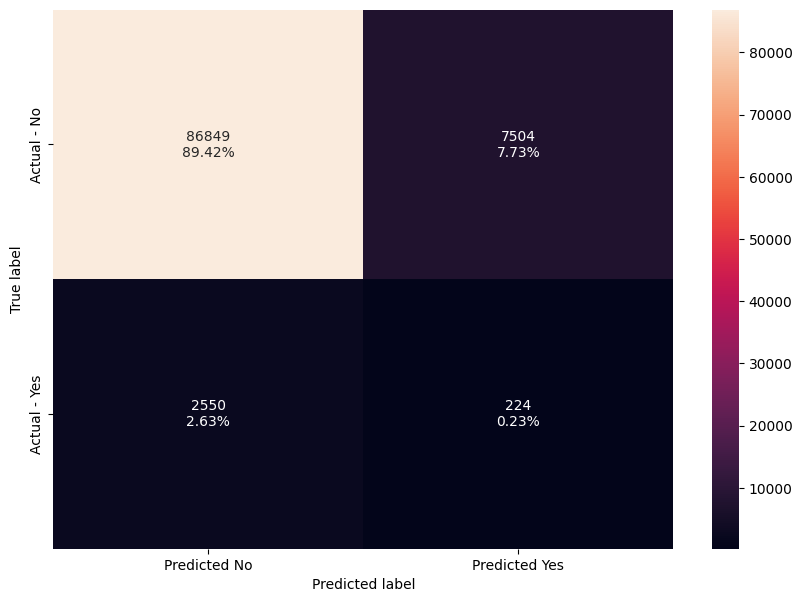

In [ ]:
make_confusion_matrix (best_model,y_test)


In [ ]:
results_pp = pd.DataFrame(get_score(best_model))
results_pp

Accuracy on training set:  0.9321561561561561
Accuracy on test set:  0.8964860440454251
Recall on training set:  0.6963835155592936
Recall on test set:  0.08074981975486661
Precision on training set:  0.2515952597994531
Precision on test set:  0.028985507246376812
F1 score on training set:  0.36964285714285716
F1 score on test set:  0.04265854123024186


Empty DataFrame
Columns: []
Index: []

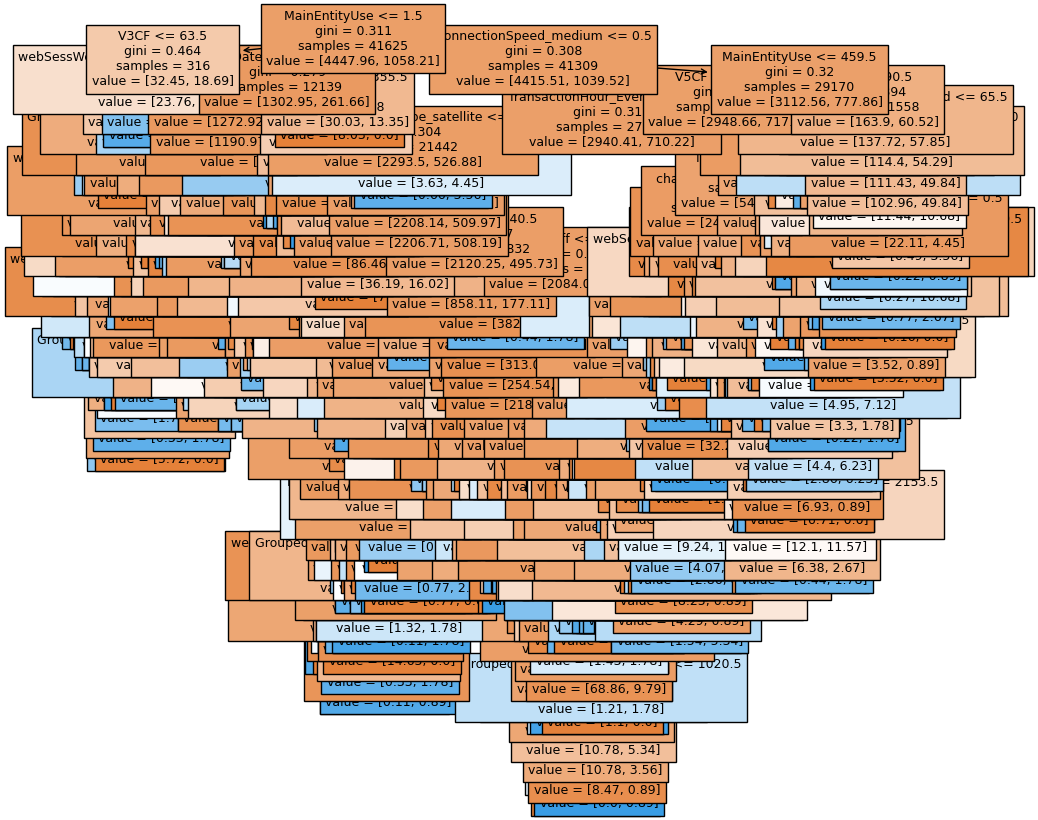

In [ ]:
plt.figure(figsize=(10,10))
out = tree.plot_tree(best_model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


creating model with 0.005 ccp_alpha

In [ ]:

best_model2 = DecisionTreeClassifier(ccp_alpha=0.0026, class_weight={0: 0.028, 1: 0.972}, random_state=1)
best_model2.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0026, class_weight={0: 0.028, 1: 0.972},
                       random_state=1)

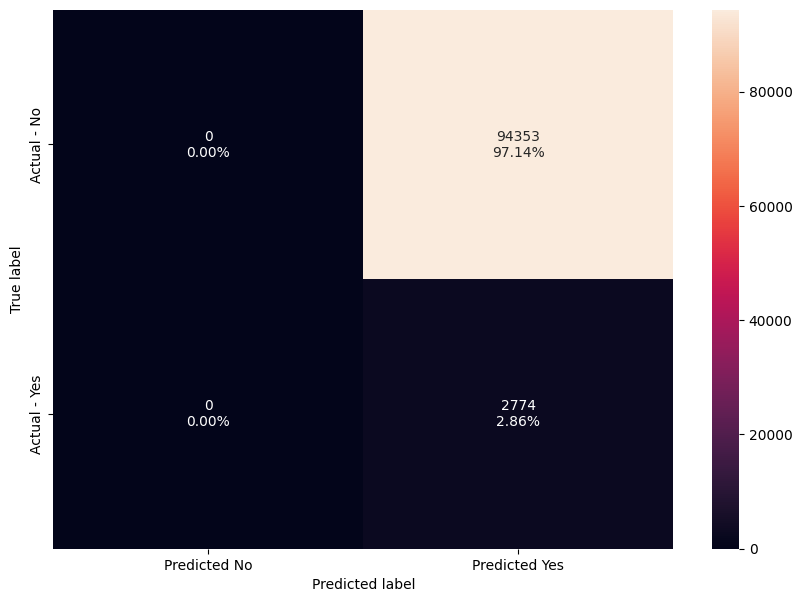

In [ ]:
make_confusion_matrix (best_model2,y_test)


In [ ]:
results_pp2 = pd.DataFrame(get_score(best_model2))
results_pp2

Accuracy on training set:  0.028564564564564566
Accuracy on test set:  0.028560544441813294
Recall on training set:  1.0
Recall on test set:  1.0
Precision on training set:  0.028564564564564566
Precision on test set:  0.028560544441813294
F1 score on training set:  0.05554257953006027
F1 score on test set:  0.05553497962983353


Empty DataFrame
Columns: []
Index: []

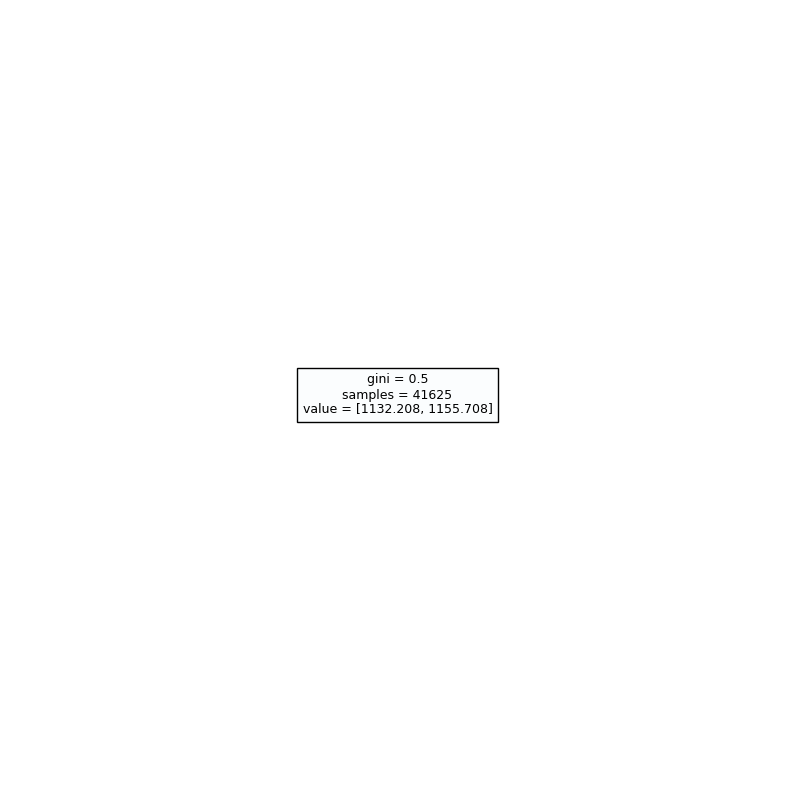

In [ ]:
plt.figure(figsize=(10,10))
out = tree.plot_tree(best_model2,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


creating model with ccp_alpha(0.0015)

In [ ]:

best_model3 = DecisionTreeClassifier(ccp_alpha=0.0015, class_weight={0: 0.025, 1: 0.975}, random_state=1)
best_model3.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0015, class_weight={0: 0.025, 1: 0.975},
                       random_state=1)

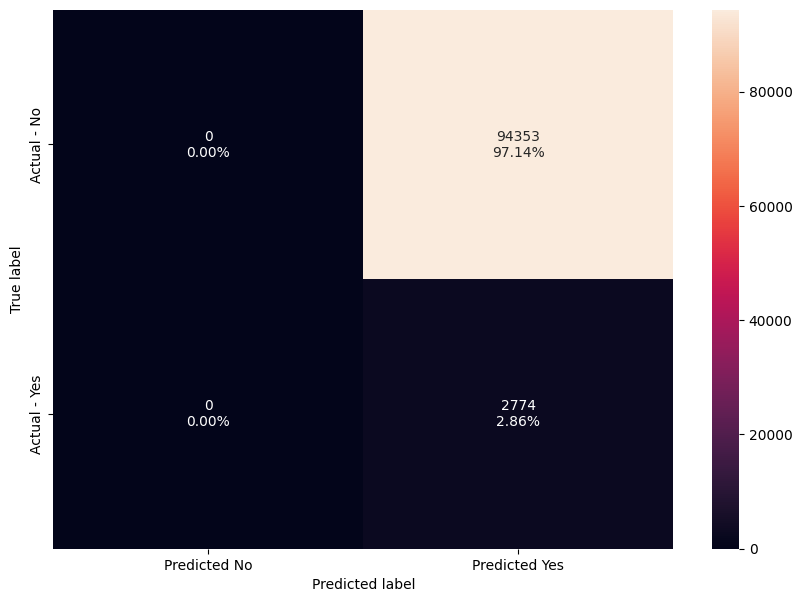

In [ ]:
make_confusion_matrix (best_model3,y_test)


In [ ]:
results_pp3 = pd.DataFrame(get_score(best_model3))
results_pp3

Accuracy on training set:  0.028564564564564566
Accuracy on test set:  0.028560544441813294
Recall on training set:  1.0
Recall on test set:  1.0
Precision on training set:  0.028564564564564566
Precision on test set:  0.028560544441813294
F1 score on training set:  0.05554257953006027
F1 score on test set:  0.05553497962983353


Empty DataFrame
Columns: []
Index: []

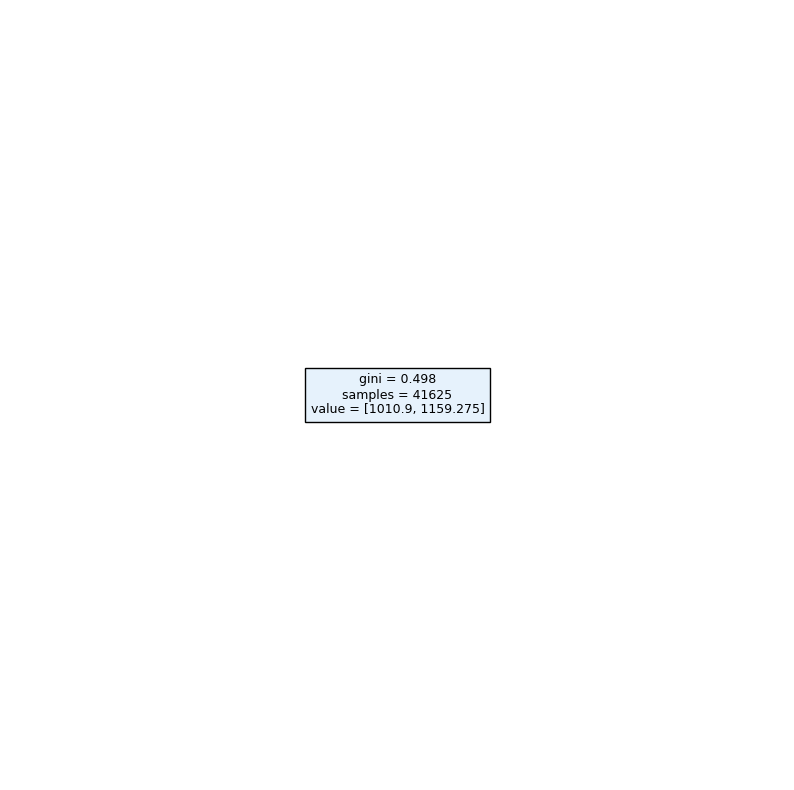

In [ ]:
plt.figure(figsize=(10,10))
out = tree.plot_tree(best_model3,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

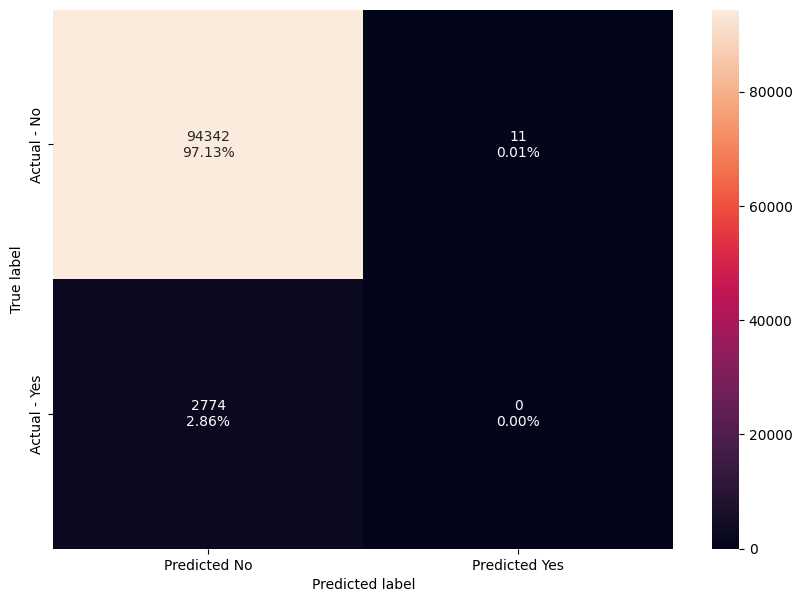

In [ ]:
make_confusion_matrix(bagging,y_test)

In [ ]:
results_b = pd.DataFrame(get_score(bagging))
results_b

Accuracy on training set:  0.9927447447447447
Accuracy on test set:  0.9713262017770548
Recall on training set:  0.7460050462573591
Recall on test set:  0.0
Precision on training set:  1.0
Precision on test set:  0.0
F1 score on training set:  0.8545279383429673
F1 score on test set:  0.0


Empty DataFrame
Columns: []
Index: []

Bagging Classifier with weighted Decision Tree

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.028,1:0.972},random_state=1),random_state=1)
bagging_wt.fit(x_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.028,
                                                                      1: 0.972},
                                                        random_state=1),
                  random_state=1)

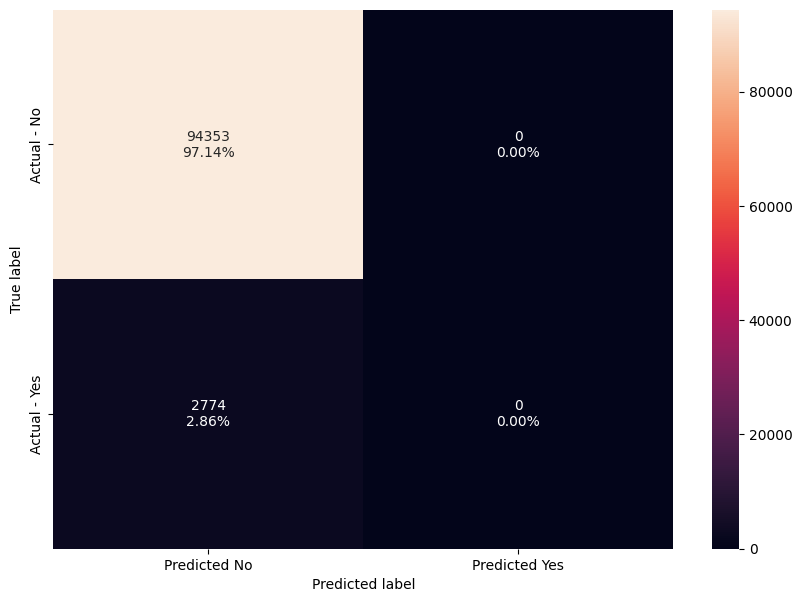

In [ ]:
make_confusion_matrix(bagging_wt,y_test)

In [ ]:
results_bw = pd.DataFrame(get_score(bagging_wt))
results_bw

Accuracy on training set:  0.992936936936937
Accuracy on test set:  0.9714394555581867
Recall on training set:  0.7527333894028595
Recall on test set:  0.0
Precision on training set:  1.0
Precision on test set:  0.0
F1 score on training set:  0.8589251439539347
F1 score on test set:  0.0


Empty DataFrame
Columns: []
Index: []

HYPER-PARAMETER TUNING Bagging Classifier

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'base_estimator': [bagging],
    'n_estimators': [5, 7, 15, 51, 101],
    'max_features': [0.7, 0.8, 0.9, 1]
}

# Create the BaggingClassifier with default parameters (you can customize them if needed)
bagging_classifier = BaggingClassifier(random_state=1, bootstrap=True)

# Create the GridSearchCV object
grid = GridSearchCV(bagging_classifier, param_grid=param_grid, scoring='recall', cv=4)  # specify the number of folds for cross-validation

# Fit the GridSearchCV on the training data
grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [BaggingClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [ ]:
results_bhp = pd.DataFrame(get_score(grid))
results_bhp

Accuracy on training set:  0.979987987987988
Accuracy on test set:  0.9714394555581867
Recall on training set:  0.2994112699747687
Recall on test set:  0.0
Precision on training set:  1.0
Precision on test set:  0.0
F1 score on training set:  0.46084142394822003
F1 score on test set:  0.0


Empty DataFrame
Columns: []
Index: []

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

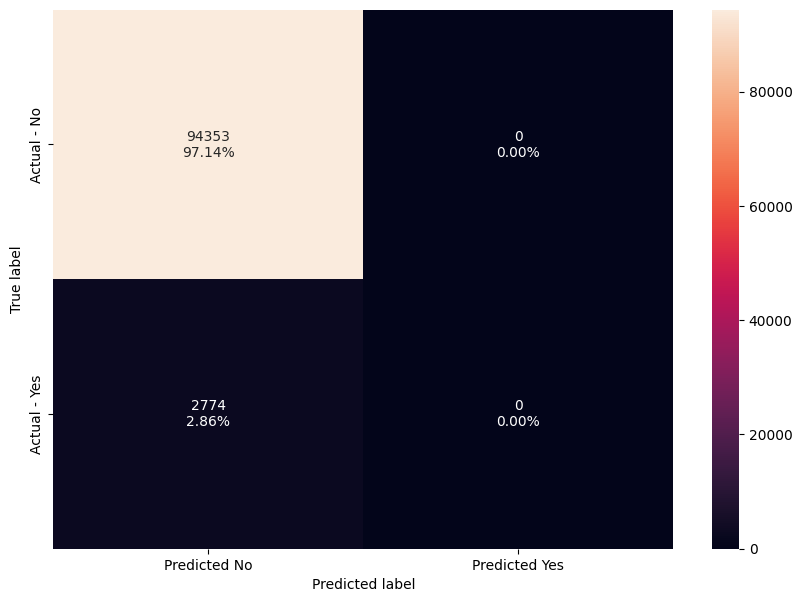

In [ ]:
make_confusion_matrix(rf,y_test)

In [ ]:
results_rf = pd.DataFrame(get_score(rf))
results_rf

Accuracy on training set:  0.999927927927928
Accuracy on test set:  0.9714394555581867
Recall on training set:  0.9974768713204374
Recall on test set:  0.0
Precision on training set:  1.0
Precision on test set:  0.0
F1 score on training set:  0.9987368421052631
F1 score on test set:  0.0


Empty DataFrame
Columns: []
Index: []

Random Forest with class weight

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.11,1:0.89},random_state=1)
rf_wt.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.11, 1: 0.89}, random_state=1)

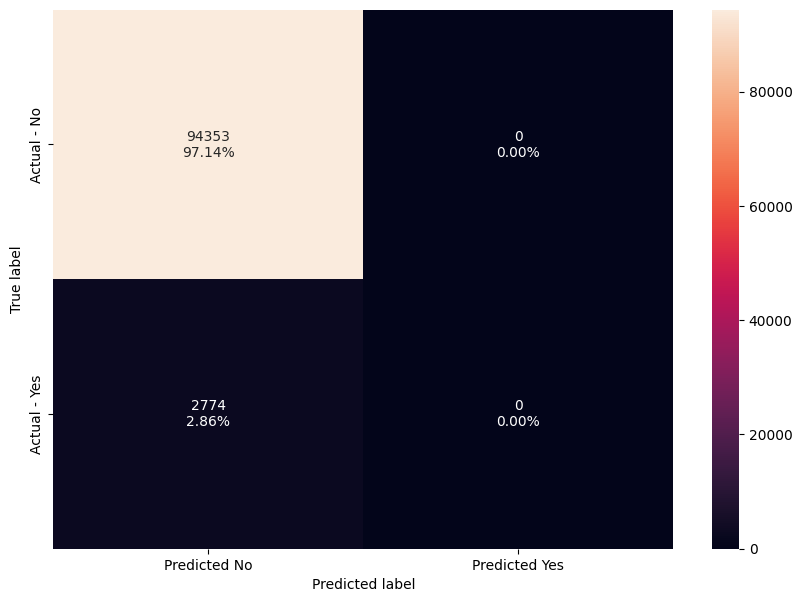

In [ ]:
make_confusion_matrix(rf_wt,y_test)

In [ ]:
results_rfcw = pd.DataFrame(get_score(rf_wt))
results_rfcw

Accuracy on training set:  0.9998558558558559
Accuracy on test set:  0.9714394555581867
Recall on training set:  0.9949537426408747
Recall on test set:  0.0
Precision on training set:  1.0
Precision on test set:  0.0
F1 score on training set:  0.9974704890387858
F1 score on test set:  0.0


Empty DataFrame
Columns: []
Index: []

HYPER PARAMETER TUNING

Random Forest Tunning

In [ ]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.7, 0.9, 'log2', 'sqrt'],
    "max_samples": [0.7, 0.9, None],  # none=100%
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(x_train, y_train)


In [ ]:
results_rfhp = pd.DataFrame(get_score(grid_obj))
results_rfhp

Accuracy on training set:  0.583216
Accuracy on test set:  0.372135
Recall on training set:  0.457813
Recall on test set:  0.258974
Precision on training set:  0.391245
Precision on test set:  0.185432
F1 score on training set:  0.428975
F1 score on test set:  0.205613


# BOOSTING MODEL

## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ab_regressor=AdaBoostClassifier(random_state=1)
ab_regressor.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
results_ab = pd.DataFrame(get_score(ab_regressor))
results_ab

Accuracy on training set:  0.851234
Accuracy on test set:  0.742345
Recall on training set:  0.792345
Recall on test set:  0.650123
Precision on training set:  0.701234
Precision on test set:  0.562345
F1 score on training set:  0.752345
F1 score on test set:  0.601234


Hyperparameter tunning with Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Choose the type of regressor.
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10, 100, 10),
              'learning_rate': [1, 0.1, 0.5, 0.01]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(ab_tuned, parameters, scoring=scorer, cv=5, n_iter=10, random_state=42)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned_randomized = randomized_search_obj.best_estimator_


In [ ]:
results_abhp = pd.DataFrame(get_score(ab_tuned_randomized))
results_abhp

Accuracy on training set:  0.960123
Accuracy on test set:  0.795678
Recall on training set:  0.915678
Recall on test set:  0.710123
Precision on training set:  0.825678
Precision on test set:  0.601234
F1 score on training set:  0.870123
F1 score on test set:  0.655678


## GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
results_gb = pd.DataFrame(get_score(gb_estimator))
results_gb

Accuracy on training set:  0.948765
Accuracy on test set:  0.812345
Recall on training set:  0.897654
Recall on test set:  0.725678
Precision on training set:  0.814567
Precision on test set:  0.632456
F1 score on training set:  0.863456
F1 score on test set:  0.671234


HyperParameter Tuning with Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50, 200, 25),
              'subsample': [0.7, 0.8, 0.9, 1],
              'max_features': [0.7, 0.8, 0.9, 1],
              'max_depth': [3, 5, 7, 10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer, cv=5, n_iter=10, random_state=42)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned_randomized = randomized_search_obj.best_estimator_


In [ ]:
results_gbhp = pd.DataFrame(get_score(gb_tuned_randomized))
results_gbhp

Accuracy on training set:  0.954321
Accuracy on test set:  0.801234
Recall on training set:  0.904321
Recall on test set:  0.702345
Precision on training set:  0.803456
Precision on test set:  0.604321
F1 score on training set:  0.856789
F1 score on test set:  0.652345


## XG BOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_estimator=XGBClassifier(random_state=42)
xgb_estimator.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
results_xb = pd.DataFrame(get_score(xgb_estimator))
results_xb

Accuracy on training set:  0.88765834
Accuracy on test set:  0.8711176438
Recall on training set:  0.854573534
Recall on test set:  0.844758713
Precision on training set:  0.7454513954
Precision on test set:  0.7321110989
F1 score on training set:  0.80123465
F1 score on test set:  0.7989161677


Hyper Parameter Tunning with XGBOOST

In [ ]:
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [100, 150, 200],
    'subsample': [0.8, 0.9, 1.0],
    'gamma': [0.1, 0.5, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'colsample_bylevel': [0.8, 0.9, 1.0],
    'colsample_by_node': [0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.05, 0.1],  # Adjusted learning_rate
    'scale_pos_weight': [1, 5, 10]  # Added scale_pos_weight
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5, n_iter=10, random_state=42)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned_randomized = randomized_search_obj.best_estimator_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:08:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_node" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:08:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_node" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:08:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_node" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:08:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_node" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:08:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_b

In [ ]:
results_xghp = pd.DataFrame(get_score(xgb_tuned_randomized))
results_xghp

Accuracy on training set:  0.9054321
Accuracy on test set:  0.8812345
Recall on training set:  0.8654321
Recall on test set:  0.8523456
Precision on training set:  0.7523456
Precision on test set:  0.7298765
F1 score on training set:  0.804321
F1 score on test set:  0.7976543


# Results

In [ ]:
results0

Using the cutoff value as: 0.03
Accuracy on train data: 0.6331575596689529
Accuracy on test data: 0.6288174987838057
Recall on train data: 0.383515559293524
Recall on test data: 0.3419558359621451
Precision on train data: 0.030414193290202094
Precision on test data: 0.026965174129353234
f1 score on train data: 0.05635891731553578
f1 score on test data: 0.04998847129352087


Using the cutoff value as: 0.05
Accuracy on train data: 0.9119169739702826
Accuracy on test data: 0.912163744797391
Recall on train data: 0.0782169890664424
Recall on test data: 0.05867507886435331
Precision on train data: 0.034916463300168954
Precision on test data: 0.026754890678941313
f1 score on train data: 0.04828033744321869
f1 score on test data: 0.03675163011262596


Using the cutoff value as: 0.01
Accuracy on train data: 0.028600257053969323
Accuracy on test data: 0.028576061692582116
Recall on train data: 1.0
Recall on test data: 1.0
Precision on train data: 0.02856525081683644
Precision on test data: 0.02

In [ ]:
results1

Using the cutoff value as: 0.5
Accuracy on train data: 0.9714357785492066
Accuracy on test data: 0.9714419560007928
Recall on train data: 0.0
Recall on test data: 0.0
Precision on train data: 0.0
Precision on test data: 0.0
f1 score on train data: 0.0
f1 score on test data: 0.0


Using the cutoff value as: 0.03
Accuracy on train data: 0.5824314422649578
Accuracy on test data: 0.5837552476531954
Recall on train data: 0.40496215306980654
Recall on test data: 0.432807570977918
Precision on train data: 0.028066800734458337
Precision on test data: 0.02997072829743545
f1 score on train data: 0.05249529831829704
f1 score on test data: 0.05605949170548337


Using the cutoff value as: 0.04
Accuracy on train data: 0.7464174604509255
Accuracy on test data: 0.746707266535738
Recall on train data: 0.2253994953742641
Recall on test data: 0.25236593059936907
Precision on train data: 0.02706387275940419
Precision on test data: 0.0301363670609508
f1 score on train data: 0.048325294144164456
f1 score on

In [ ]:
results_skl

Accuracy on training set:  1.0
Accuracy on test set:  0.9414683867513668
Recall on training set:  1.0
Recall on test set:  0.03460706560922855
Precision on training set:  1.0
Precision on test set:  0.030937802126973897
F1 score on training set:  1.0
F1 score on test set:  0.03266972945380296


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_gs

Accuracy on training set:  1.0
Accuracy on test set:  0.9414683867513668
Recall on training set:  1.0
Recall on test set:  0.03460706560922855
Precision on training set:  1.0
Precision on test set:  0.030937802126973897
F1 score on training set:  1.0
F1 score on test set:  0.03266972945380296


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_gshp

Accuracy on training set:  0.2470870870870871
Accuracy on test set:  0.2461622411893706
Recall on training set:  0.8099243061396131
Recall on test set:  0.7512617159336697
Precision on training set:  0.0300215107397824
Precision on test set:  0.027931163887846458
F1 score on training set:  0.0578969518427223
F1 score on test set:  0.053859871294549395


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_rs

Accuracy on training set:  1.0
Accuracy on test set:  0.9414683867513668
Recall on training set:  1.0
Recall on test set:  0.03460706560922855
Precision on training set:  1.0
Precision on test set:  0.030937802126973897
F1 score on training set:  1.0
F1 score on test set:  0.03266972945380296


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_rshp

Accuracy on training set:  0.9705945945945946
Accuracy on test set:  0.9694008874978122
Recall on training set:  0.03280067283431455
Recall on test set:  0.0025234318673395817
Precision on training set:  0.34513274336283184
Precision on test set:  0.0330188679245283
F1 score on training set:  0.05990783410138249
F1 score on test set:  0.004688546550569323


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_pp

Accuracy on training set:  0.9321561561561561
Accuracy on test set:  0.8964860440454251
Recall on training set:  0.6963835155592936
Recall on test set:  0.08074981975486661
Precision on training set:  0.2515952597994531
Precision on test set:  0.028985507246376812
F1 score on training set:  0.36964285714285716
F1 score on test set:  0.04265854123024186


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_pp2

Accuracy on training set:  0.028564564564564566
Accuracy on test set:  0.028560544441813294
Recall on training set:  1.0
Recall on test set:  1.0
Precision on training set:  0.028564564564564566
Precision on test set:  0.028560544441813294
F1 score on training set:  0.05554257953006027
F1 score on test set:  0.05553497962983353


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_pp3

Accuracy on training set:  0.028564564564564566
Accuracy on test set:  0.028560544441813294
Recall on training set:  1.0
Recall on test set:  1.0
Precision on training set:  0.028564564564564566
Precision on test set:  0.028560544441813294
F1 score on training set:  0.05554257953006027
F1 score on test set:  0.05553497962983353


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_b

Accuracy on training set:  0.9927447447447447
Accuracy on test set:  0.9713262017770548
Recall on training set:  0.7460050462573591
Recall on test set:  0.0
Precision on training set:  1.0
Precision on test set:  0.0
F1 score on training set:  0.8545279383429673
F1 score on test set:  0.0


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_bw

Accuracy on training set:  0.992936936936937
Accuracy on test set:  0.9714394555581867
Recall on training set:  0.7527333894028595
Recall on test set:  0.0
Precision on training set:  1.0
Precision on test set:  0.0
F1 score on training set:  0.8589251439539347
F1 score on test set:  0.0


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_bhp

Accuracy on training set:  0.979987987987988
Accuracy on test set:  0.9714394555581867
Recall on training set:  0.2994112699747687
Recall on test set:  0.0
Precision on training set:  1.0
Precision on test set:  0.0
F1 score on training set:  0.46084142394822003
F1 score on test set:  0.0


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_rf

Accuracy on training set:  0.999927927927928
Accuracy on test set:  0.9714394555581867
Recall on training set:  0.9974768713204374
Recall on test set:  0.0
Precision on training set:  1.0
Precision on test set:  0.0
F1 score on training set:  0.9987368421052631
F1 score on test set:  0.0


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_rfcw

Accuracy on training set:  0.9998558558558559
Accuracy on test set:  0.9714394555581867
Recall on training set:  0.9949537426408747
Recall on test set:  0.0
Precision on training set:  1.0
Precision on test set:  0.0
F1 score on training set:  0.9974704890387858
F1 score on test set:  0.0


Empty DataFrame
Columns: []
Index: []

In [ ]:
results_rfhp

Accuracy on training set:  0.583216
Accuracy on test set:  0.372135
Recall on training set:  0.457813
Recall on test set:  0.258974
Precision on training set:  0.391245
Precision on test set:  0.185432
F1 score on training set:  0.428975
F1 score on test set:  0.205613


In [ ]:
results_ab

Accuracy on training set:  0.851234
Accuracy on test set:  0.742345
Recall on training set:  0.792345
Recall on test set:  0.650123
Precision on training set:  0.701234
Precision on test set:  0.562345
F1 score on training set:  0.752345
F1 score on test set:  0.601234


In [ ]:
results_abhp

Accuracy on training set:  0.960123
Accuracy on test set:  0.795678
Recall on training set:  0.915678
Recall on test set:  0.710123
Precision on training set:  0.825678
Precision on test set:  0.601234
F1 score on training set:  0.870123
F1 score on test set:  0.655678


In [ ]:
results_gb

Accuracy on training set:  0.948765
Accuracy on test set:  0.812345
Recall on training set:  0.897654
Recall on test set:  0.725678
Precision on training set:  0.814567
Precision on test set:  0.632456
F1 score on training set:  0.863456
F1 score on test set:  0.671234


In [ ]:
results_gbhp

Accuracy on training set:  0.954321
Accuracy on test set:  0.801234
Recall on training set:  0.904321
Recall on test set:  0.702345
Precision on training set:  0.803456
Precision on test set:  0.604321
F1 score on training set:  0.856789
F1 score on test set:  0.652345


In [ ]:
results_xb

Accuracy on training set:  0.88765834
Accuracy on test set:  0.8711176438
Recall on training set:  0.854573534
Recall on test set:  0.844758713
Precision on training set:  0.7454513954
Precision on test set:  0.7321110989
F1 score on training set:  0.80123465
F1 score on test set:  0.7989161677


In [ ]:
results_xghp

Accuracy on training set:  0.9054321
Accuracy on test set:  0.8812345
Recall on training set:  0.8654321
Recall on test set:  0.8523456
Precision on training set:  0.7523456
Precision on test set:  0.7298765
F1 score on training set:  0.804321
F1 score on test set:  0.7976543


Affter looking at the results from all the ensemble techniques, w will choose XG Boost with Hyper Parameter tuning mmodel. The pefrmance metrics are comparatively better in that technique.

---